In [5]:
import pandas as pd
import scipy as sp
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import chi2_contingency

#K Nearest
from sklearn.neighbors import KNeighborsClassifier
# Train Test Split
from sklearn.model_selection import train_test_split
#Accuracy
from sklearn.metrics import accuracy_score
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
import itertools

#markdown
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [11]:
lol = pd.read_csv("C:/Users/Alock/OneDrive - University of Mount Union/Documents/LoL_champions.csv")

In [12]:
lol

Name               Tags           Role Range type Resourse type  \
0     Aatrox            Fighter            Top      Melee    Blood Well   
1       Ahri      Mage,Assassin         Middle     Ranged          Mana   
2      Akali           Assassin     Top,Middle      Melee        Energy   
3     Akshan  Marksman,Assassin         Middle     Ranged          Mana   
4    Alistar       Tank,Support        Support      Melee          Mana   
..       ...                ...            ...        ...           ...   
162     Zeri           Marksman         Bottom     Ranged          Mana   
163    Ziggs               Mage  Bottom,Middle     Ranged          Mana   
164   Zilean       Support,Mage        Support     Ranged          Mana   
165      Zoe               Mage         Middle     Ranged          Mana   
166     Zyra       Mage,Support        Support     Ranged          Mana   

     Base HP  HP per lvl  Base mana  Mana per lvl  Movement speed  ...  \
0        650         114          0           0.0             345  ...   
1        590         104        418          25.0             330  ...   
2        600         119        200           0.0             345  ...   
3        630         107        350          40.0             330  ...   
4        685         120        350          40.0             330  ...   
..       ...         ...        ...           ...             ...  ...   
162      600         110        250          45.0             330  ...   
163      606         106        480          23.5             325  ...   
164      574          96        452          50.0             335  ...   
165      630         106        425          25.0             340  ...   
166      574          93        418          25.0             340  ...   

     Attack range  HP regeneration  HP regeneration per lvl  \
0             175             3.00                     0.50   
1             550             2.50                     0.60   
2             125             9.00                     0.90   
3             500             3.75                     0.65   
4             125             8.50                     0.85   
..            ...              ...                      ...   
162           500             3.25                     0.70   
163           550             6.50                     0.60   
164           550             5.50                     0.50   
165           550             7.50                     0.60   
166           575             5.50                     0.50   

     Mana regeneration  Mana regeneration per lvl  Attack damage  \
0                 0.00                       0.00             60   
1                 8.00                       0.80             53   
2                50.00                       0.00             62   
3                 8.20                       0.70             52   
4                 8.50                       0.80             62   
..                 ...                        ...            ...   
162               6.00                       0.80             56   
163               8.00                       0.80             55   
164              11.35                       0.80             52   
165               8.00                       0.65             58   
166               7.00                       0.80             53   

     Attack damage per lvl  Attack speed per lvl  Attack speed  AS ratio  
0                     5.00                 2.500         0.651     0.651  
1                     3.00                 2.200         0.668     0.625  
2                     3.30                 3.200         0.625     0.625  
3                     3.00                 4.000         0.638     0.400  
4                     3.75                 2.125         0.625     0.625  
..                     ...                   ...           ...       ...  
162                   2.00                 2.000         0.658     0.625  
163                   3.10                 2

In [13]:
lol.describe()

Base HP  HP per lvl   Base mana  Mana per lvl  Movement speed  \
count  167.000000  167.000000  167.000000    167.000000      167.000000   
mean   617.856287  104.059880  313.586826     36.712575      336.155689   
std     39.468040    8.687133  122.071293     19.780376        7.060817   
min    410.000000   69.000000    0.000000      0.000000      325.000000   
25%    595.500000   99.000000  280.000000     25.500000      330.000000   
50%    625.000000  104.000000  330.000000     40.000000      335.000000   
75%    645.000000  109.000000  392.500000     50.000000      340.000000   
max    696.000000  129.000000  530.000000     87.000000      355.000000   

       Base armor  Armor per lvl  Base magic resistance  \
count  167.000000      167.00000             167.000000   
mean    29.886228        4.64521              30.760479   
std      6.400696        0.51391               1.701203   
min     18.000000        0.00000              22.000000   
25%     25.000000        4.42500              30.000000   
50%     30.000000        4.70000              30.000000   
75%     34.000000        4.95000              32.000000   
max     47.000000        5.50000              39.000000   

       Magic resistance per lvl  Attack range  HP regeneration  \
count                167.000000    167.000000       167.000000   
mean                   1.684731    328.023952         6.297904   
std                    0.379112    193.318326         1.904721   
min                    1.100000    125.000000         0.000000   
25%                    1.300000    125.000000         5.500000   
50%                    1.550000    175.000000         6.500000   
75%                    2.050000    525.000000         8.000000   
max                    2.550000    650.000000        10.000000   

       HP regeneration per lvl  Mana regeneration  Mana regeneration per lvl  \
count               167.000000         167.000000                 167.000000   
mean                  0.658084           8.124551                   0.574251   
std                   0.151530           7.964615                   0.296610   
min                   0.000000           0.000000                   0.000000   
25%                   0.550000           6.500000                   0.400000   
50%                   0.600000           7.500000                   0.700000   
75%                   0.750000           8.000000                   0.800000   
max                   1.250000          50.000000                   1.000000   

       Attack damage  Attack damage per lvl  Attack speed per lvl  \
count     167.000000             167.000000            167.000000   
mean       58.856287               3.193962              2.536677   
std         5.665660               0.656317              0.890675   
min        44.000000               0.000000              0.000000   
25%        55.000000               3.000000              2.000000   
50%        59.000000               3.100000              2.500000   
75%        63.000000               3.500000              3.200000   
max        69.000000               5.000000              6.000000   

       Attack speed    AS ratio  
count    167.000000  167.000000  
mean       0.652275    0.636533  
std        0.035445    0.066561  
min        0.475000    0.000000  
25%        0.625000    0.625000  
50%        0.651000    0.638000  
75%        0.667000    0.658000  
max        0.850000    0.850000

In [14]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       167 non-null    object 
 1   Tags                       167 non-null    object 
 2   Role                       167 non-null    object 
 3   Range type                 167 non-null    object 
 4   Resourse type              167 non-null    object 
 5   Base HP                    167 non-null    int64  
 6   HP per lvl                 167 non-null    int64  
 7   Base mana                  167 non-null    int64  
 8   Mana per lvl               167 non-null    float64
 9   Movement speed             167 non-null    int64  
 10  Base armor                 167 non-null    int64  
 11  Armor per lvl              167 non-null    float64
 12  Base magic resistance      167 non-null    int64  
 13  Magic resistance per lvl   167 non-null    float64

In [15]:
include_columns = ['Name', 'Class', 'Role', 'Range type', 'Resource type', 'Primary Role']

# Print the unique values for each column that is in the inclusive list
print("Unique values in the included columns:")
for column in lol.columns:
    if column in include_columns:  # Only print columns that are in the include list
        print(f"Unique values in '{column}': {lol[column].unique()}")

Unique values in the included columns:
Unique values in 'Name': ['Aatrox' 'Ahri' 'Akali' 'Akshan' 'Alistar' 'Amumu' 'Anivia' 'Annie'
 'Aphelios' 'Ashe' 'Aurelion Sol' 'Azir' 'Bard' "Bel'Veth" 'Blitzcrank'
 'Brand' 'Braum' 'Briar' 'Caitlyn' 'Camille' 'Cassiopeia' "Cho'Gath"
 'Corki' 'Darius' 'Diana' 'Draven' 'Dr. Mundo' 'Ekko' 'Elise' 'Evelynn'
 'Ezreal' 'Fiddlesticks' 'Fiora' 'Fizz' 'Galio' 'Gangplank' 'Garen' 'Gnar'
 'Gragas' 'Graves' 'Gwen' 'Hecarim' 'Heimerdinger' 'Hwei' 'Illaoi'
 'Irelia' 'Ivern' 'Janna' 'Jarvan IV' 'Jax' 'Jayce' 'Jhin' 'Jinx' "Kai'Sa"
 'Kalista' 'Karma' 'Karthus' 'Kassadin' 'Katarina' 'Kayle' 'Kayn' 'Kennen'
 "Kha'Zix" 'Kindred' 'Kled' "Kog'Maw" "K'Sante" 'LeBlanc' 'Lee Sin'
 'Leona' 'Lillia' 'Lissandra' 'Lucian' 'Lulu' 'Lux' 'Malphite' 'Malzahar'
 'Maokai' 'Master Yi' 'Milio' 'Miss Fortune' 'Mordekaiser' 'Morgana'
 'Naafiri' 'Nami' 'Nasus' 'Nautilus' 'Neeko' 'Nidalee' 'Nilah' 'Nocturne'
 'Nunu & Willump' 'Olaf' 'Orianna' 'Ornn' 'Pantheon' 'Poppy' 'Pyke'
 'Qiyana'

In [16]:
#splitting roles so i can organize by roles later
def split_roles(role):
    if pd.isna(role):
        return None, None, None
    roles = role.split(',')
    primary = roles[0] if len(roles) > 0 else None
    secondary = roles[1] if len(roles) > 1 else None
    tertiary = roles[2] if len(roles) > 2 else None
    return primary, secondary, tertiary

# Apply the function to the DataFrame
lol[['Primary Role', 'Secondary Role', 'Tertiary Role']] = lol['Role'].apply(lambda x: pd.Series(split_roles(x)))

# Display the result
print(lol)

#test
print(lol[lol['Role']== 'Top,Jungle,Support'])

        Name               Tags           Role Range type Resourse type  \
0     Aatrox            Fighter            Top      Melee    Blood Well   
1       Ahri      Mage,Assassin         Middle     Ranged          Mana   
2      Akali           Assassin     Top,Middle      Melee        Energy   
3     Akshan  Marksman,Assassin         Middle     Ranged          Mana   
4    Alistar       Tank,Support        Support      Melee          Mana   
..       ...                ...            ...        ...           ...   
162     Zeri           Marksman         Bottom     Ranged          Mana   
163    Ziggs               Mage  Bottom,Middle     Ranged          Mana   
164   Zilean       Support,Mage        Support     Ranged          Mana   
165      Zoe               Mage         Middle     Ranged          Mana   
166     Zyra       Mage,Support        Support     Ranged          Mana   

     Base HP  HP per lvl  Base mana  Mana per lvl  Movement speed  ...  \
0        650         114 

In [17]:
lol.head()

Name               Tags        Role Range type Resourse type  Base HP  \
0   Aatrox            Fighter         Top      Melee    Blood Well      650   
1     Ahri      Mage,Assassin      Middle     Ranged          Mana      590   
2    Akali           Assassin  Top,Middle      Melee        Energy      600   
3   Akshan  Marksman,Assassin      Middle     Ranged          Mana      630   
4  Alistar       Tank,Support     Support      Melee          Mana      685   

   HP per lvl  Base mana  Mana per lvl  Movement speed  ...  \
0         114          0           0.0             345  ...   
1         104        418          25.0             330  ...   
2         119        200           0.0             345  ...   
3         107        350          40.0             330  ...   
4         120        350          40.0             330  ...   

   Mana regeneration  Mana regeneration per lvl  Attack damage  \
0                0.0                        0.0             60   
1                8.0                        0.8             53   
2               50.0                        0.0             62   
3                8.2                        0.7             52   
4                8.5                        0.8             62   

   Attack damage per lvl  Attack speed per lvl  Attack speed  AS ratio  \
0                   5.00                 2.500         0.651     0.651   
1                   3.00                 2.200         0.668     0.625   
2                   3.30                 3.200         0.625     0.625   
3                   3.00                 4.000         0.638     0.400   
4                   3.75                 2.125         0.625     0.625   

   Primary Role  Secondary Role  Tertiary Role  
0           Top            None           None  
1        Middle            None           None  
2           Top          Middle           None  
3        Middle            None           None  
4       Support            None           None  

[5 rows x 27 columns]

In [18]:
character_classes = {
    "Aatrox": "Bruiser", "Ahri": "Mage", "Akali": "Assassin", "Alistar": "Tank",
    "Amumu": "Tank", "Anivia": "Mage", "Annie": "Mage", "Aphelios": "Marksman",
    "Ashe": "Marksman", "Aurelion Sol": "Mage", "Azir": "Mage", "Bard": "Support",
    "Bel'Veth": "Bruiser", "Blitzcrank": "Tank", "Brand": "Mage", "Braum": "Tank",
    "Caitlyn": "Marksman", "Camille": "Bruiser", "Cassiopeia": "Mage", "Cho'Gath": "Tank",
    "Corki": "Marksman", "Darius": "Bruiser", "Diana": "Assassin", "Dr. Mundo": "Tank",
    "Draven": "Marksman", "Ekko": "Assassin", "Elise": "Mage", "Evelynn": "Assassin",
    "Ezreal": "Marksman", "Fiddlesticks": "Mage", "Fiora": "Bruiser", "Fizz": "Assassin",
    "Galio": "Tank", "Gangplank": "Bruiser", "Garen": "Tank", "Gnar": "Bruiser",
    "Gragas": "Tank", "Graves": "Marksman", "Gwen": "Bruiser", "Hecarim": "Bruiser",
    "Heimerdinger": "Mage", "Illaoi": "Bruiser", "Irelia": "Bruiser", "Ivern": "Support",
    "Janna": "Support", "Jarvan IV": "Tank", "Jax": "Bruiser", "Jayce": "Marksman",
    "Jhin": "Marksman", "Jinx": "Marksman", "Kai'Sa": "Marksman", "Kalista": "Marksman",
    "Karma": "Support", "Karthus": "Mage", "Kassadin": "Mage", "Katarina": "Assassin",
    "Kayle": "Bruiser", "Kayn": "Assassin", "Kennen": "Mage", "Kha'Zix": "Assassin",
    "Kindred": "Marksman", "Kled": "Bruiser", "Kog'Maw": "Marksman", "LeBlanc": "Assassin",
    "Lee Sin": "Bruiser", "Leona": "Tank", "Lillia": "Mage", "Lissandra": "Mage",
    "Lucian": "Marksman", "Lulu": "Support", "Lux": "Mage", "Malphite": "Tank",
    "Malzahar": "Mage", "Maokai": "Tank", "Master Yi": "Bruiser", "Miss Fortune": "Marksman",
    "Mordekaiser": "Bruiser", "Morgana": "Mage", "Nami": "Support", "Nasus": "Tank",
    "Nautilus": "Tank", "Neeko": "Mage", "Nidalee": "Mage", "Nilah": "Marksman",
    "Nocturne": "Assassin", "Nunu": "Tank", "Olaf": "Bruiser", "Orianna": "Mage",
    "Ornn": "Tank", "Pantheon": "Bruiser", "Poppy": "Tank", "Pyke": "Support",
    "Qiyana": "Assassin", "Quinn": "Marksman", "Rakan": "Support", "Rammus": "Tank",
    "Rek'Sai": "Bruiser", "Rell": "Tank", "Renata Glasc": "Support", "Renekton": "Bruiser",
    "Rengar": "Assassin", "Riven": "Bruiser", "Rumble": "Mage", "Ryze": "Mage",
    "Samira": "Marksman", "Sejuani": "Tank", "Senna": "Support", "Seraphine": "Support",
    "Sett": "Bruiser", "Shaco": "Assassin", "Shen": "Tank", "Shyvana": "Bruiser",
    "Singed": "Tank", "Sion": "Tank", "Sivir": "Marksman", "Skarner": "Tank",
    "Sona": "Support", "Soraka": "Support", "Swain": "Mage", "Sylas": "Mage",
    "Syndra": "Mage", "Tahm Kench": "Tank", "Taliyah": "Mage", "Talon": "Assassin",
    "Taric": "Tank", "Teemo": "Marksman", "Thresh": "Support", "Tristana": "Marksman",
    "Trundle": "Bruiser", "Tryndamere": "Bruiser", "Twisted Fate": "Mage",
    "Twitch": "Marksman", "Udyr": "Bruiser", "Urgot": "Bruiser", "Varus": "Marksman",
    "Vayne": "Marksman", "Veigar": "Mage", "Vel'Koz": "Mage", "Vex": "Mage",
    "Vi": "Bruiser", "Viego": "Bruiser", "Viktor": "Mage", "Vladimir": "Mage",
    "Volibear": "Tank", "Warwick": "Bruiser", "Wukong": "Bruiser", "Xayah": "Marksman",
    "Xerath": "Mage", "Xin Zhao": "Bruiser", "Yasuo": "Bruiser", "Yone": "Bruiser",
    "Yorick": "Bruiser", "Yuumi": "Support", "Zac": "Tank", "Zed": "Assassin",
    "Zeri": "Marksman", "Ziggs": "Mage", "Zilean": "Support", "Zoe": "Mage", "Zyra": "Mage"
}

# Add class information to the DataFrame
lol["Class"] = lol["Name"].map(character_classes)

# Sort the DataFrame alphabetically by name
lol = lol.sort_values(by="Name").reset_index(drop=True)

# Display the updated DataFrame
print(lol)
lol

        Name               Tags           Role Range type Resourse type  \
0     Aatrox            Fighter            Top      Melee    Blood Well   
1       Ahri      Mage,Assassin         Middle     Ranged          Mana   
2      Akali           Assassin     Top,Middle      Melee        Energy   
3     Akshan  Marksman,Assassin         Middle     Ranged          Mana   
4    Alistar       Tank,Support        Support      Melee          Mana   
..       ...                ...            ...        ...           ...   
162     Zeri           Marksman         Bottom     Ranged          Mana   
163    Ziggs               Mage  Bottom,Middle     Ranged          Mana   
164   Zilean       Support,Mage        Support     Ranged          Mana   
165      Zoe               Mage         Middle     Ranged          Mana   
166     Zyra       Mage,Support        Support     Ranged          Mana   

     Base HP  HP per lvl  Base mana  Mana per lvl  Movement speed  ...  \
0        650         114 

Name               Tags           Role Range type Resourse type  \
0     Aatrox            Fighter            Top      Melee    Blood Well   
1       Ahri      Mage,Assassin         Middle     Ranged          Mana   
2      Akali           Assassin     Top,Middle      Melee        Energy   
3     Akshan  Marksman,Assassin         Middle     Ranged          Mana   
4    Alistar       Tank,Support        Support      Melee          Mana   
..       ...                ...            ...        ...           ...   
162     Zeri           Marksman         Bottom     Ranged          Mana   
163    Ziggs               Mage  Bottom,Middle     Ranged          Mana   
164   Zilean       Support,Mage        Support     Ranged          Mana   
165      Zoe               Mage         Middle     Ranged          Mana   
166     Zyra       Mage,Support        Support     Ranged          Mana   

     Base HP  HP per lvl  Base mana  Mana per lvl  Movement speed  ...  \
0        650         114          0           0.0             345  ...   
1        590         104        418          25.0             330  ...   
2        600         119        200           0.0             345  ...   
3        630         107        350          40.0             330  ...   
4        685         120        350          40.0             330  ...   
..       ...         ...        ...           ...             ...  ...   
162      600         110        250          45.0             330  ...   
163      606         106        480          23.5             325  ...   
164      574          96        452          50.0             335  ...   
165      630         106        425          25.0             340  ...   
166      574          93        418          25.0             340  ...   

     Mana regeneration per lvl  Attack damage  Attack damage per lvl  \
0                         0.00             60                   5.00   
1                         0.80             53                   3.00   
2                         0.00             62                   3.30   
3                         0.70             52                   3.00   
4                         0.80             62                   3.75   
..                         ...            ...                    ...   
162                       0.80             56                   2.00   
163                       0.80             55                   3.10   
164                       0.80             52                   3.00   
165                       0.65             58                   3.30   
166                       0.80             53                   3.20   

     Attack speed per lvl  Attack speed  AS ratio  Primary Role  \
0                   2.500         0.651     0.651           Top   
1                   2.200         0.668     0.625        Middle   
2                   3.200         0.625     0.625           Top   
3                   4.000         0.638     0.400        Middle   
4                   2.125         0.625     0.625       Support   
..                    ...           ...       ...           ...   
162                 2.000         0.658     0.625        Bottom   
163                 2.000         0.656     0.656        Bottom   
164                 2.130         0.658     0.625       Support   
165                 2.500         0.658     0.625        Middle   
166                 2.110         0.681     0.625       Support   

     Secondary Role  Tertiary Role     Class  
0              None           None   Bruiser  
1              None           None      Mage  
2            Middle           None  Assassin  
3              None           None       NaN  
4              None           None      Tank  
..              ...            ...       ...  
162            None           None  Marksman  
163          Middle           None      Mage  
164            None           None   Support  
165            None           None      Mage  
166            None           N

In [19]:
#role masks

top = lol[(lol['Primary Role']== 'Top')|(lol['Secondary Role']== 'Top')|(lol['Tertiary Role']== 'Top')]
jungle = lol[(lol['Primary Role']== 'Jungle')|(lol['Secondary Role']== 'Jungle')|(lol['Tertiary Role']== 'Jungle')]
mid = lol[(lol['Primary Role']== 'Middle')|(lol['Secondary Role']== 'Middle')|(lol['Tertiary Role']== 'Middle')]
bot = lol[(lol['Primary Role']== 'Bottom')|(lol['Secondary Role']== 'Bottom')|(lol['Tertiary Role']== 'Bottom')]
supp = lol[(lol['Primary Role']== 'Support')|(lol['Secondary Role']== 'Support')|(lol['Tertiary Role']== 'Support')]

In [20]:
#required columns for stats: Base HP, HP per lvl, Base mana, Mana per lvl, Movement speed, Base armor, Armor per lvl, Base Magic resistence, Magic resistance per lvl, Attack range, HP regeneration,HP regeneration per lvl, Mana regeneration, Mana regeneration per lvl, Attack damage,Attack damage per lvl, Attack speed per lvl, 22  Attack speed, AS ratio,
columns = [
    'Base HP', 'HP per lvl', 'Base mana', 'Mana per lvl', 'Movement speed',
    'Base armor', 'Armor per lvl', 'Base Magic resistance', 
    'Magic resistance per lvl', 'Attack range', 'HP regeneration', 
    'HP regeneration per lvl', 'Mana regeneration', 'Mana regeneration per lvl',
    'Attack damage', 'Attack damage per lvl', 'Attack speed', 
    'Attack speed per lvl', 'AS ratio'
]

# Calculate the mean and range for the required columns
topresults = {
    'Column': [],
    'Mean': [],
    'Range': [],
    'Min':[],
    'Max':[],
    'Standard Deviation': []
}

for col in columns:
    if col in top.columns:
        col_mean = top[col].mean()
        col_range = top[col].max() - top[col].min()
        col_min = top[col].min() 
        col_max = top[col].max() 
        col_std = top[col].std()
        topresults['Column'].append(col)
        topresults['Mean'].append(col_mean)
        topresults['Range'].append(col_range)
        topresults['Min'].append(col_min)
        topresults['Max'].append(col_max)
        topresults['Standard Deviation'].append(col_std)

# Convert results to a DataFrame
top_stats = pd.DataFrame(topresults)

# Display the stats
print('top_stats')
top_stats

top_stats


Column        Mean    Range      Min      Max  \
0                     Base HP  623.894737  286.000  410.000  696.000   
1                  HP per lvl  105.245614   50.000   79.000  129.000   
2                   Base mana  251.666667  500.000    0.000  500.000   
3                Mana per lvl   32.684211   70.000    0.000   70.000   
4              Movement speed  339.912281   20.000  330.000  350.000   
5                  Base armor   32.596491   23.000   19.000   42.000   
6               Armor per lvl    4.685088    1.500    3.700    5.200   
7    Magic resistance per lvl    1.888596    1.250    1.300    2.550   
8                Attack range  211.842105  425.000  125.000  550.000   
9             HP regeneration    6.973684    7.000    3.000   10.000   
10    HP regeneration per lvl    0.695614    0.750    0.500    1.250   
11          Mana regeneration    7.735088   50.000    0.000   50.000   
12  Mana regeneration per lvl    0.442982    1.000    0.000    1.000   
13              Attack damage   62.192982   21.000   48.000   69.000   
14      Attack damage per lvl    3.534211    3.000    2.000    5.000   
15               Attack speed    0.651947    0.126    0.625    0.751   
16       Attack speed per lvl    2.711579    5.000    1.000    6.000   
17                   AS ratio    0.647684    0.075    0.625    0.700   

    Standard Deviation  
0            45.122327  
1             9.004524  
2           133.456565  
3            25.308918  
4             6.302722  
5             5.119499  
6             0.396634  
7             0.329504  
8           141.744966  
9             1.751074  
10            0.163467  
11           10.658979  
12            0.342319  
13            5.022942  
14            0.714590  
15            0.031156  
16            0.873686  
17            0.023312

In [21]:
jungleresults = {
    'Column': [],
    'Mean': [],
    'Range': [],
    'Min':[],
    'Max':[],
    'Standard Deviation': []
}

for col in columns:
    if col in jungle.columns:
        col_mean = jungle[col].mean()
        col_range = jungle[col].max() - top[col].min()
        col_min = jungle[col].min() 
        col_max = jungle[col].max() 
        col_std = jungle[col].std()
        jungleresults['Column'].append(col)
        jungleresults['Mean'].append(col_mean)
        jungleresults['Range'].append(col_range)
        jungleresults['Min'].append(col_min)
        jungleresults['Max'].append(col_max)
        jungleresults['Standard Deviation'].append(col_std)

# Convert results to a DataFrame
jungle_stats = pd.DataFrame(jungleresults)

# Display the stats
print('jungle_stats')
jungle_stats

jungle_stats


Column        Mean    Range      Min     Max  \
0                     Base HP  633.291667  275.000  550.000  685.00   
1                  HP per lvl  103.520833   36.000   90.000  115.00   
2                   Base mana  290.291667  500.000    0.000  500.00   
3                Mana per lvl   35.083333   70.000    0.000   70.00   
4              Movement speed  339.895833   25.000  325.000  355.00   
5                  Base armor   32.479167   21.000   18.000   40.00   
6               Armor per lvl    4.702083    1.800    3.900    5.50   
7    Magic resistance per lvl    1.891667    0.750    1.300    2.05   
8                Attack range  221.979167  425.000  125.000  550.00   
9             HP regeneration    6.635417    7.000    0.000   10.00   
10    HP regeneration per lvl    0.677083    0.500    0.000    1.00   
11          Mana regeneration    8.221875   50.000    0.000   50.00   
12  Mana regeneration per lvl    0.522917    0.950    0.000    0.95   
13              Attack damage   61.395833   20.000   46.000   68.00   
14      Attack damage per lvl    3.223958    2.250    1.500    4.25   
15               Attack speed    0.661354    0.225    0.475    0.85   
16       Attack speed per lvl    2.525000    2.500    0.000    3.50   
17                   AS ratio    0.652083    0.225    0.490    0.85   

    Standard Deviation  
0            28.547801  
1             5.671840  
2           125.523577  
3            20.187244  
4             6.801876  
5             4.703958  
6             0.396119  
7             0.297388  
8           148.096933  
9             1.934402  
10            0.158771  
11            9.280390  
12            0.292814  
13            4.906529  
14            0.477247  
15            0.052058  
16            0.670199  
17            0.044840

In [22]:
midresults = {
    'Column': [],
    'Mean': [],
    'Range': [],
    'Min':[],
    'Max':[],
    'Standard Deviation': []
}

for col in columns:
    if col in mid.columns:
        col_mean = mid[col].mean()
        col_range = mid[col].max() - top[col].min()
        col_min = mid[col].min() 
        col_max = mid[col].max() 
        col_std = mid[col].std()
        midresults['Column'].append(col)
        midresults['Mean'].append(col_mean)
        midresults['Range'].append(col_range)
        midresults['Min'].append(col_min)
        midresults['Max'].append(col_max)
        midresults['Standard Deviation'].append(col_std)

# Convert results to a DataFrame
mid_stats = pd.DataFrame(midresults)

# Display the stats
print('mid_stats')
mid_stats

mid_stats


Column        Mean    Range     Min      Max  \
0                     Base HP  607.981132  262.000  550.00  672.000   
1                  HP per lvl  107.415094   50.000   90.00  129.000   
2                   Base mana  369.830189  530.000    0.00  530.000   
3                Mana per lvl   34.603774   87.000    0.00   87.000   
4              Movement speed  335.150943   15.000  325.00  345.000   
5                  Base armor   25.301887   21.000   18.00   40.000   
6               Armor per lvl    4.672642    1.500    4.00    5.200   
7    Magic resistance per lvl    1.554717    1.250    1.30    2.550   
8                Attack range  390.566038  500.000  125.00  625.000   
9             HP regeneration    6.485849    6.000    2.50    9.000   
10    HP regeneration per lvl    0.650000    0.400    0.50    0.900   
11          Mana regeneration    8.692453   50.000    0.00   50.000   
12  Mana regeneration per lvl    0.663208    1.000    0.00    1.000   
13              Attack damage   56.528302   20.000   44.00   68.000   
14      Attack damage per lvl    3.058332    2.250    2.00    4.250   
15               Attack speed    0.651132    0.111    0.61    0.736   
16       Attack speed per lvl    2.456038    5.000    1.00    6.000   
17                   AS ratio    0.630623    0.069    0.40    0.694   

    Standard Deviation  
0            31.452951  
1             8.068061  
2           118.618609  
3            20.236192  
4             6.001270  
5             5.702850  
6             0.305647  
7             0.371751  
8           194.838840  
9             1.428096  
10            0.125192  
11            8.642329  
12            0.278759  
13            4.651732  
14            0.459875  
15            0.023518  
16            0.929283  
17            0.049832

In [23]:
botresults = {
    'Column': [],
    'Mean': [],
    'Range': [],
    'Min':[],
    'Max':[],
    'Standard Deviation': []
}

for col in columns:
    if col in bot.columns:
        col_mean = bot[col].mean()
        col_range = bot[col].max() - top[col].min()
        col_min = bot[col].min() 
        col_max = bot[col].max() 
        col_std = bot[col].std()
        botresults['Column'].append(col)
        botresults['Mean'].append(col_mean)
        botresults['Range'].append(col_range)
        botresults['Min'].append(col_min)
        botresults['Max'].append(col_max)
        botresults['Standard Deviation'].append(col_std)

# Convert results to a DataFrame
bot_stats = pd.DataFrame(botresults)

# Display the stats
print('bot_stats')
bot_stats

bot_stats


Column        Mean    Range      Min      Max  \
0                     Base HP  610.037037  265.000  530.000  675.000   
1                  HP per lvl  103.444444   35.000   89.000  114.000   
2                   Base mana  315.666667  480.000  100.000  480.000   
3                Mana per lvl   39.129630   70.000    0.000   70.000   
4              Movement speed  330.185185   15.000  325.000  345.000   
5                  Base armor   26.000000   11.000   21.000   30.000   
6               Armor per lvl    4.501852    1.500    4.200    5.200   
7    Magic resistance per lvl    1.355556    0.750    1.300    2.050   
8                Attack range  516.666667  525.000  175.000  650.000   
9             HP regeneration    4.111111    3.500    3.250    6.500   
10    HP regeneration per lvl    0.624074    0.400    0.500    0.900   
11          Mana regeneration    7.481481   11.500    0.000   11.500   
12  Mana regeneration per lvl    0.692593    1.000    0.000    1.000   
13              Attack damage   57.814815   14.000   50.000   62.000   
14      Attack damage per lvl    2.840741    2.700    0.000    4.700   
15               Attack speed    0.655074    0.072    0.625    0.697   
16       Attack speed per lvl    2.768889    3.500    0.000    4.500   
17                   AS ratio    0.617333    0.069    0.000    0.694   

    Standard Deviation  
0            33.404838  
1             5.344540  
2            65.401717  
3            11.493805  
4             4.899270  
5             2.433737  
6             0.247868  
7             0.200160  
8            97.812615  
9             1.068188  
10            0.103190  
11            2.018003  
12            0.211089  
13            3.211003  
14            0.825208  
15            0.022832  
16            1.035034  
17            0.134272

In [24]:
suppresults = {
    'Column': [],
    'Mean': [],
    'Range': [],
    'Min':[],
    'Max':[],
    'Standard Deviation': []
}

for col in columns:
    if col in supp.columns:
        col_mean = supp[col].mean()
        col_range = supp[col].max() - top[col].min()
        col_min = supp[col].min() 
        col_max = supp[col].max() 
        col_std = supp[col].std()
        suppresults['Column'].append(col)
        suppresults['Mean'].append(col_mean)
        suppresults['Range'].append(col_range)
        suppresults['Min'].append(col_min)
        suppresults['Max'].append(col_max)
        suppresults['Standard Deviation'].append(col_std)

# Convert results to a DataFrame
supp_stats = pd.DataFrame(suppresults)

# Display the stats
print('supp_stats')
supp_stats

supp_stats


Column        Mean    Range      Min      Max  \
0                     Base HP  607.510638  275.000  500.000  685.000   
1                  HP per lvl  101.085106   47.000   69.000  126.000   
2                   Base mana  362.680851  500.000    0.000  500.000   
3                Mana per lvl   38.414894   60.000    0.000   60.000   
4              Movement speed  333.617021   15.000  325.000  345.000   
5                  Base armor   30.489362   28.000   18.000   47.000   
6               Armor per lvl    4.602128    1.500    0.000    5.200   
7    Magic resistance per lvl    1.604255    0.750    1.100    2.050   
8                Attack range  379.255319  475.000  125.000  600.000   
9             HP regeneration    6.218085    6.000    2.500    9.000   
10    HP regeneration per lvl    0.611702    0.500    0.400    1.000   
11          Mana regeneration    9.400000   50.000    0.000   50.000   
12  Mana regeneration per lvl    0.620213    1.000    0.000    1.000   
13              Attack damage   55.851064   20.000   47.000   68.000   
14      Attack damage per lvl    3.045566    2.000    0.000    4.000   
15               Attack speed    0.657872    0.175    0.625    0.800   
16       Attack speed per lvl    2.385957    3.000    1.000    4.000   
17                   AS ratio    0.634000    0.070    0.400    0.695   

    Standard Deviation  
0            41.911331  
1             9.779815  
2            84.503951  
3            13.660606  
4             5.585514  
5             7.728750  
6             0.776276  
7             0.374141  
8           194.022014  
9             1.514977  
10            0.127779  
11            6.490964  
12            0.225461  
13            5.320096  
14            0.598503  
15            0.040851  
16            0.743562  
17            0.040580

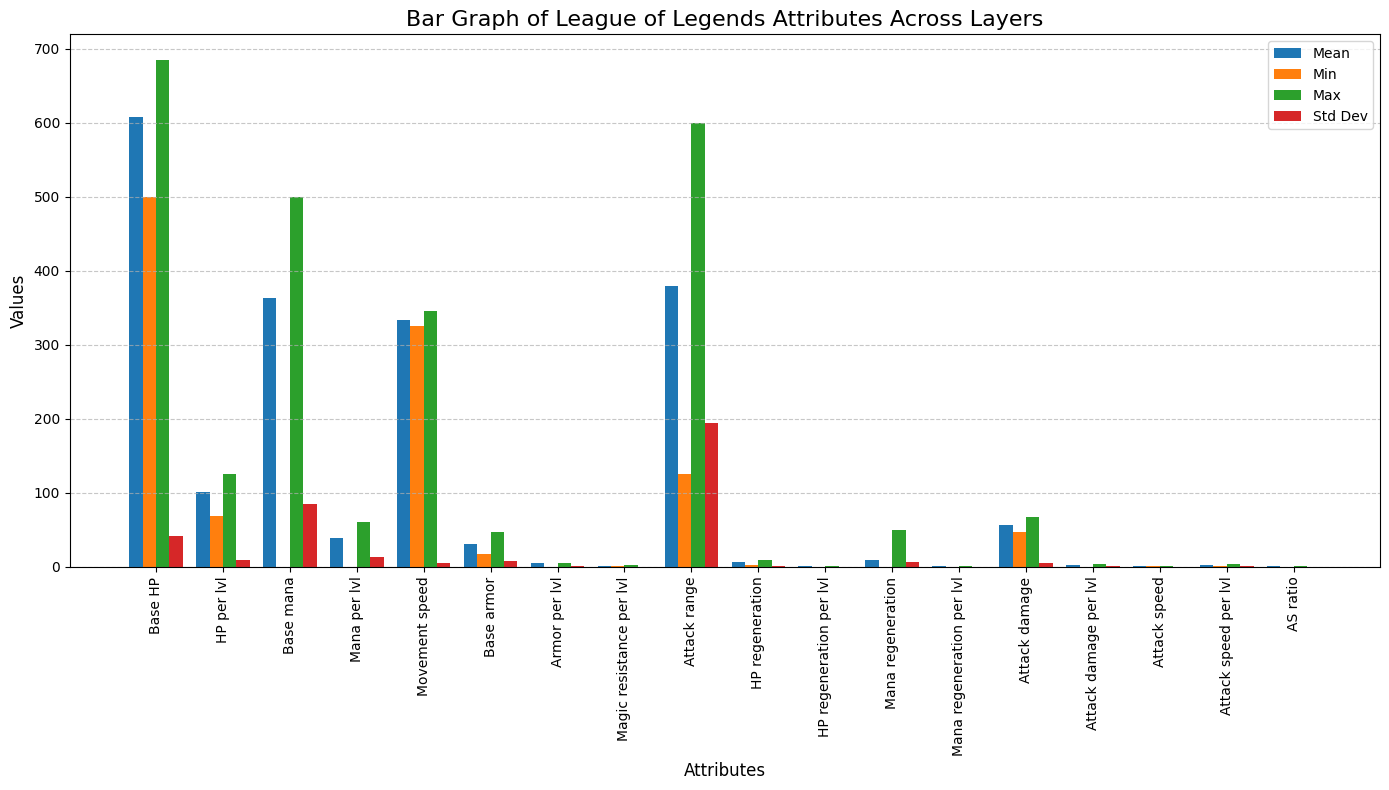

In [25]:
bar_width = 0.2
x = range(len(supp_stats["Column"]))  # X positions for the bars

plt.figure(figsize=(14, 8))

# Plot each column as a separate set of bars
plt.bar([p - bar_width * 1.5 for p in x], supp_stats["Mean"], bar_width, label="Mean")
plt.bar([p - bar_width * 0.5 for p in x], supp_stats["Min"], bar_width, label="Min")
plt.bar([p + bar_width * 0.5 for p in x], supp_stats["Max"], bar_width, label="Max")
plt.bar([p + bar_width * 1.5 for p in x], supp_stats["Standard Deviation"], bar_width, label="Std Dev")

# Add labels, title, and legend
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Bar Graph of League of Legends Attributes Across Layers", fontsize=16)
plt.xticks(x, supp_stats["Column"], rotation=90, fontsize=10)
plt.legend()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

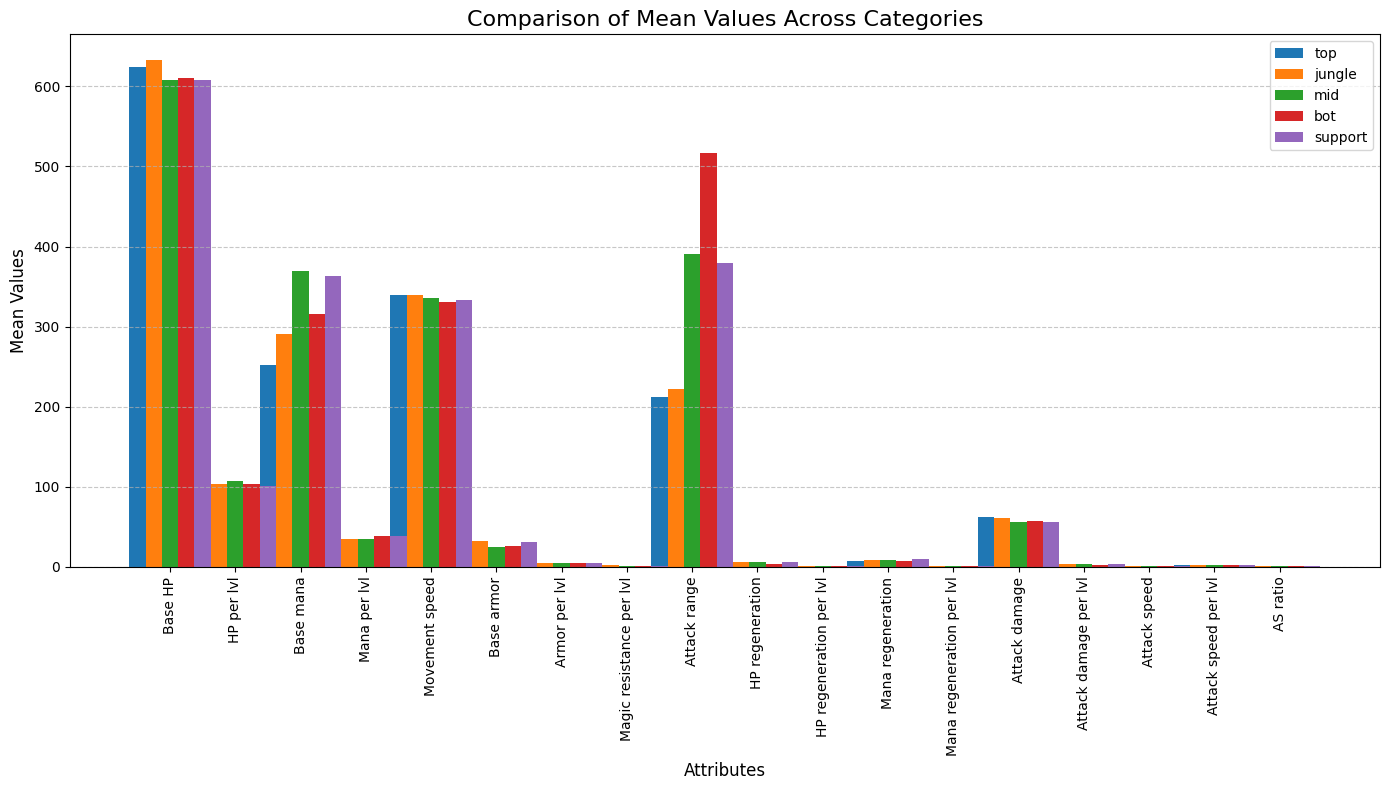

In [26]:
# Combine data into a single DataFrame with a "Category" column
top_stats["Category"] = "top"
jungle_stats["Category"] = "jungle"
mid_stats["Category"] = "mid"
bot_stats["Category"] = "bot"
supp_stats["Category"] = "support"


combined_df = pd.concat([top_stats, jungle_stats, mid_stats, bot_stats, supp_stats])

# Plot the combined data
bar_width = 0.25
categories = combined_df["Category"].unique()
x = range(len(top_stats["Column"]))

plt.figure(figsize=(14, 8))

# Loop through each category and plot its bars
for i, category in enumerate(categories):
    subset = combined_df[combined_df["Category"] == category]
    plt.bar([p + bar_width * i for p in x], subset["Mean"], bar_width, label=category)

# Add labels, title, and legend
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Mean Values", fontsize=12)
plt.title("Comparison of Mean Values Across Categories", fontsize=16)
plt.xticks([p + bar_width * (len(categories) / 2 - 0.5) for p in x], top_stats["Column"], rotation=90, fontsize=10)
plt.legend()

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

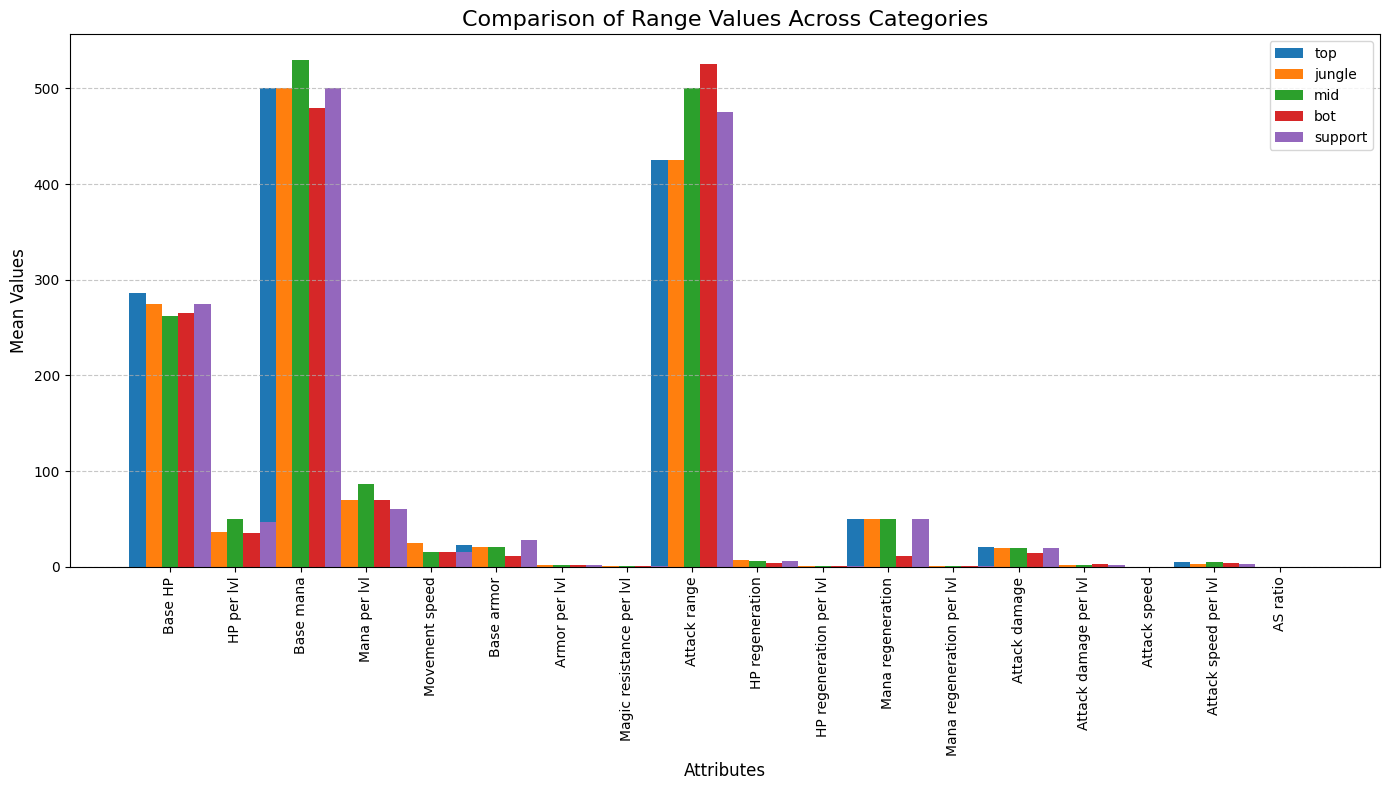

In [27]:
# Plot the combined data
bar_width = 0.25
categories = combined_df["Category"].unique()
x = range(len(top_stats["Column"]))

plt.figure(figsize=(14, 8))

# Loop through each category and plot its bars
for i, category in enumerate(categories):
    subset = combined_df[combined_df["Category"] == category]
    plt.bar([p + bar_width * i for p in x], subset["Range"], bar_width, label=category)

# Add labels, title, and legend
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Mean Values", fontsize=12)
plt.title("Comparison of Range Values Across Categories", fontsize=16)
plt.xticks([p + bar_width * (len(categories) / 2 - 0.5) for p in x], top_stats["Column"], rotation=90, fontsize=10)
plt.legend()

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

Correlation between Base HP and HP per lvl: 0.31


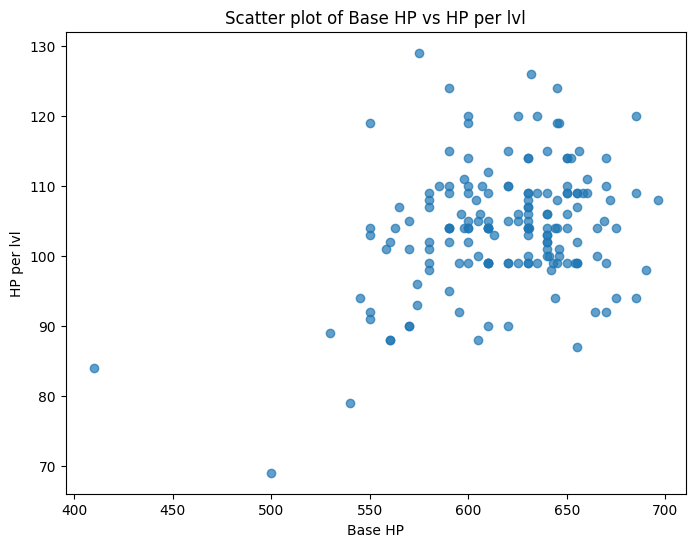

Correlation between Base HP and Base mana: -0.19


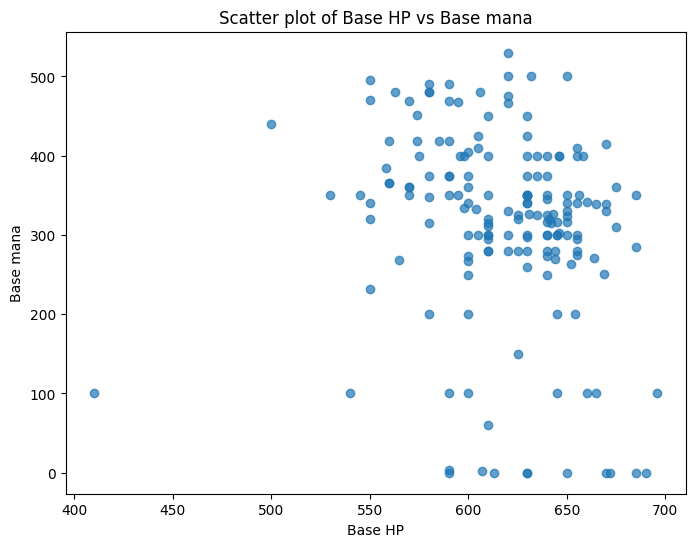

Correlation between Base HP and Mana per lvl: 0.12


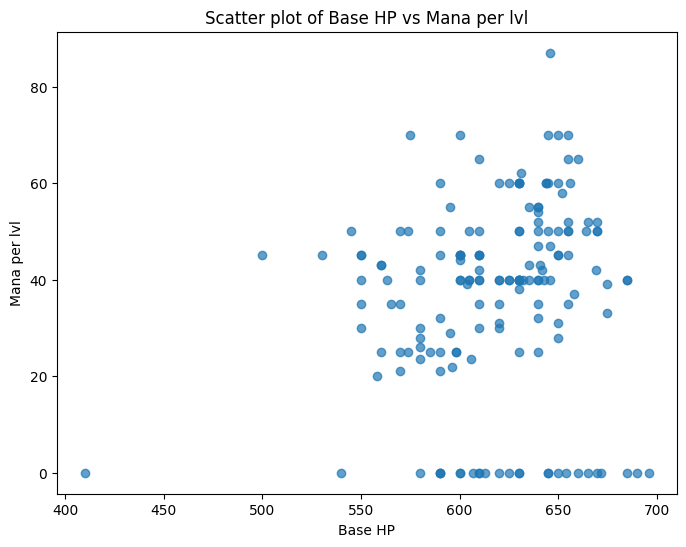

Correlation between Base HP and Movement speed: 0.27


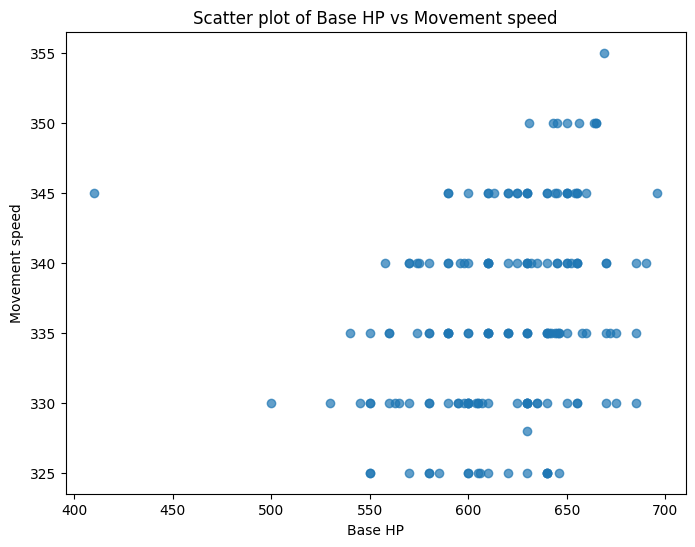

Correlation between Base HP and Base armor: 0.45


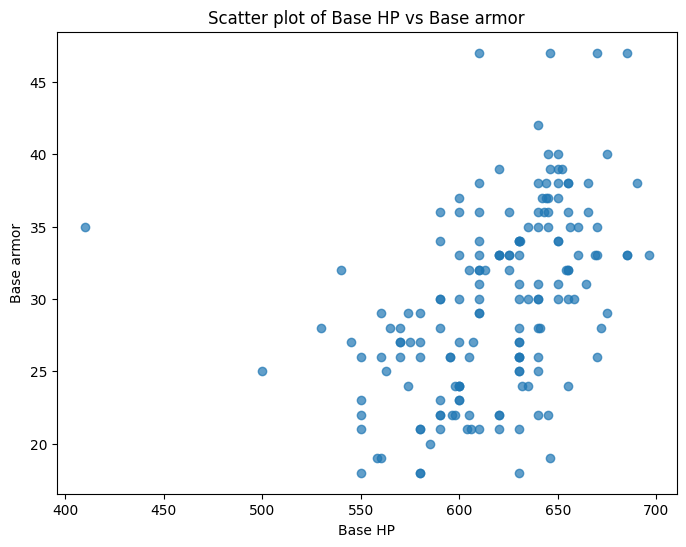

Correlation between Base HP and Armor per lvl: 0.02


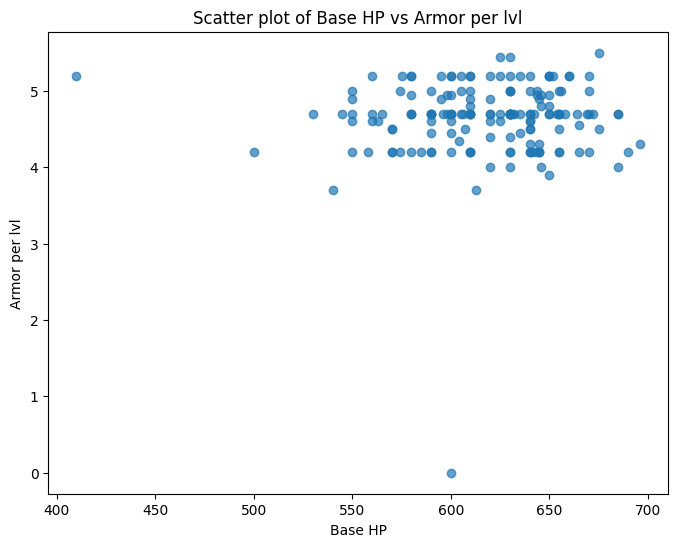

Correlation between Base HP and Base magic resistance: 0.31


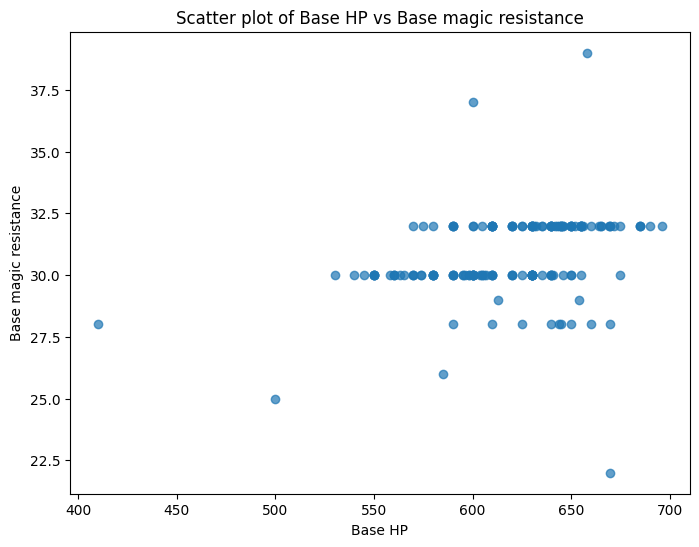

Correlation between Base HP and Magic resistance per lvl: 0.41


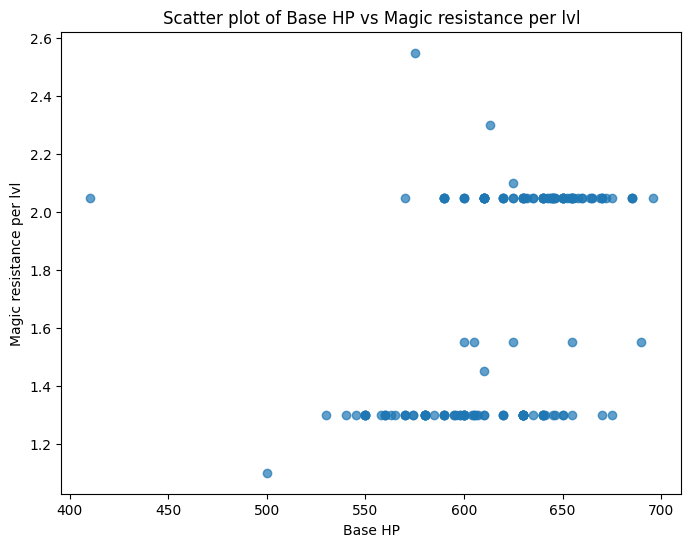

Correlation between Base HP and Attack range: -0.44


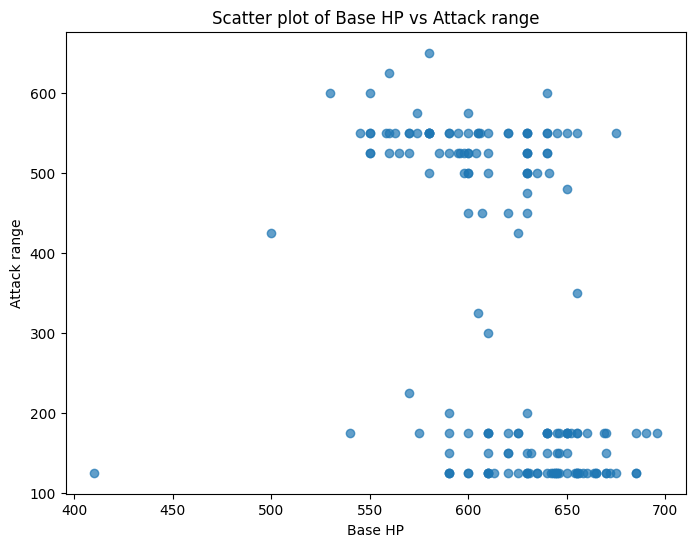

Correlation between Base HP and HP regeneration: 0.33


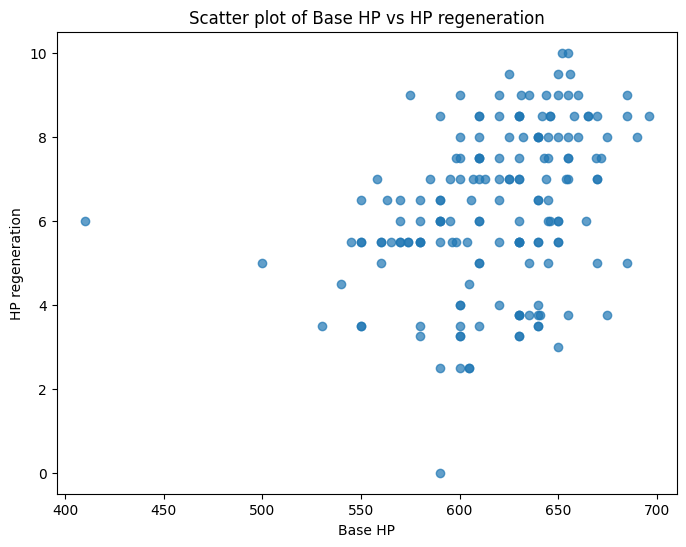

Correlation between Base HP and HP regeneration per lvl: 0.14


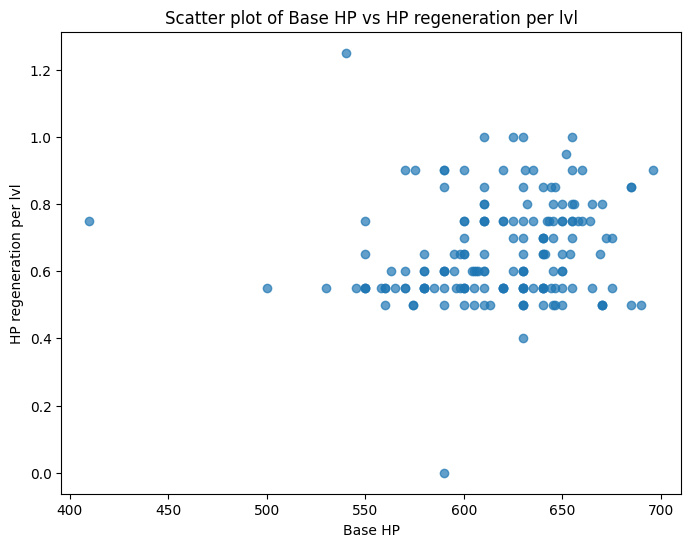

Correlation between Base HP and Mana regeneration: -0.06


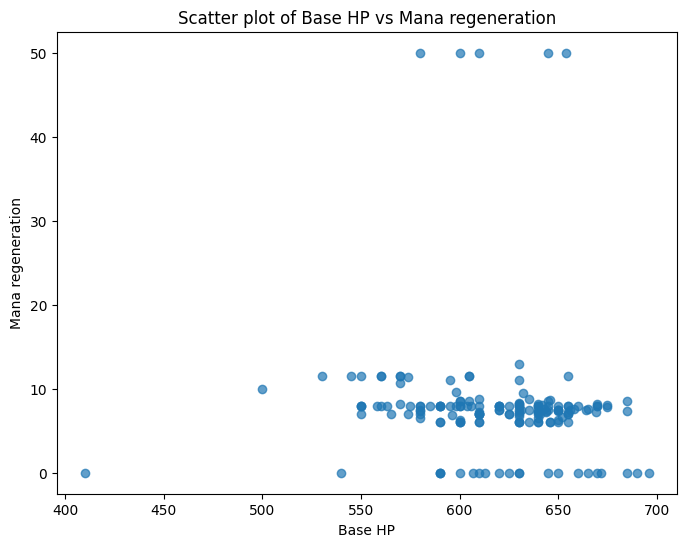

Correlation between Base HP and Mana regeneration per lvl: -0.02


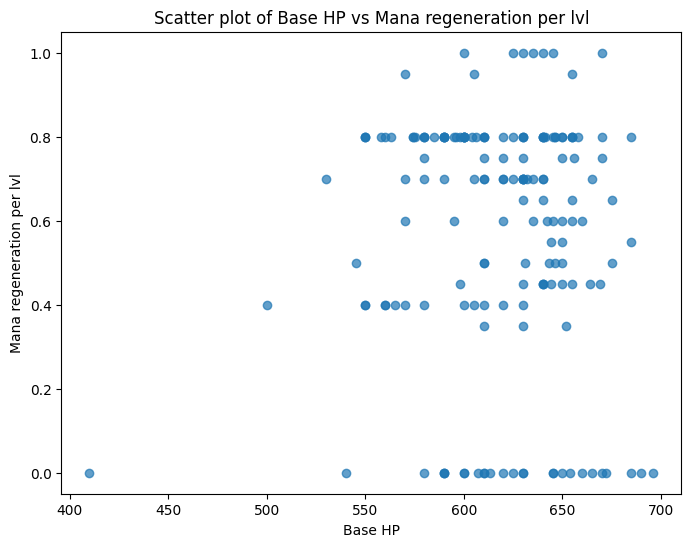

Correlation between Base HP and Attack damage: 0.44


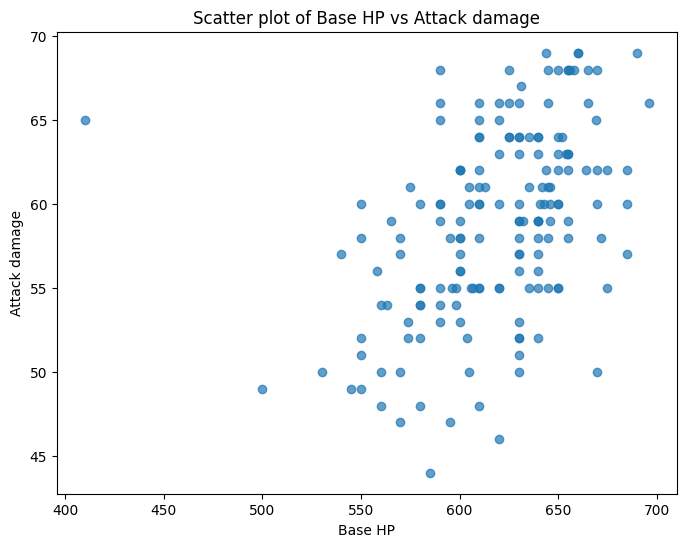

Correlation between Base HP and Attack damage per lvl: 0.34


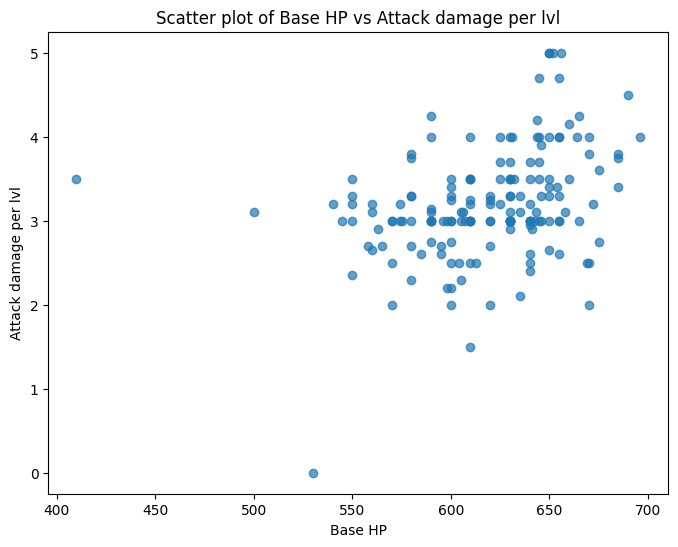

Correlation between Base HP and Attack speed per lvl: -0.11


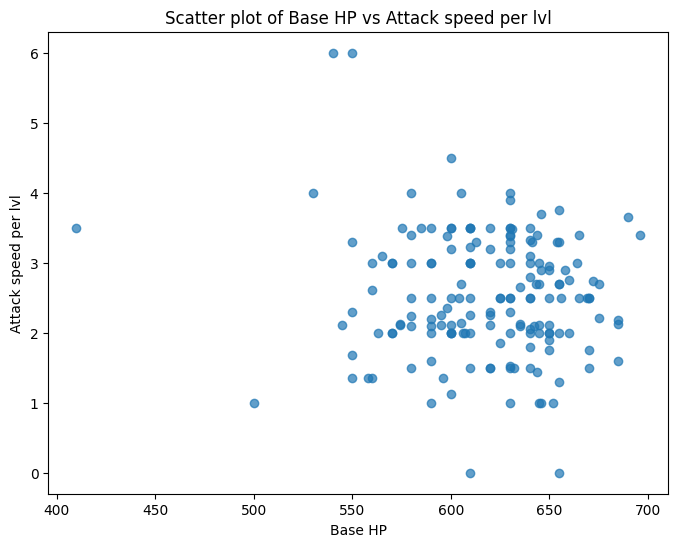

Correlation between Base HP and Attack speed: 0.09


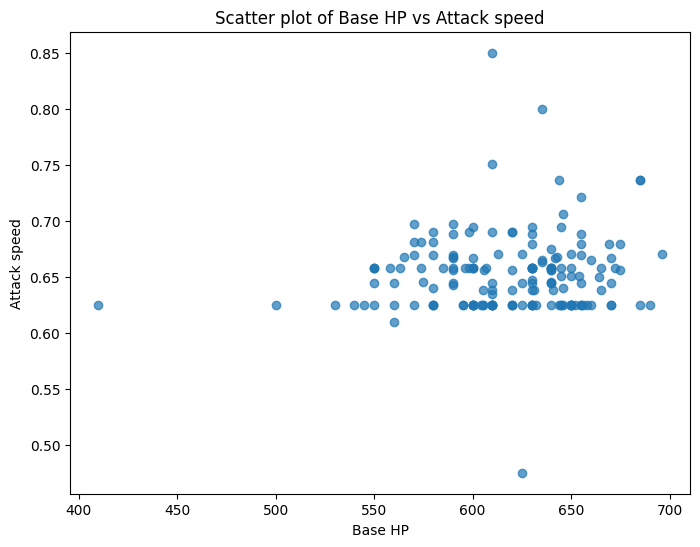

Correlation between Base HP and AS ratio: 0.05


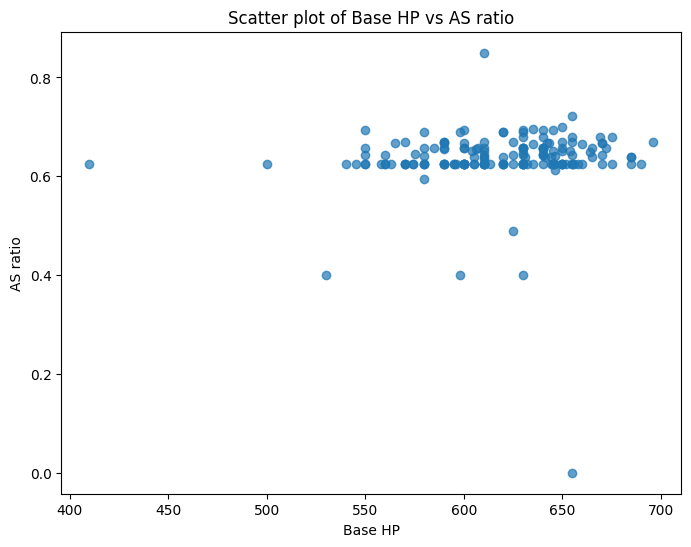

Correlation between HP per lvl and Base mana: -0.00


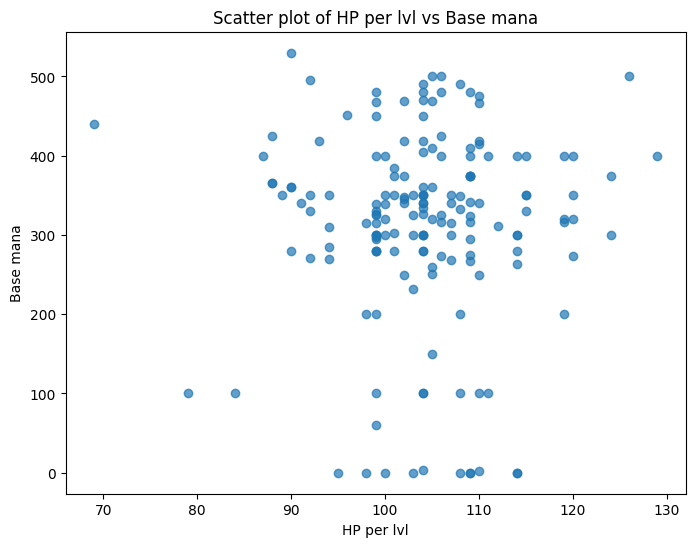

Correlation between HP per lvl and Mana per lvl: 0.10


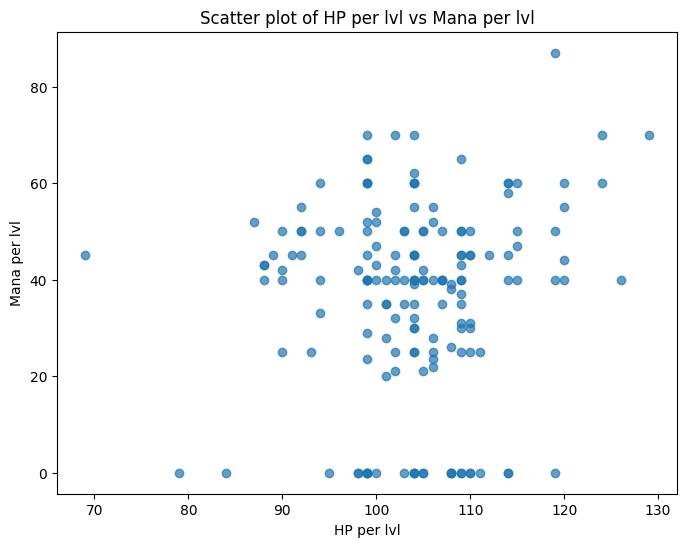

Correlation between HP per lvl and Movement speed: 0.11


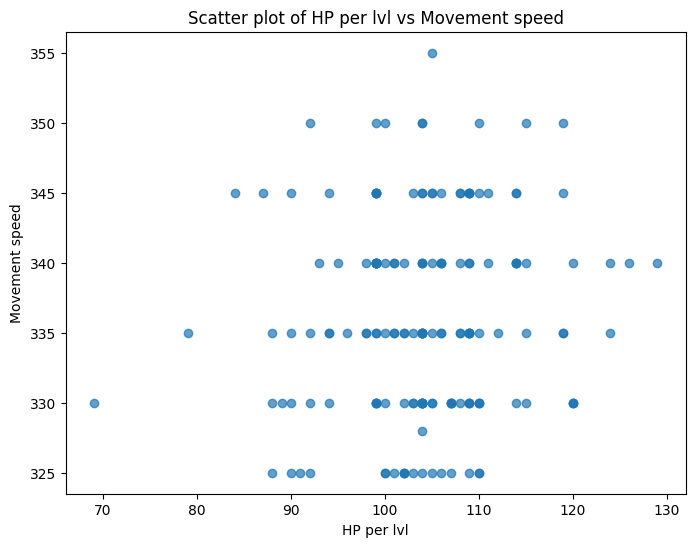

Correlation between HP per lvl and Base armor: 0.05


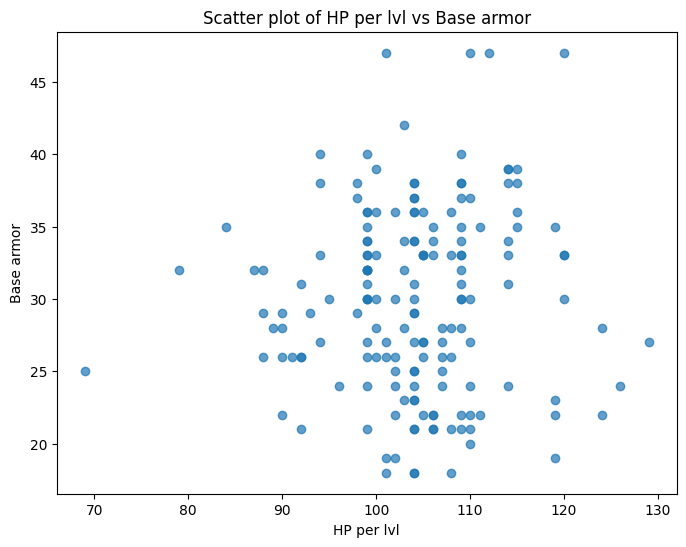

Correlation between HP per lvl and Armor per lvl: 0.07


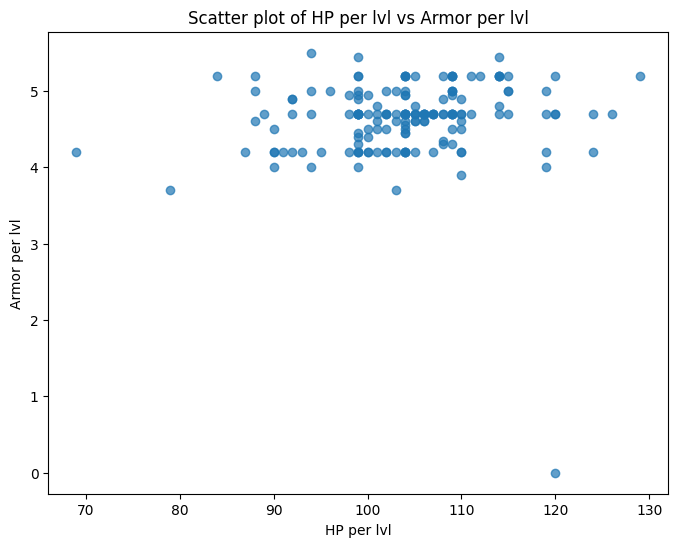

Correlation between HP per lvl and Base magic resistance: 0.27


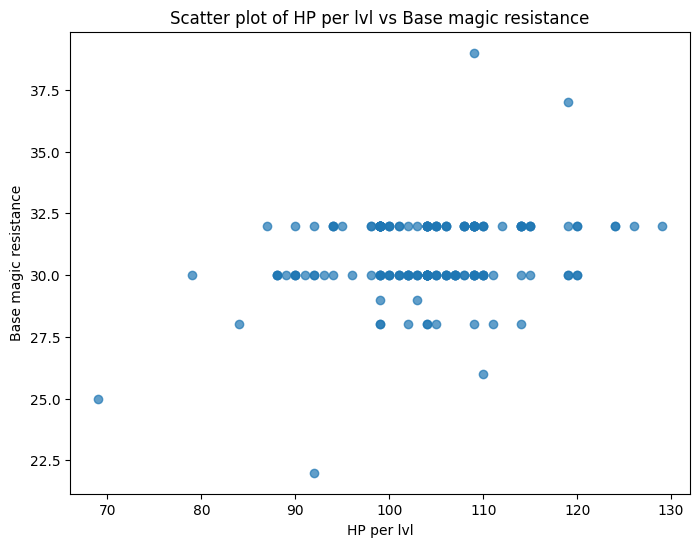

Correlation between HP per lvl and Magic resistance per lvl: 0.23


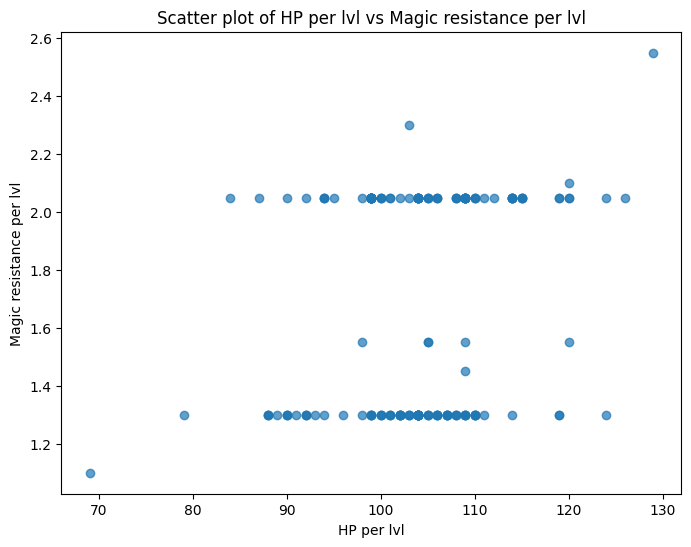

Correlation between HP per lvl and Attack range: -0.17


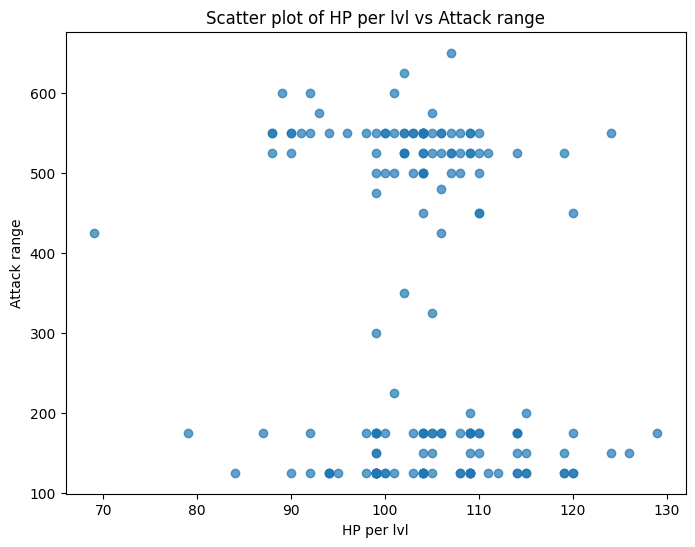

Correlation between HP per lvl and HP regeneration: 0.24


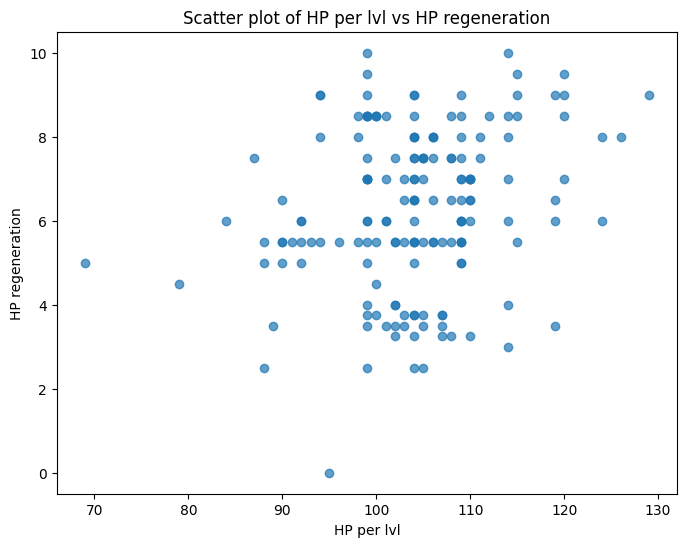

Correlation between HP per lvl and HP regeneration per lvl: 0.23


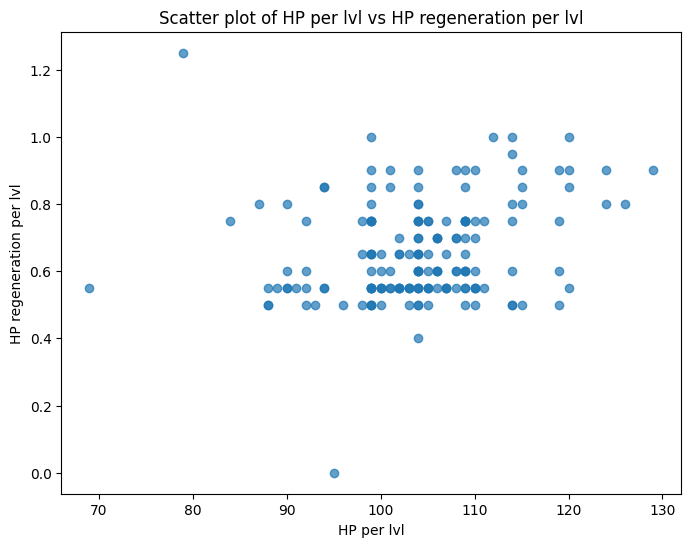

Correlation between HP per lvl and Mana regeneration: -0.03


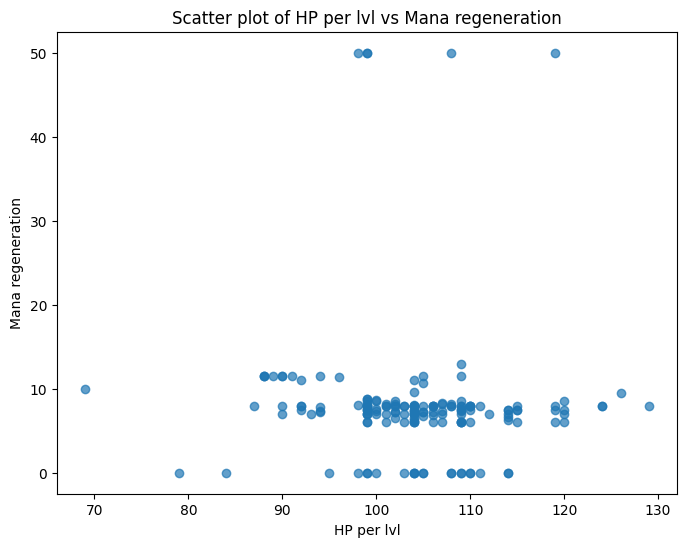

Correlation between HP per lvl and Mana regeneration per lvl: 0.18


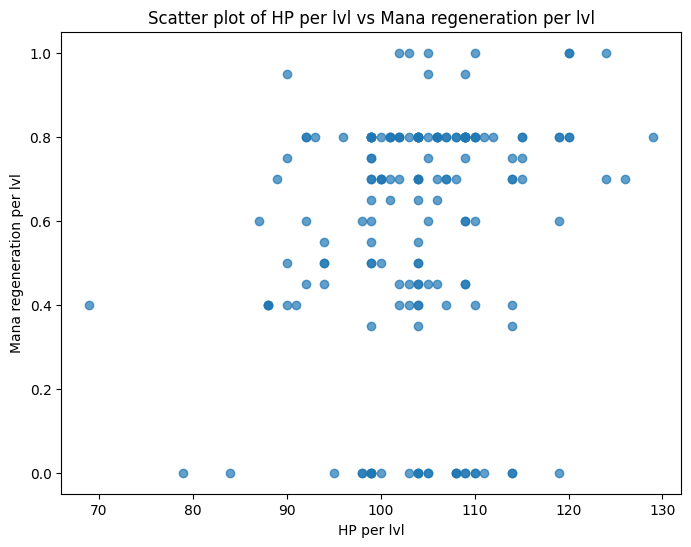

Correlation between HP per lvl and Attack damage: 0.26


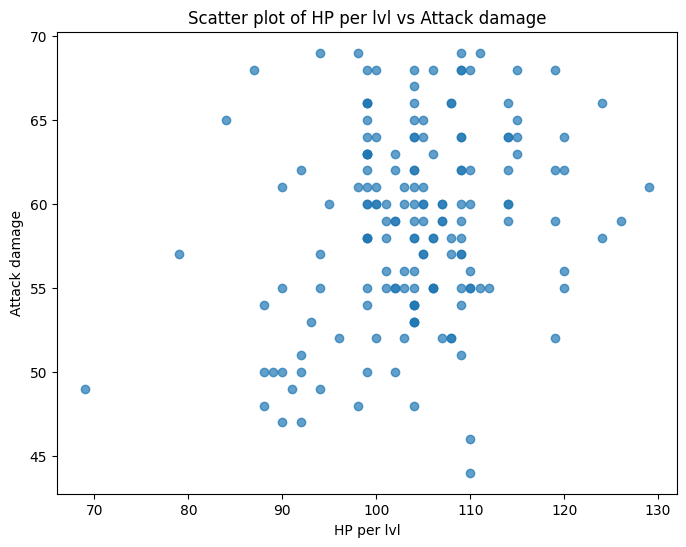

Correlation between HP per lvl and Attack damage per lvl: 0.19


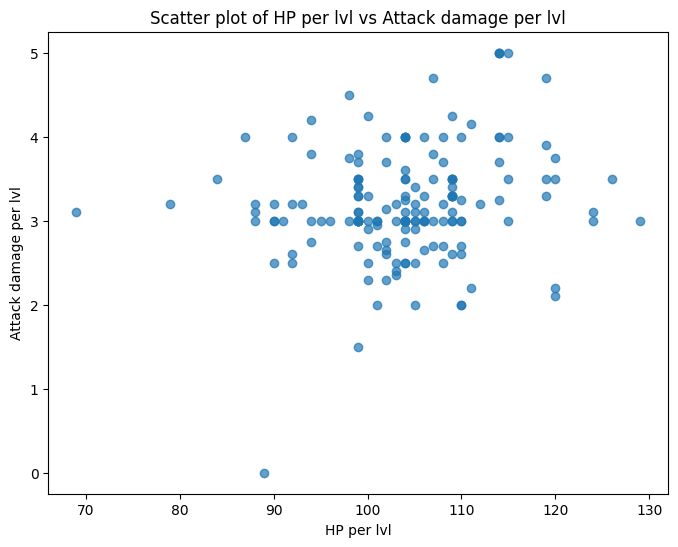

Correlation between HP per lvl and Attack speed per lvl: 0.06


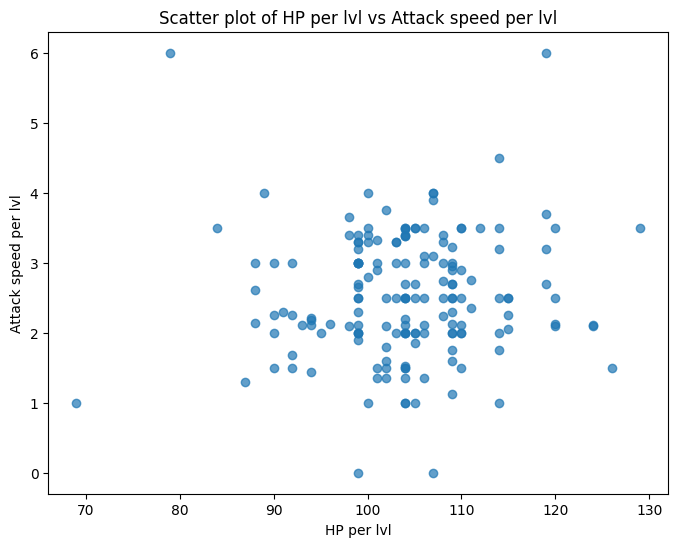

Correlation between HP per lvl and Attack speed: 0.05


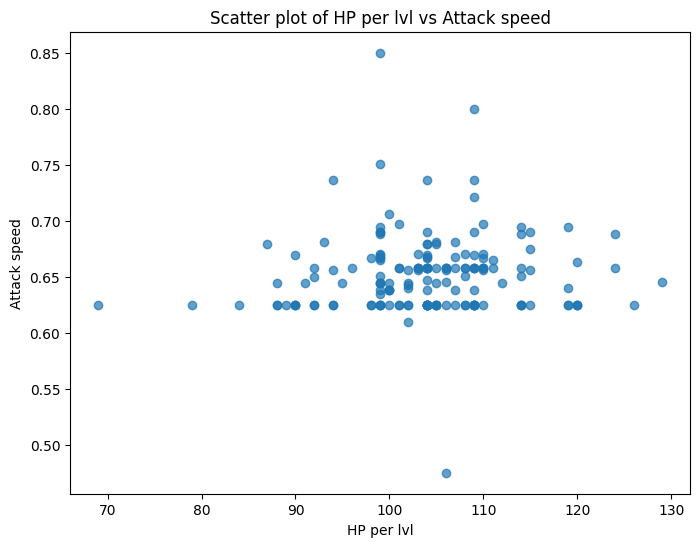

Correlation between HP per lvl and AS ratio: 0.02


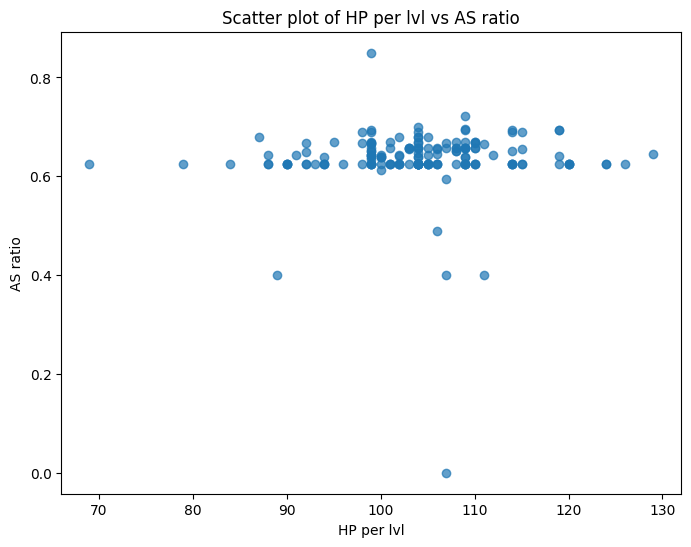

Correlation between Base mana and Mana per lvl: 0.53


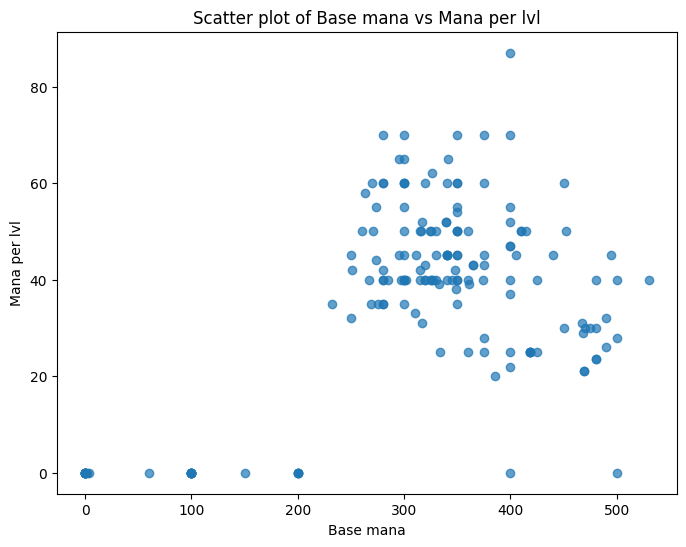

Correlation between Base mana and Movement speed: -0.32


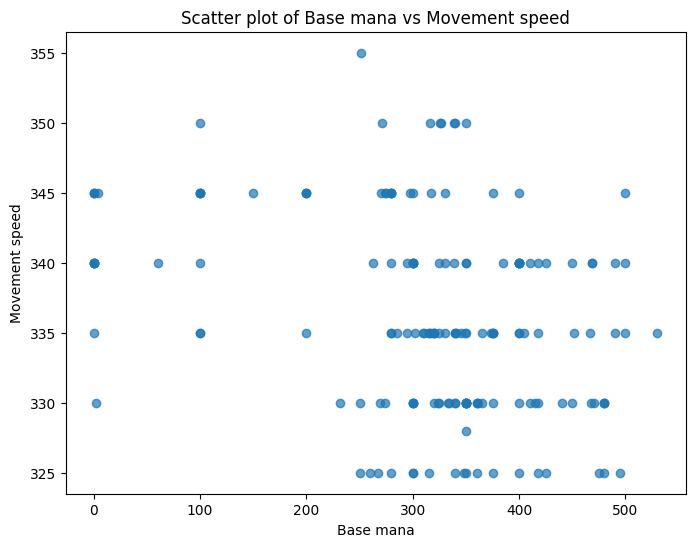

Correlation between Base mana and Base armor: -0.37


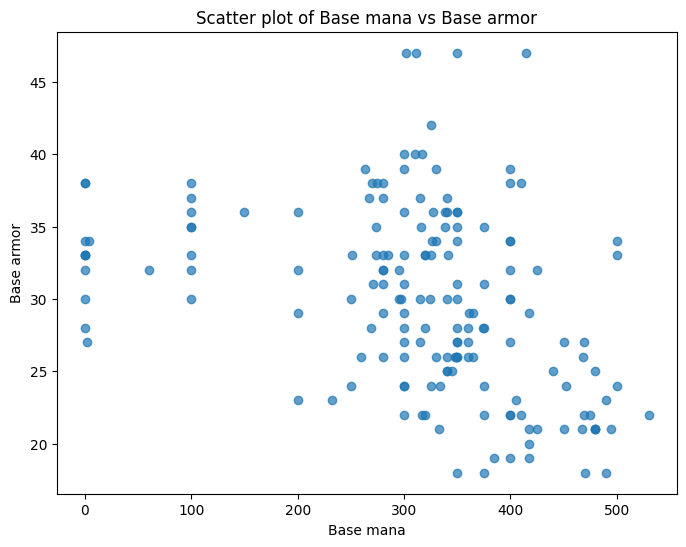

Correlation between Base mana and Armor per lvl: 0.09


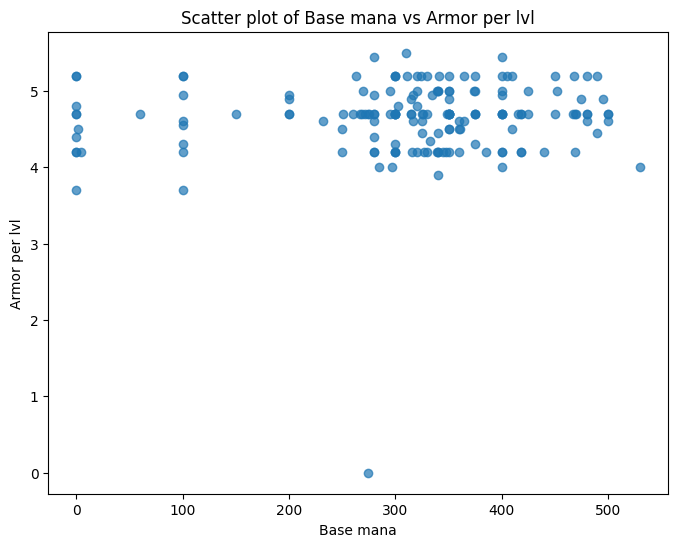

Correlation between Base mana and Base magic resistance: -0.12


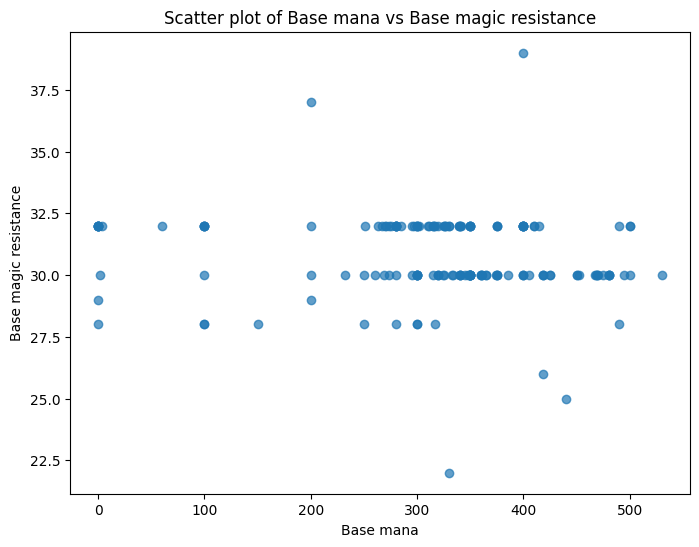

Correlation between Base mana and Magic resistance per lvl: -0.38


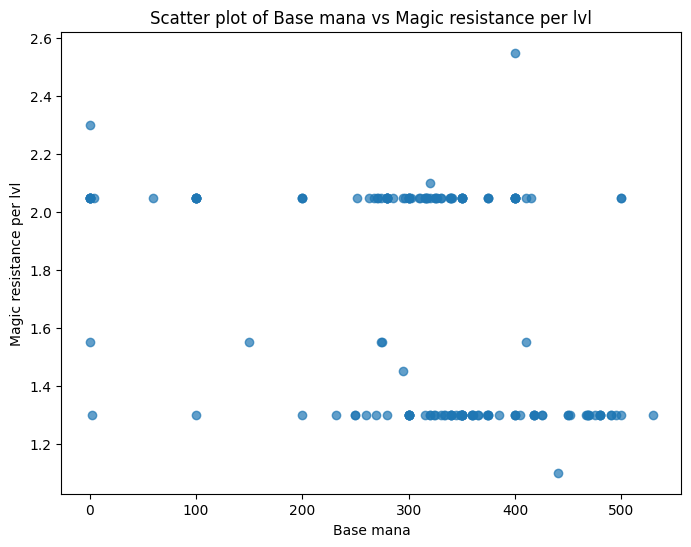

Correlation between Base mana and Attack range: 0.43


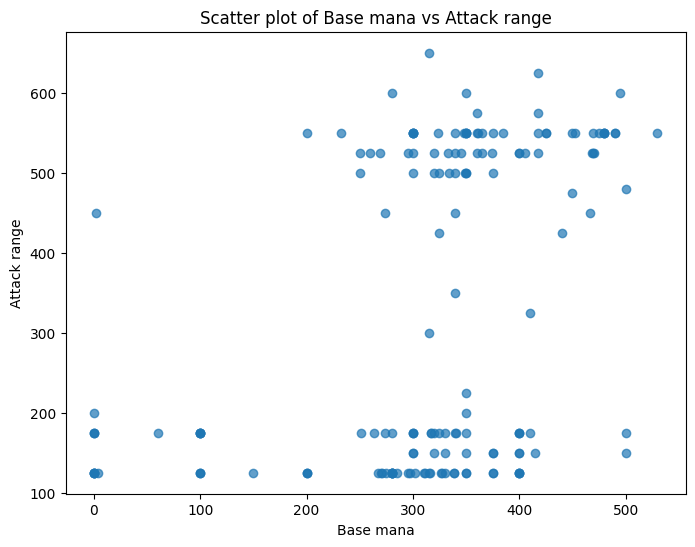

Correlation between Base mana and HP regeneration: 0.01


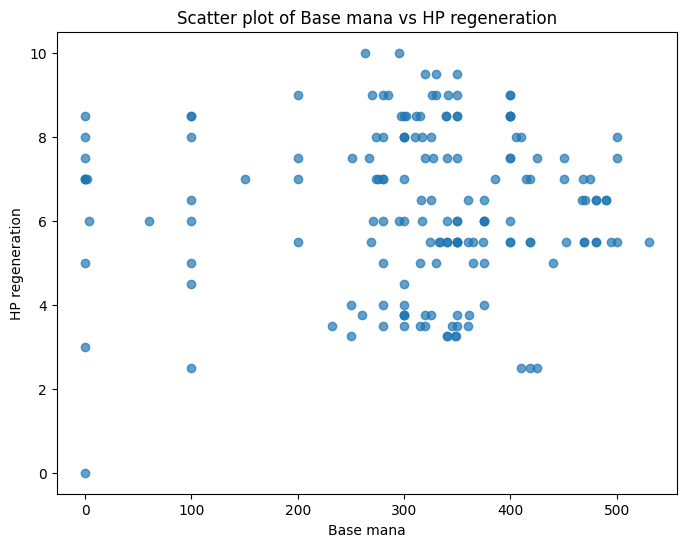

Correlation between Base mana and HP regeneration per lvl: 0.00


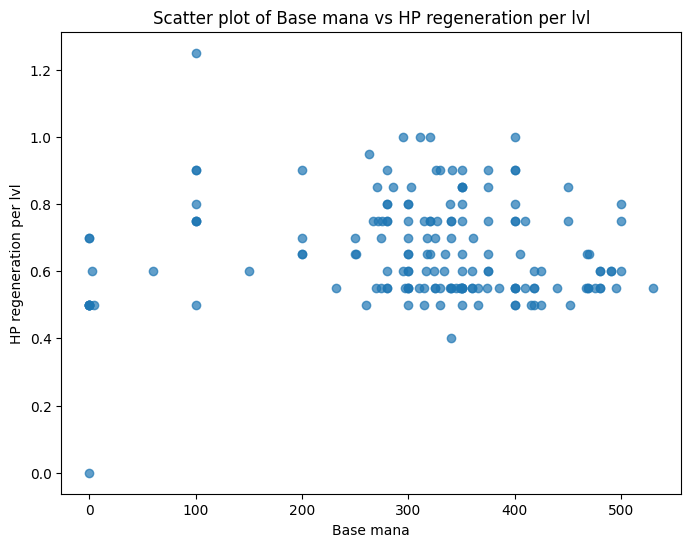

Correlation between Base mana and Mana regeneration: 0.19


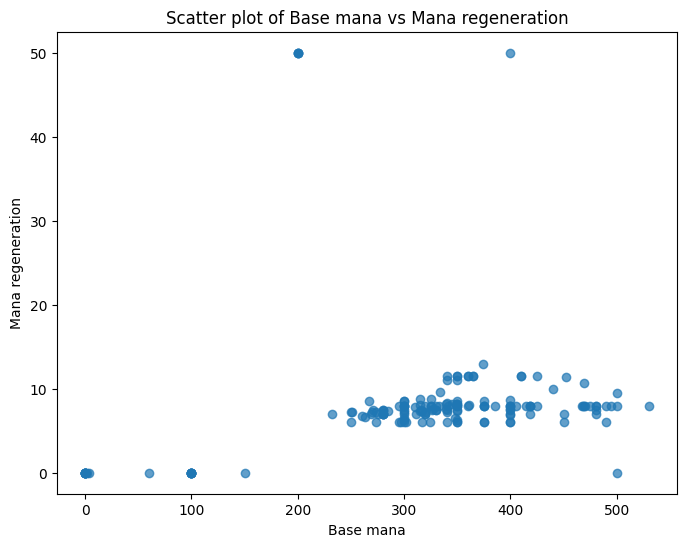

Correlation between Base mana and Mana regeneration per lvl: 0.73


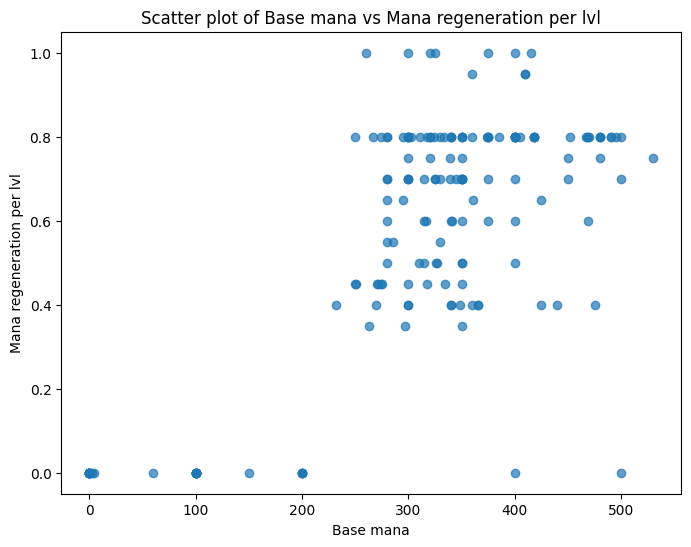

Correlation between Base mana and Attack damage: -0.34


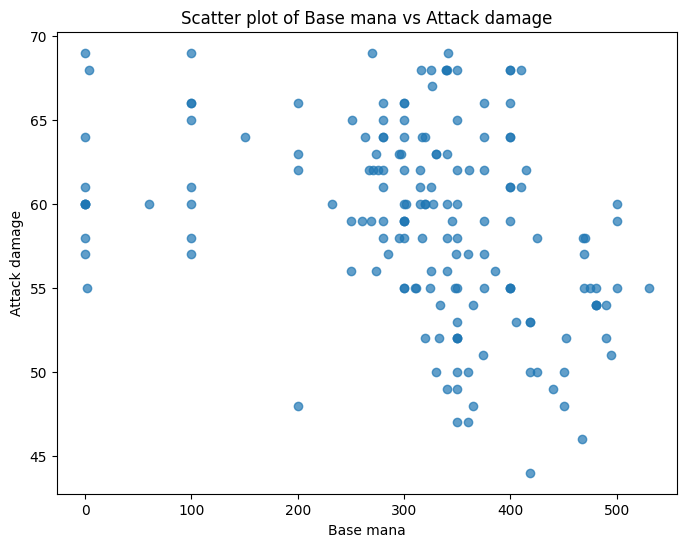

Correlation between Base mana and Attack damage per lvl: -0.18


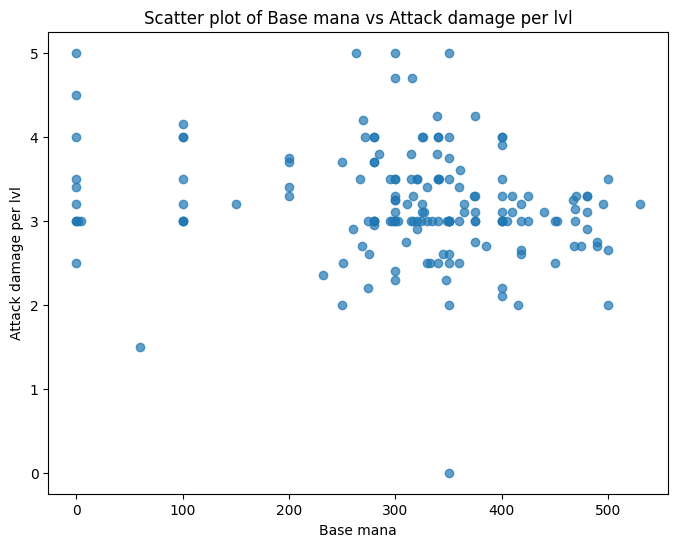

Correlation between Base mana and Attack speed per lvl: -0.15


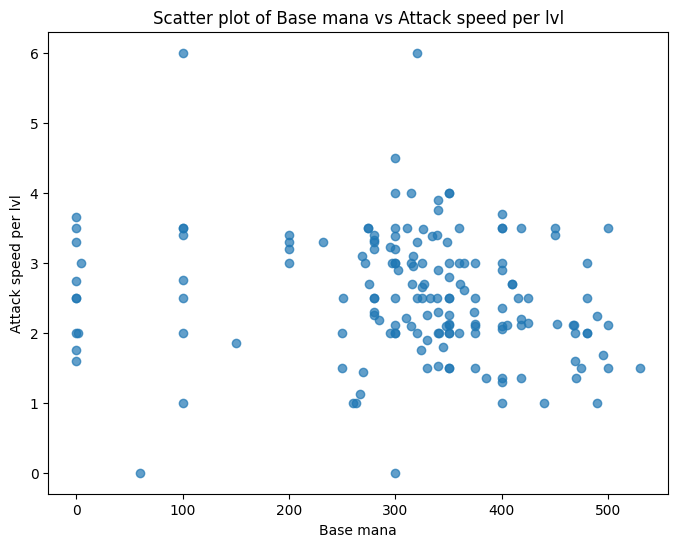

Correlation between Base mana and Attack speed: -0.11


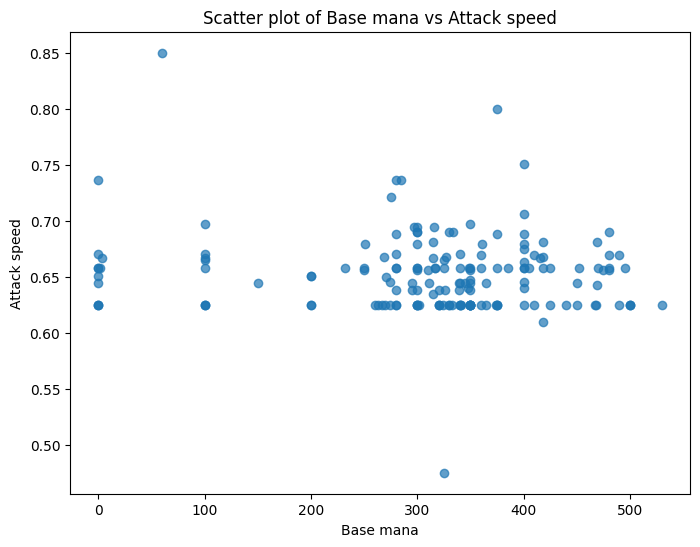

Correlation between Base mana and AS ratio: -0.12


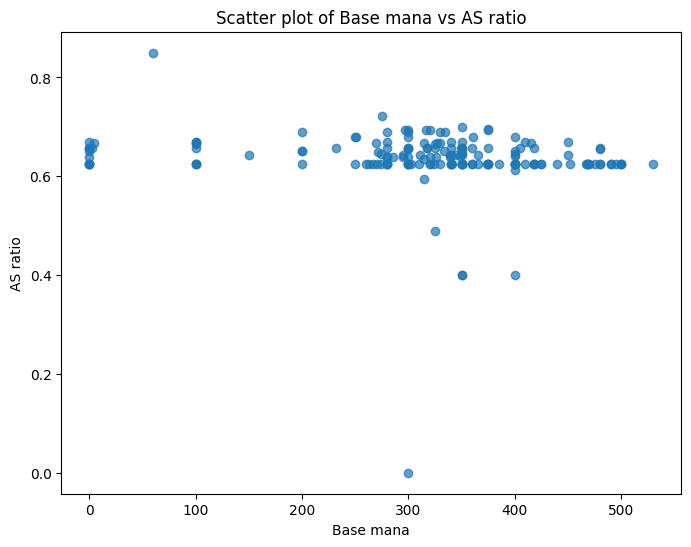

Correlation between Mana per lvl and Movement speed: -0.20


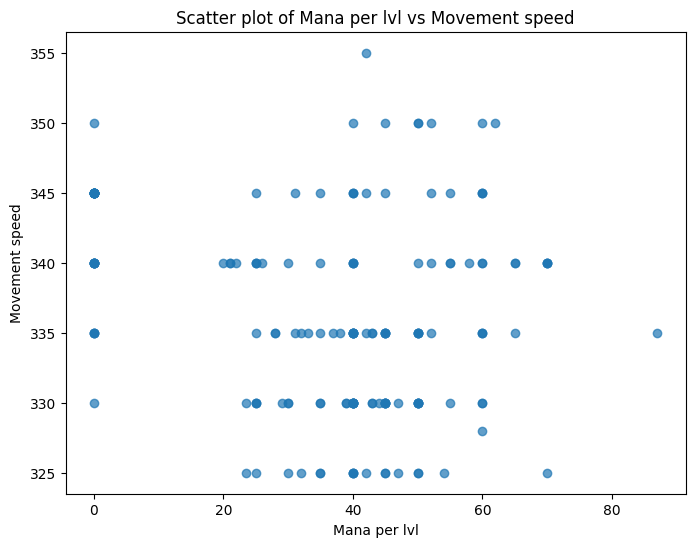

Correlation between Mana per lvl and Base armor: -0.02


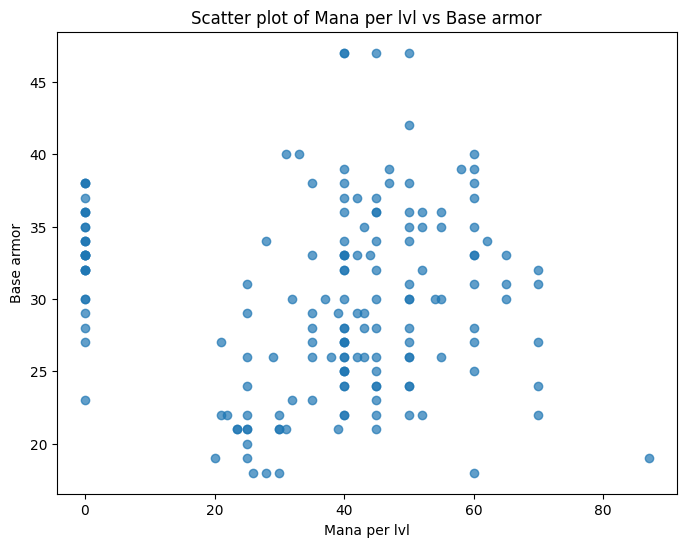

Correlation between Mana per lvl and Armor per lvl: 0.07


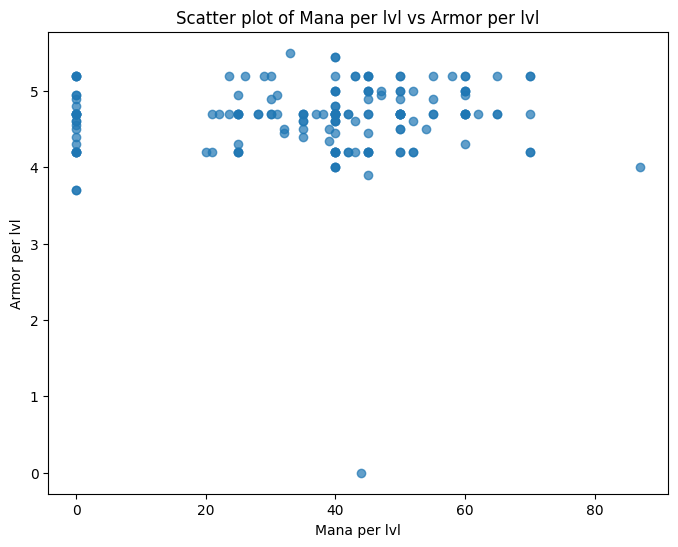

Correlation between Mana per lvl and Base magic resistance: 0.01


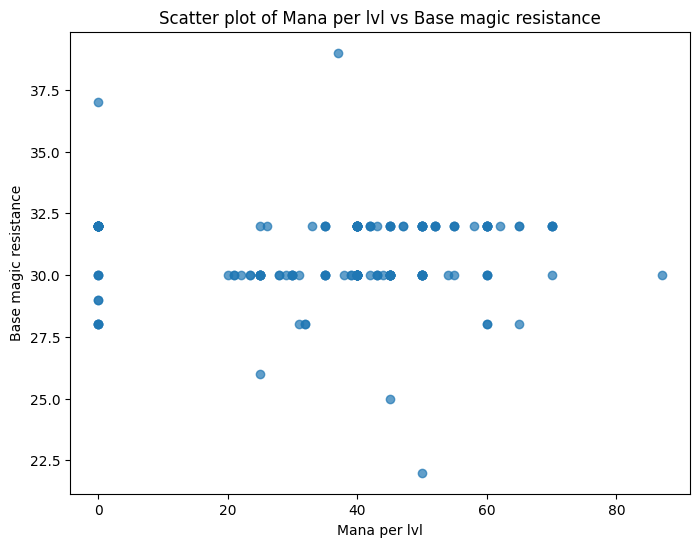

Correlation between Mana per lvl and Magic resistance per lvl: -0.04


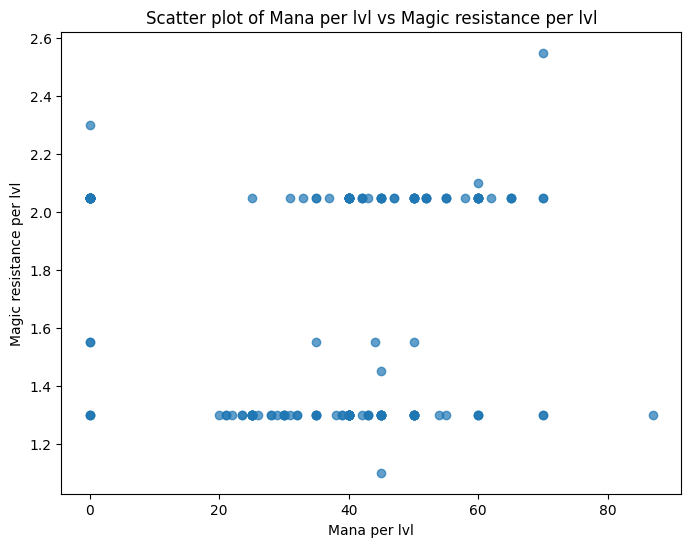

Correlation between Mana per lvl and Attack range: 0.06


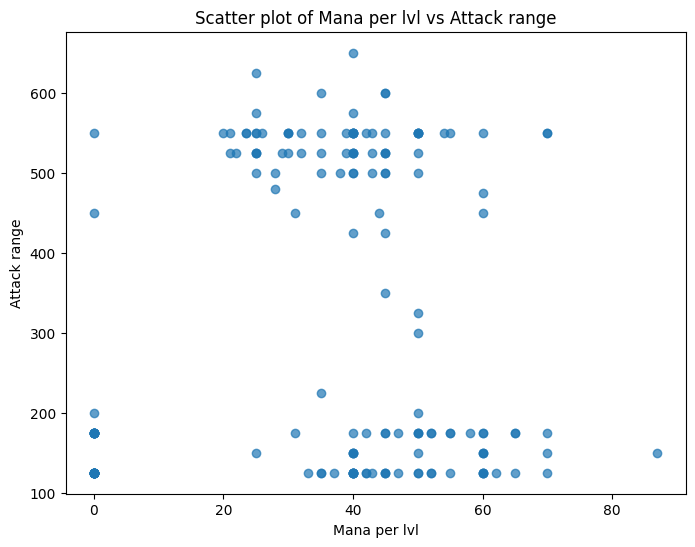

Correlation between Mana per lvl and HP regeneration: 0.11


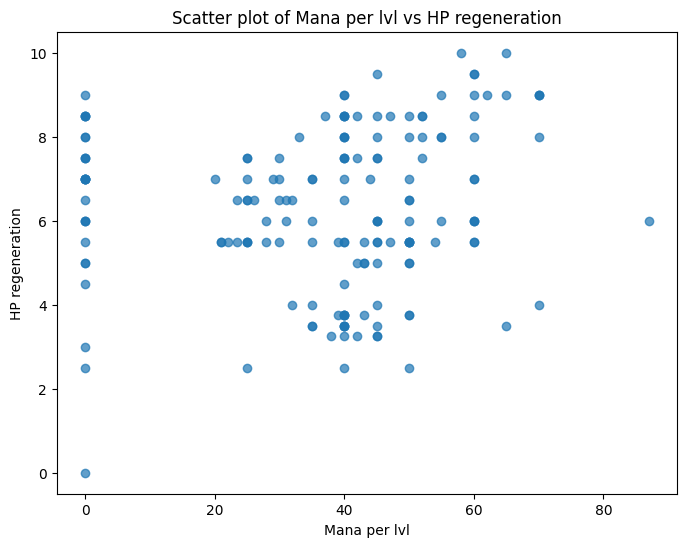

Correlation between Mana per lvl and HP regeneration per lvl: 0.13


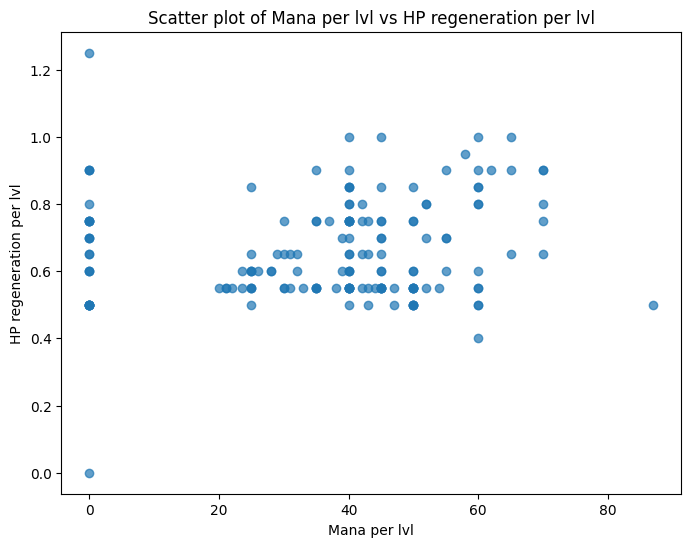

Correlation between Mana per lvl and Mana regeneration: -0.06


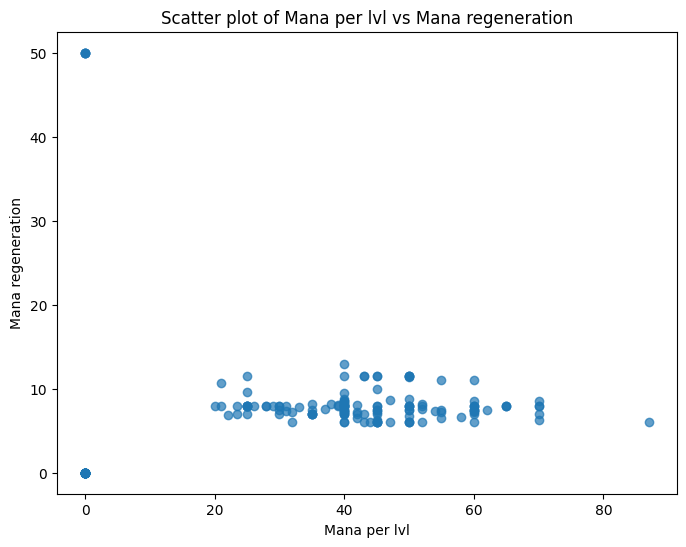

Correlation between Mana per lvl and Mana regeneration per lvl: 0.70


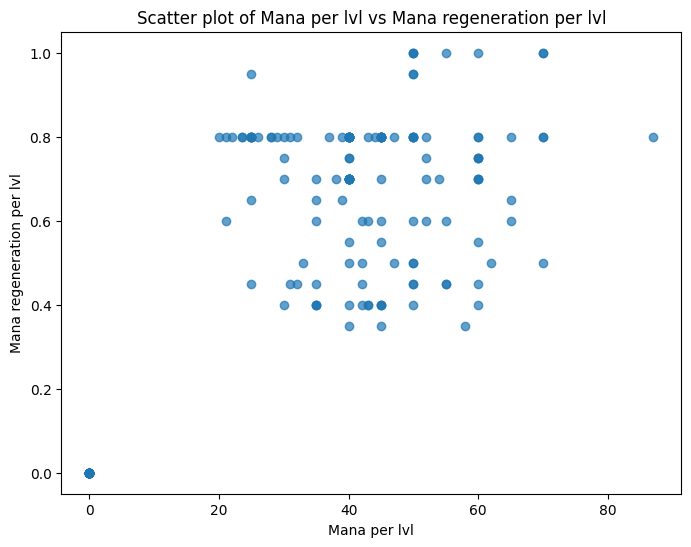

Correlation between Mana per lvl and Attack damage: 0.01


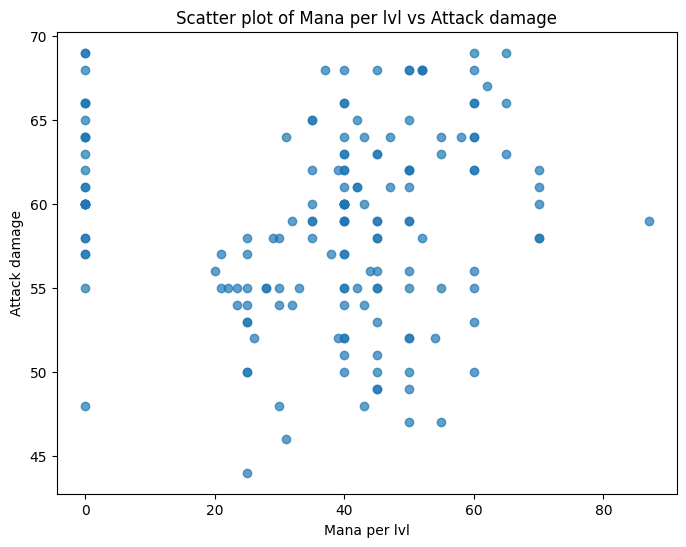

Correlation between Mana per lvl and Attack damage per lvl: 0.07


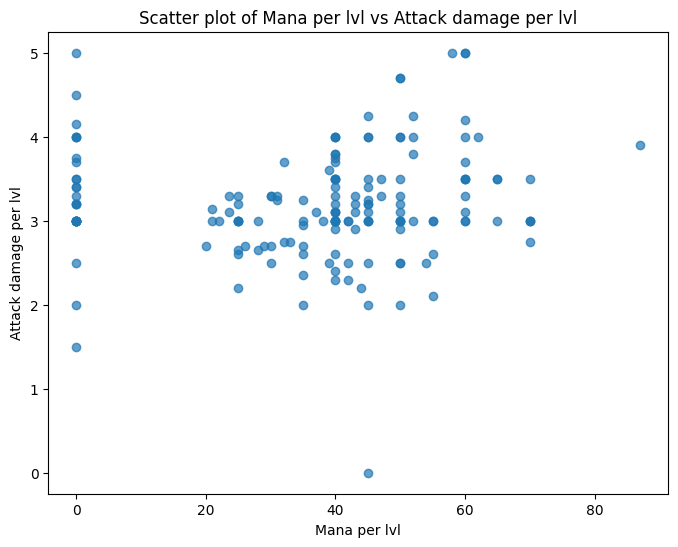

Correlation between Mana per lvl and Attack speed per lvl: -0.04


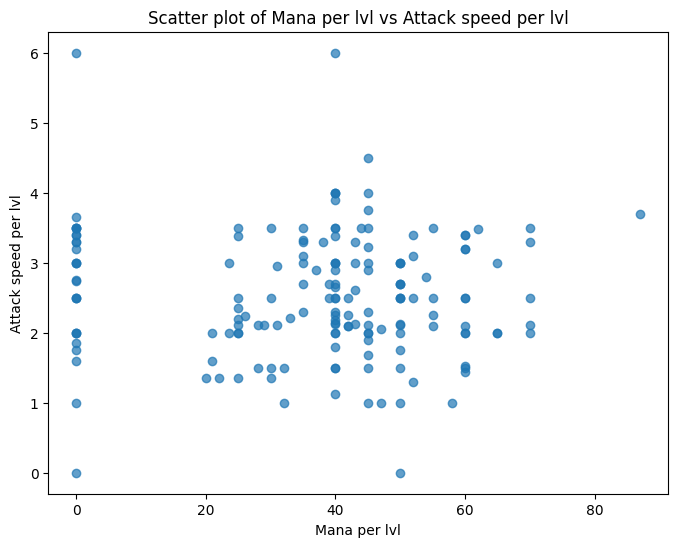

Correlation between Mana per lvl and Attack speed: -0.13


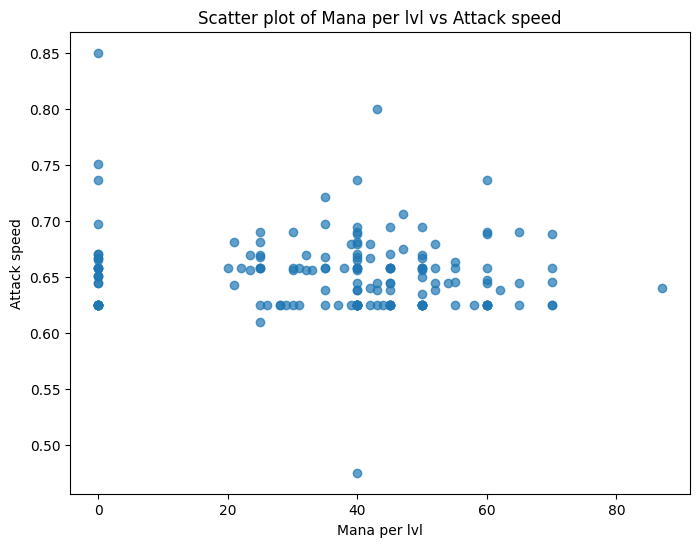

Correlation between Mana per lvl and AS ratio: -0.09


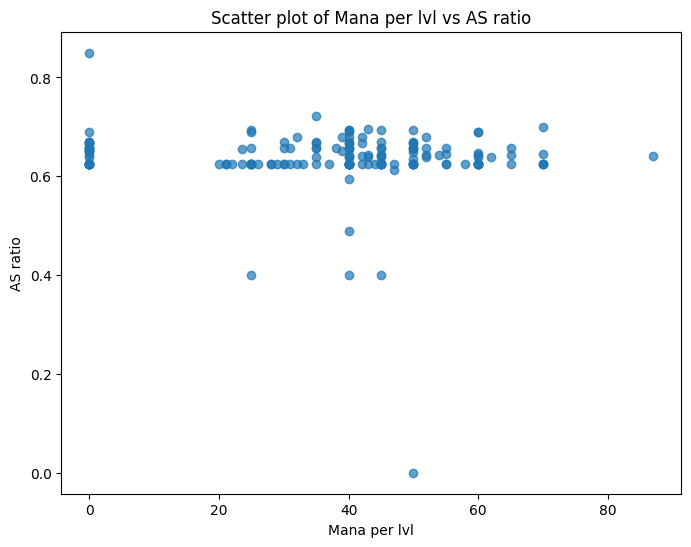

Correlation between Movement speed and Base armor: 0.35


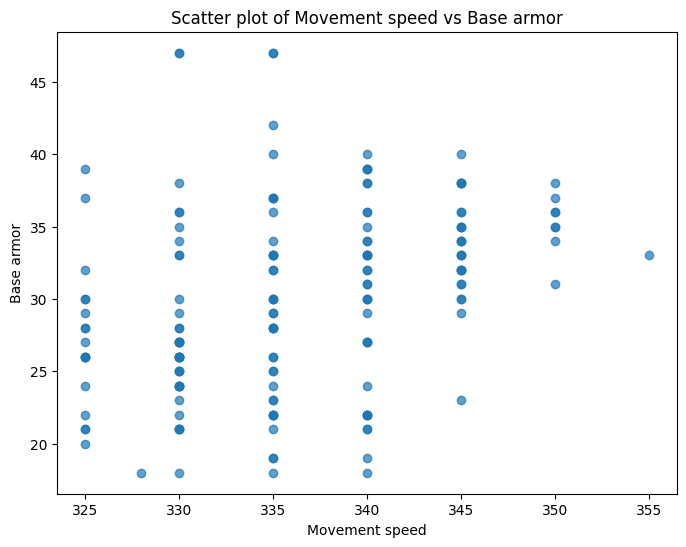

Correlation between Movement speed and Armor per lvl: 0.02


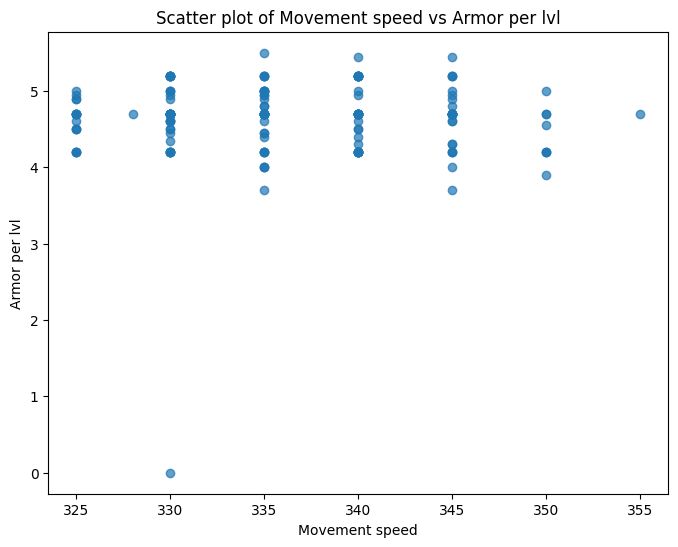

Correlation between Movement speed and Base magic resistance: 0.33


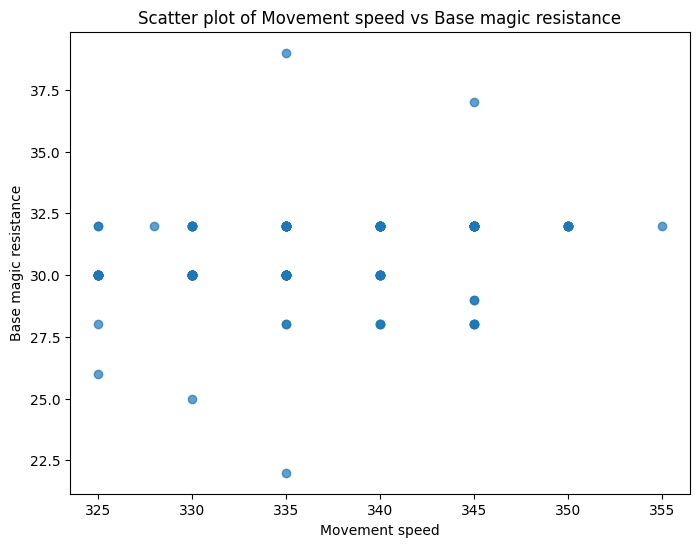

Correlation between Movement speed and Magic resistance per lvl: 0.61


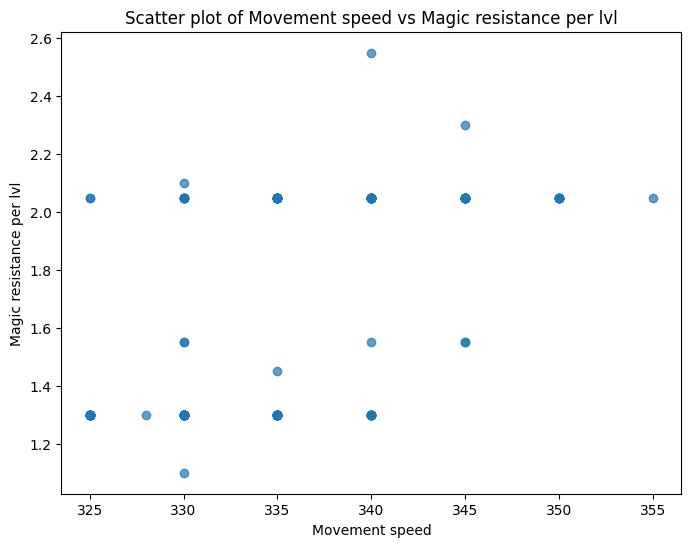

Correlation between Movement speed and Attack range: -0.63


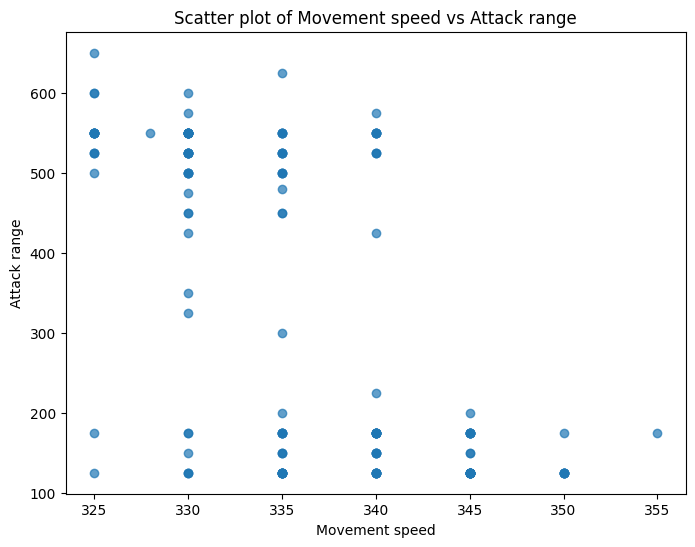

Correlation between Movement speed and HP regeneration: 0.43


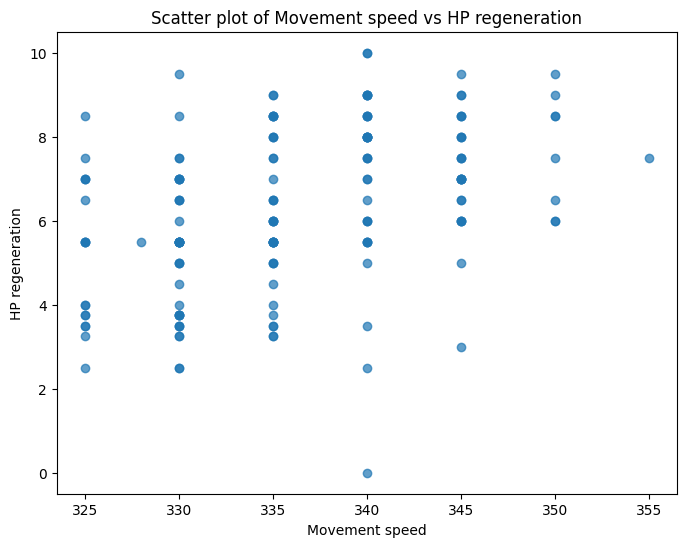

Correlation between Movement speed and HP regeneration per lvl: 0.26


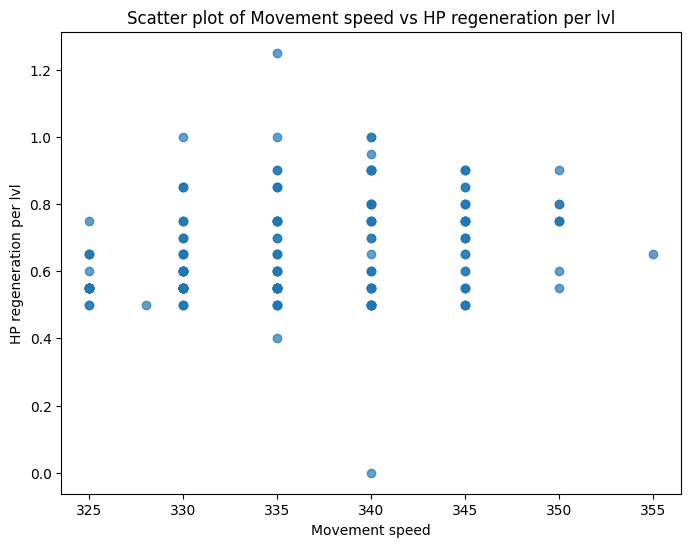

Correlation between Movement speed and Mana regeneration: 0.01


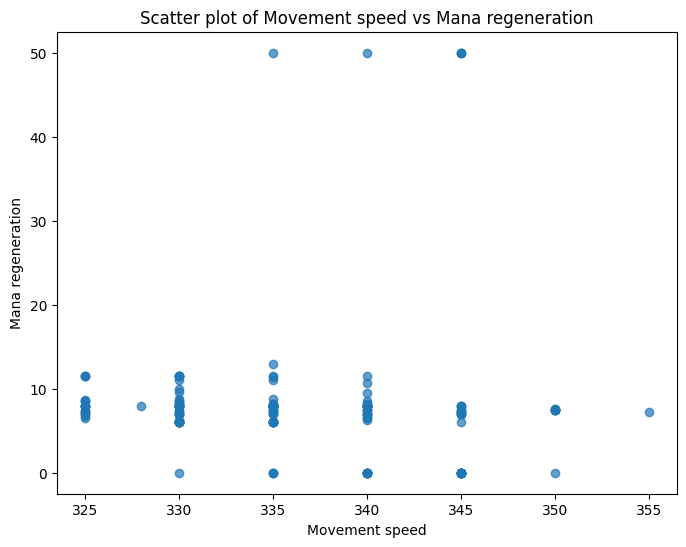

Correlation between Movement speed and Mana regeneration per lvl: -0.34


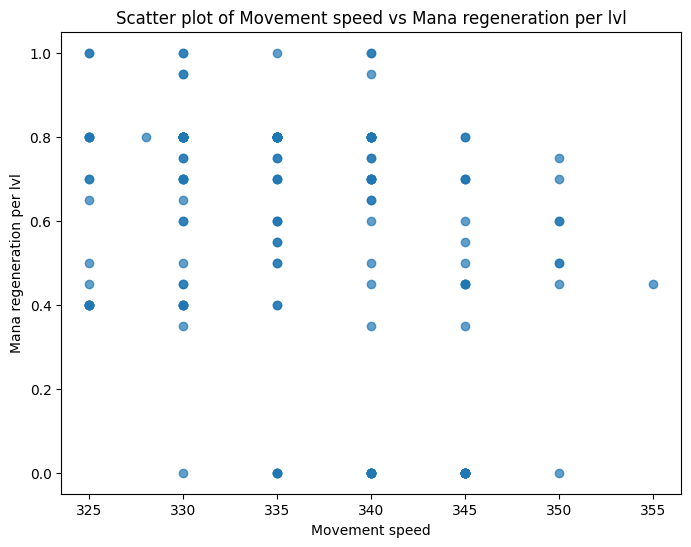

Correlation between Movement speed and Attack damage: 0.53


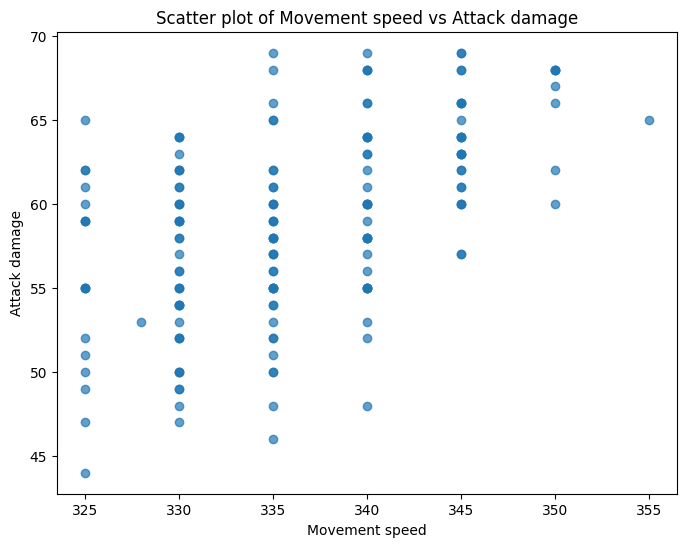

Correlation between Movement speed and Attack damage per lvl: 0.29


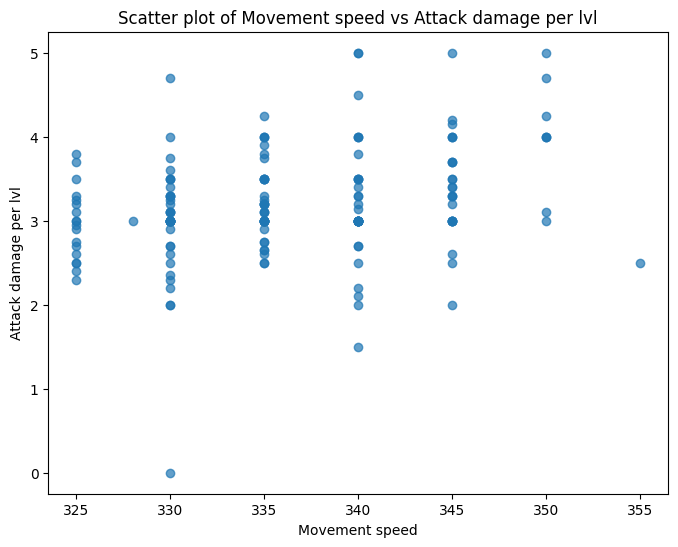

Correlation between Movement speed and Attack speed per lvl: 0.08


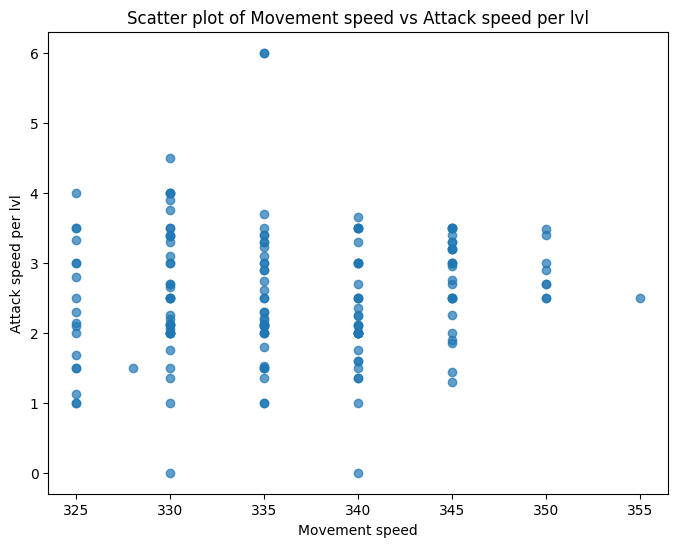

Correlation between Movement speed and Attack speed: 0.08


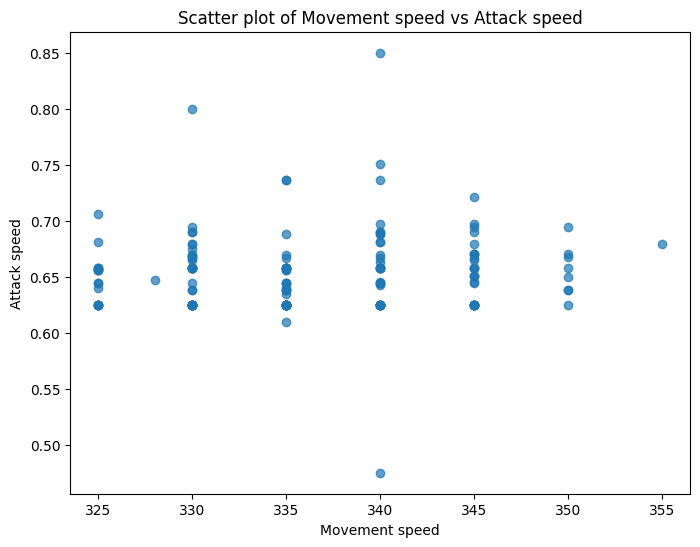

Correlation between Movement speed and AS ratio: 0.16


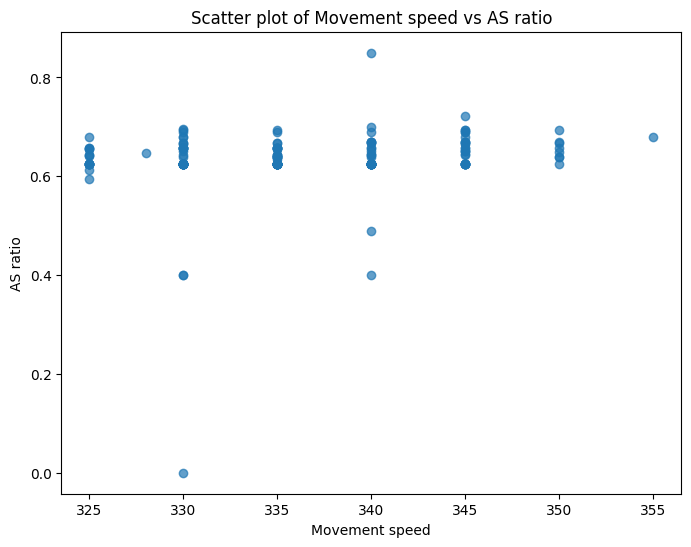

Correlation between Base armor and Armor per lvl: 0.06


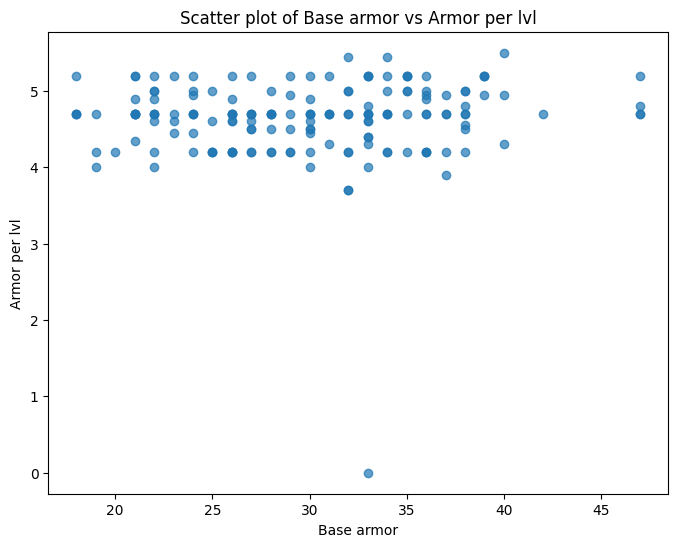

Correlation between Base armor and Base magic resistance: 0.30


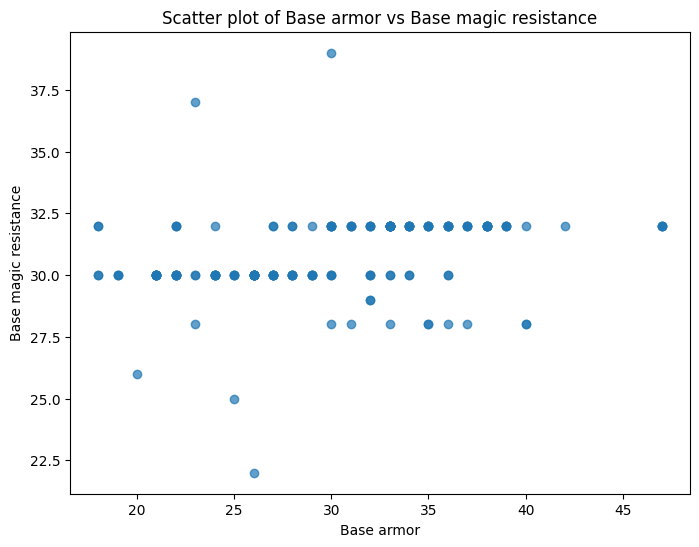

Correlation between Base armor and Magic resistance per lvl: 0.70


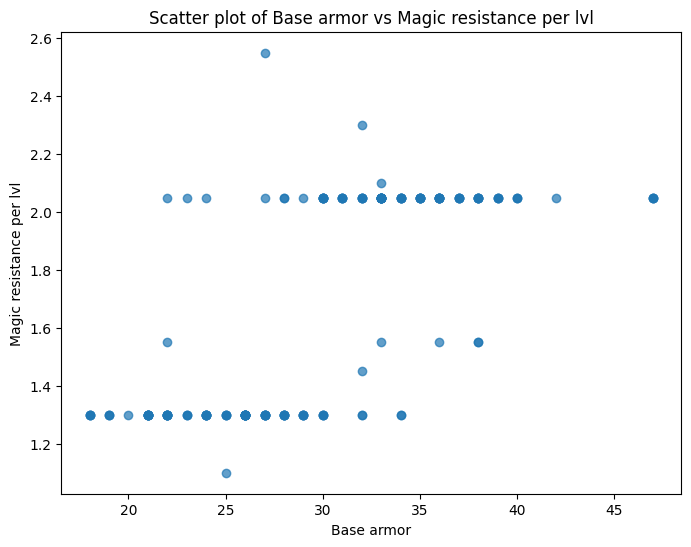

Correlation between Base armor and Attack range: -0.69


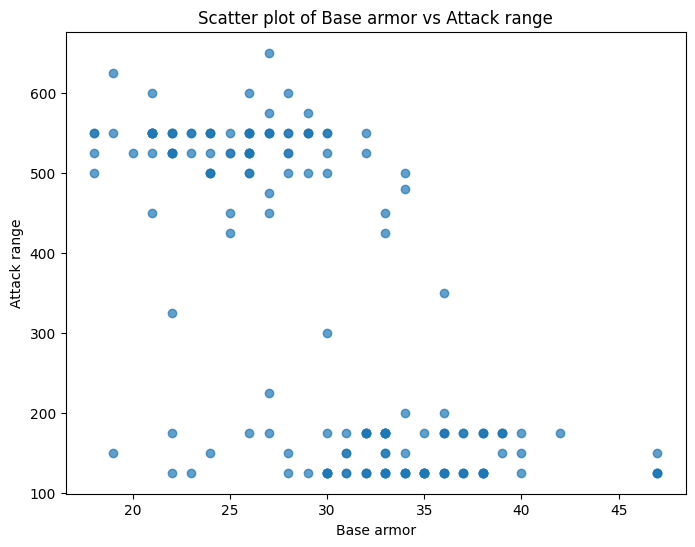

Correlation between Base armor and HP regeneration: 0.38


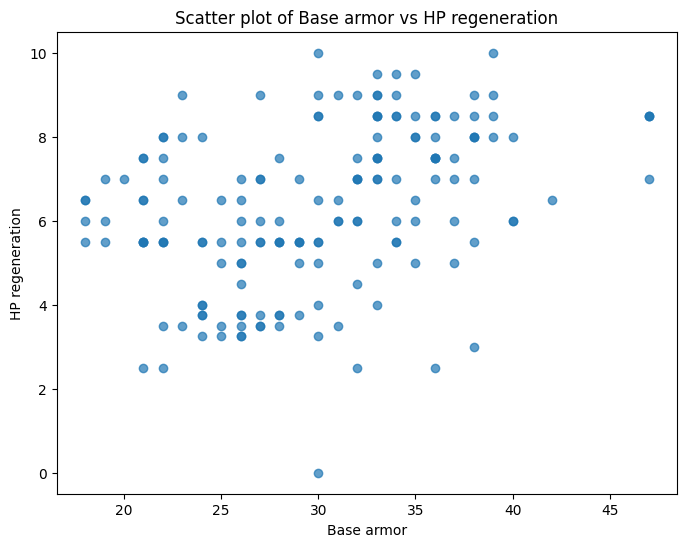

Correlation between Base armor and HP regeneration per lvl: 0.29


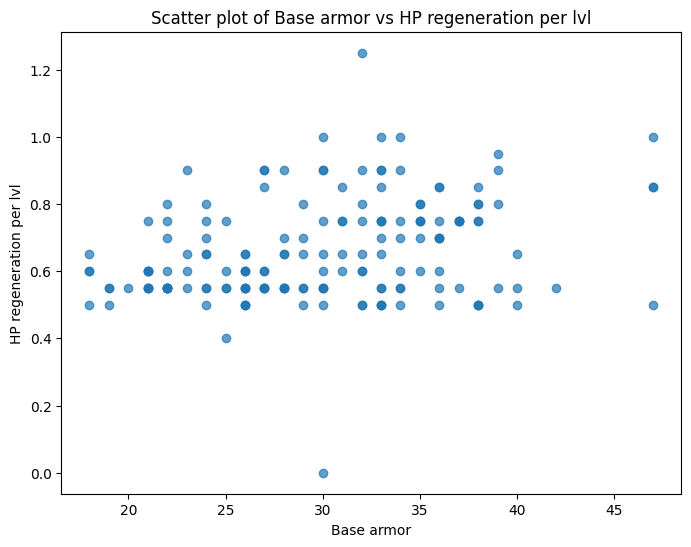

Correlation between Base armor and Mana regeneration: -0.08


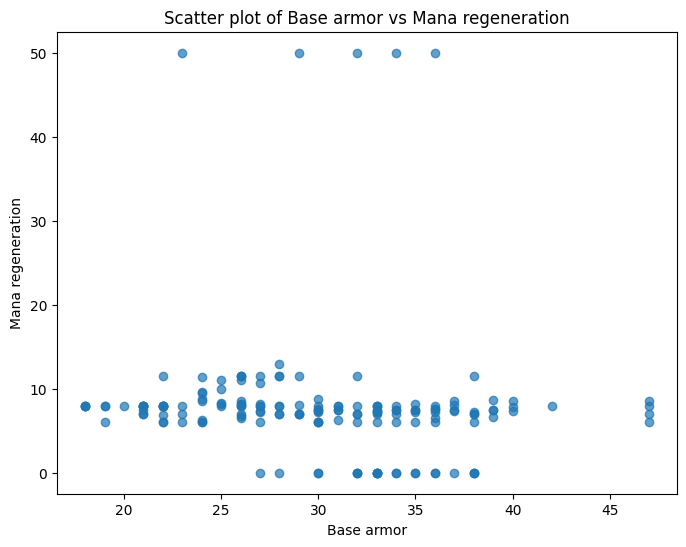

Correlation between Base armor and Mana regeneration per lvl: -0.26


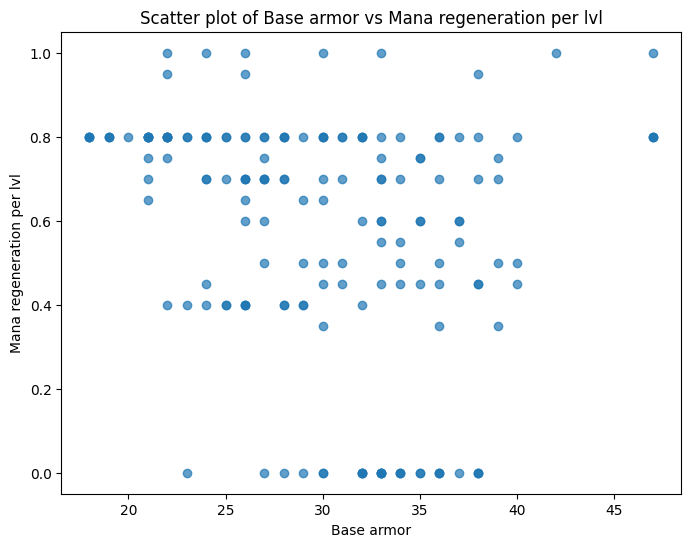

Correlation between Base armor and Attack damage: 0.53


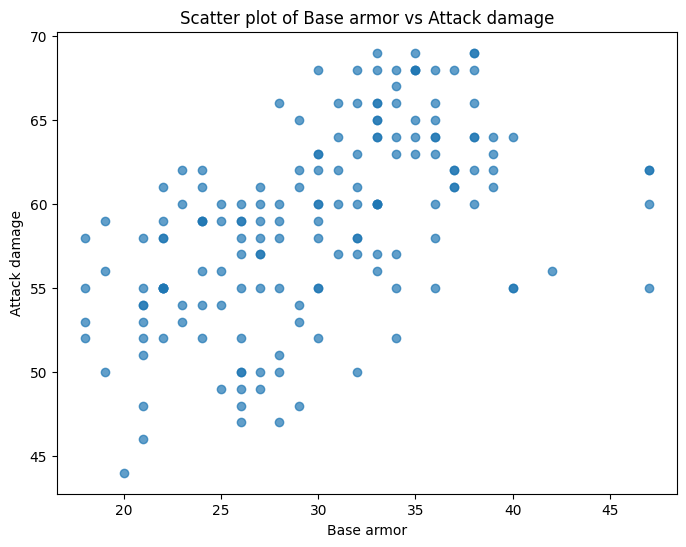

Correlation between Base armor and Attack damage per lvl: 0.29


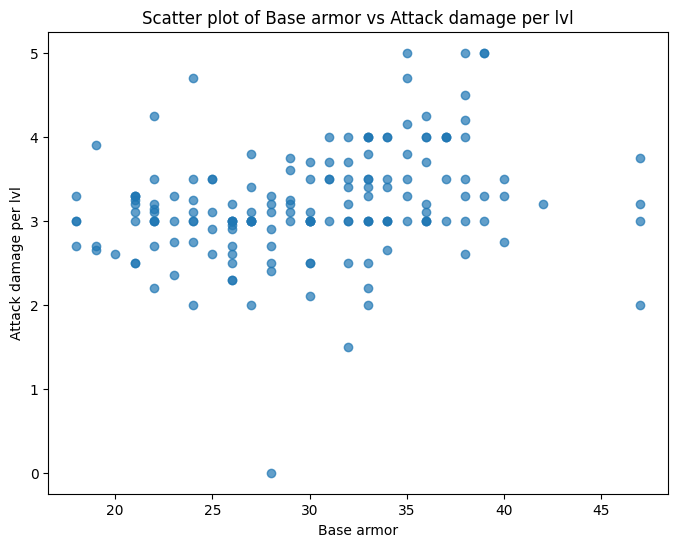

Correlation between Base armor and Attack speed per lvl: 0.04


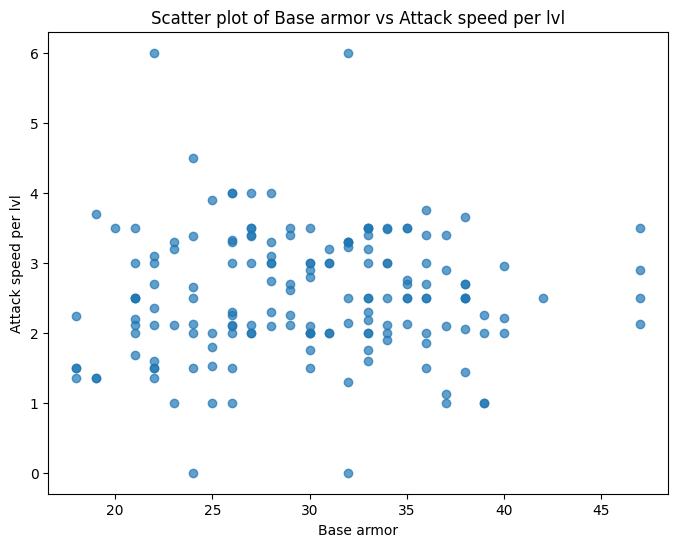

Correlation between Base armor and Attack speed: 0.08


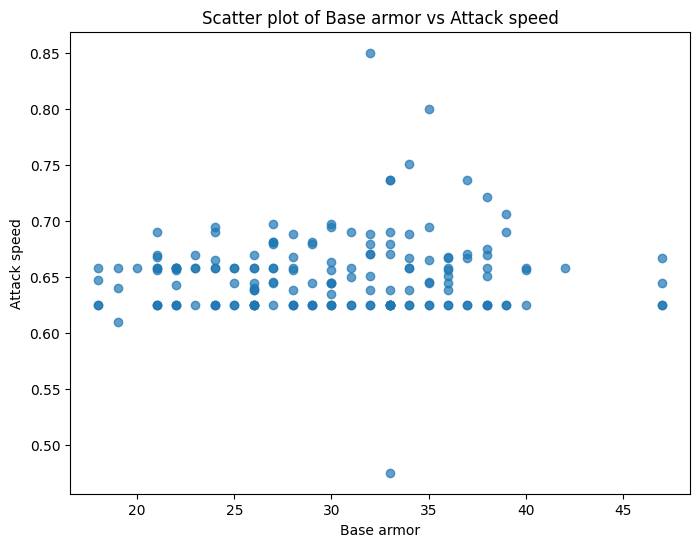

Correlation between Base armor and AS ratio: 0.13


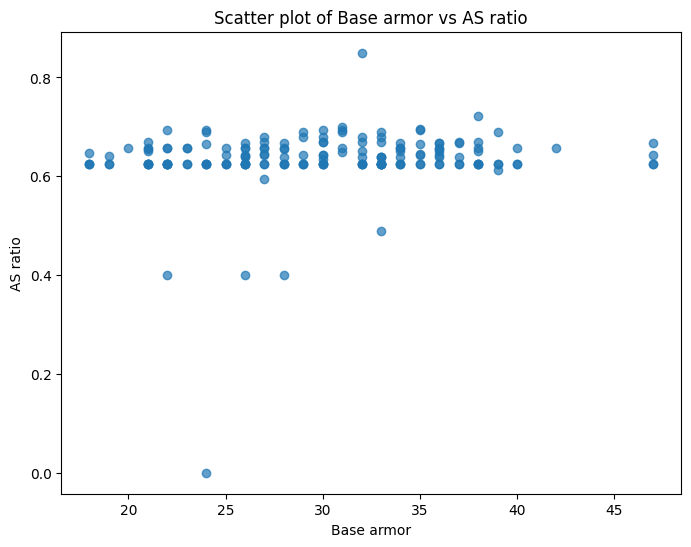

Correlation between Armor per lvl and Base magic resistance: 0.10


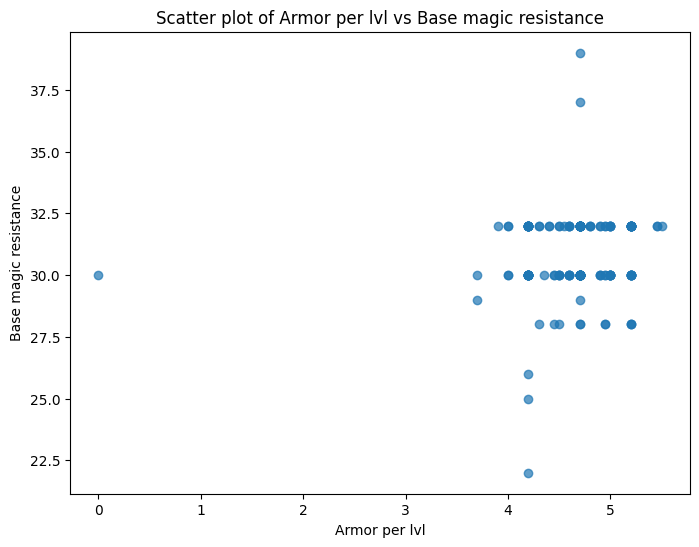

Correlation between Armor per lvl and Magic resistance per lvl: 0.10


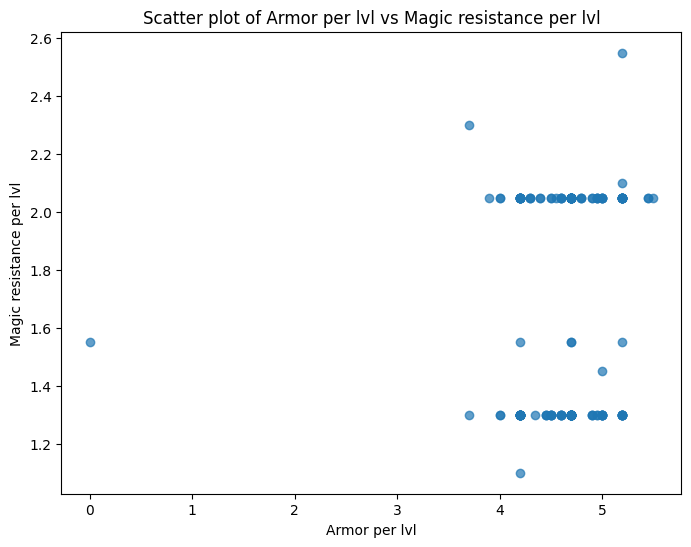

Correlation between Armor per lvl and Attack range: -0.06


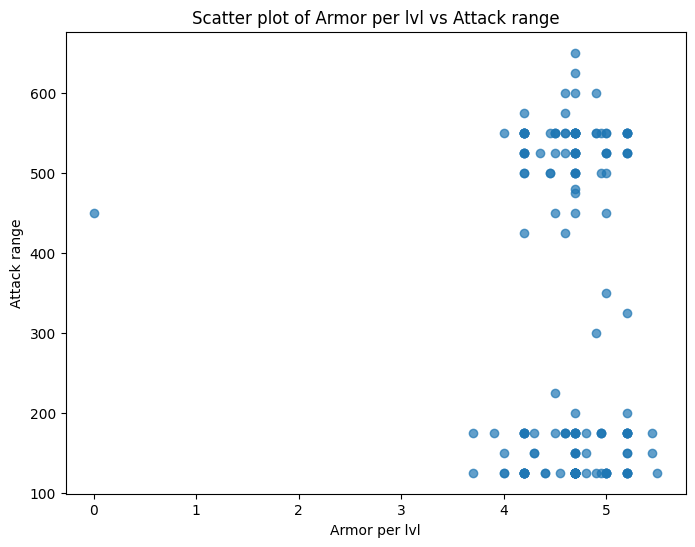

Correlation between Armor per lvl and HP regeneration: 0.11


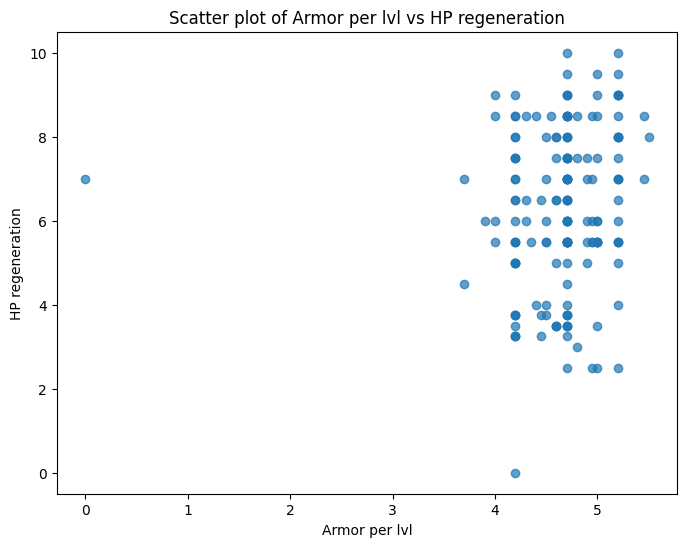

Correlation between Armor per lvl and HP regeneration per lvl: 0.12


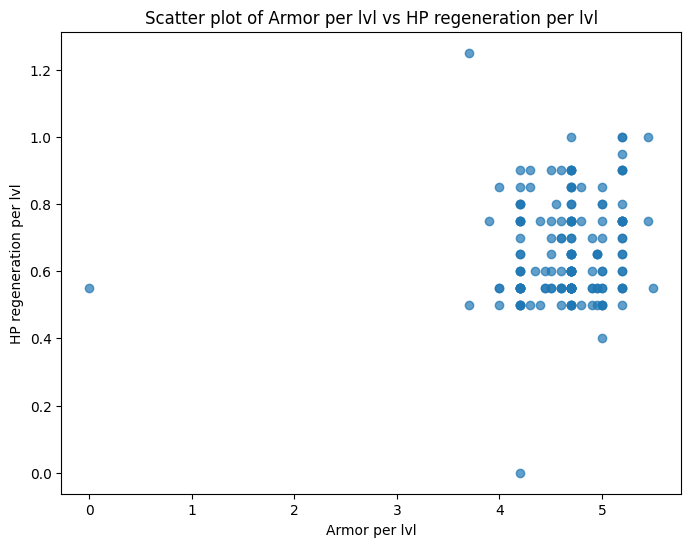

Correlation between Armor per lvl and Mana regeneration: 0.05


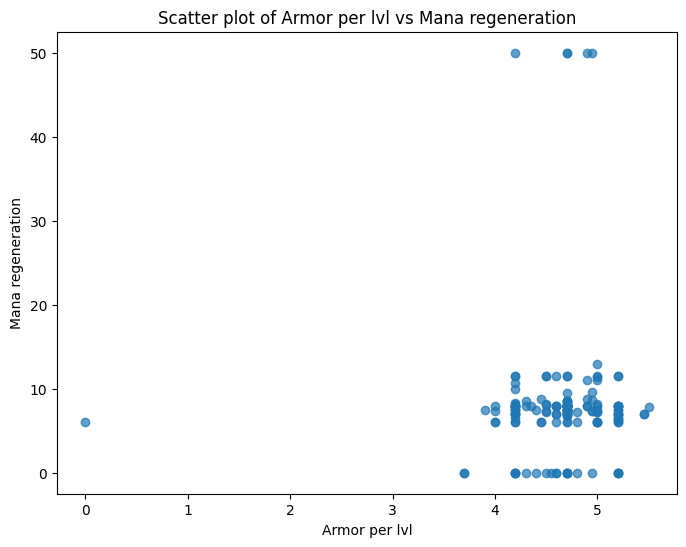

Correlation between Armor per lvl and Mana regeneration per lvl: 0.01


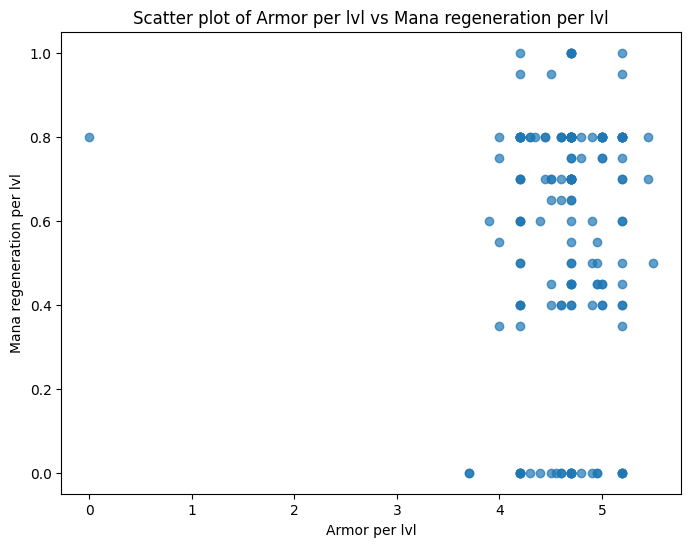

Correlation between Armor per lvl and Attack damage: 0.06


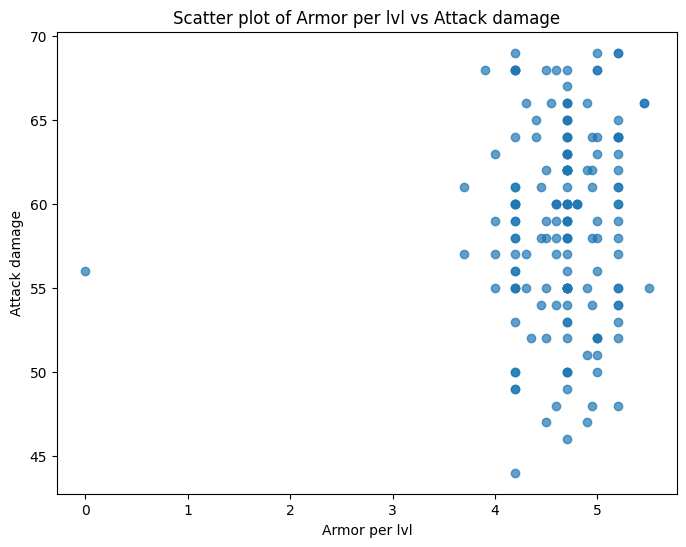

Correlation between Armor per lvl and Attack damage per lvl: 0.19


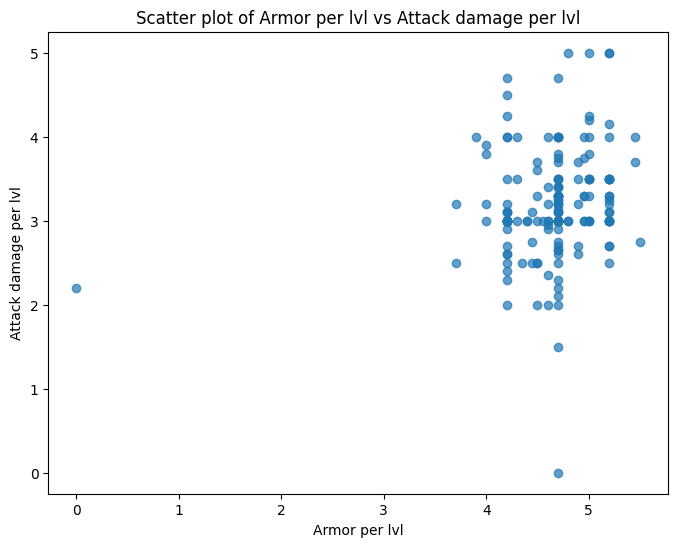

Correlation between Armor per lvl and Attack speed per lvl: -0.09


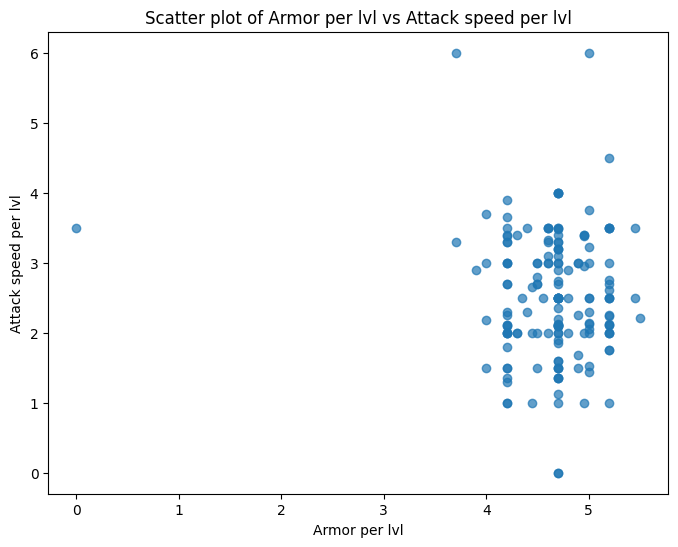

Correlation between Armor per lvl and Attack speed: 0.01


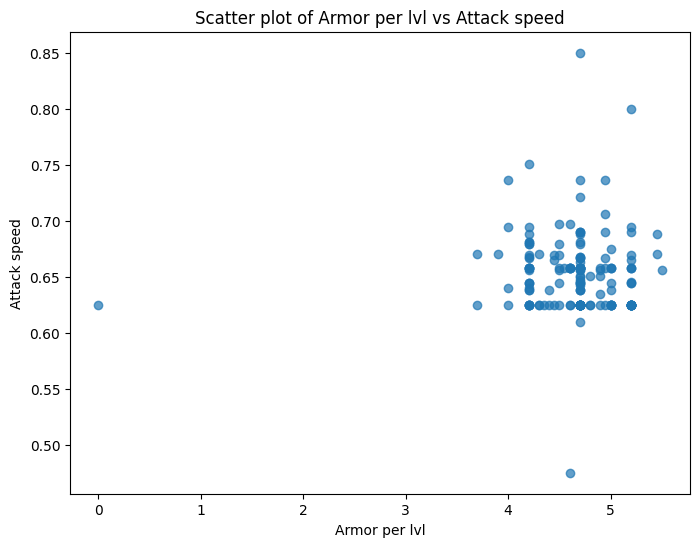

Correlation between Armor per lvl and AS ratio: 0.00


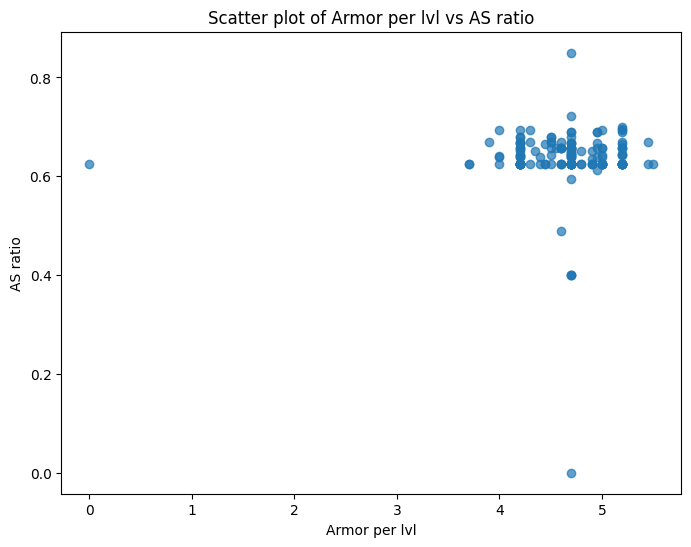

Correlation between Base magic resistance and Magic resistance per lvl: 0.54


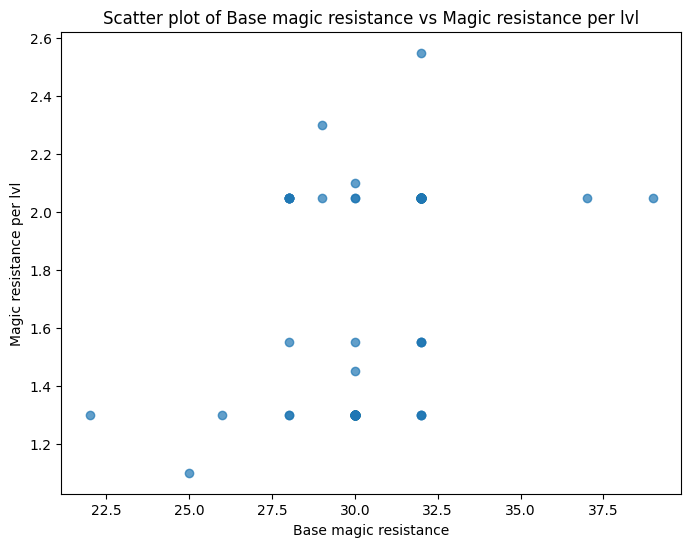

Correlation between Base magic resistance and Attack range: -0.43


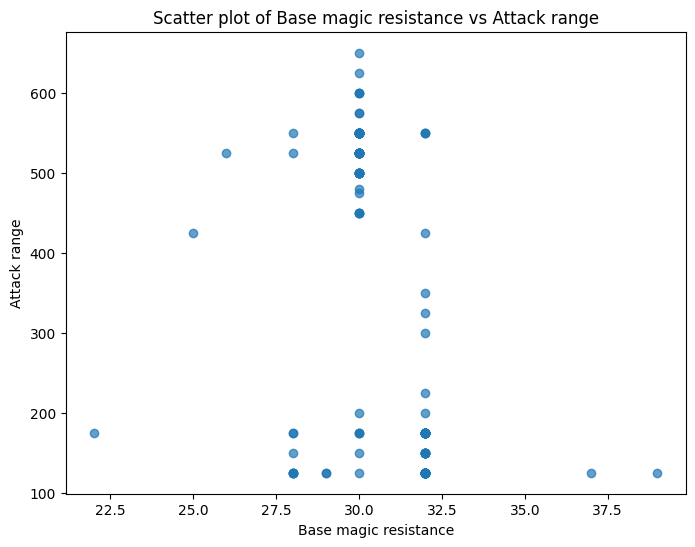

Correlation between Base magic resistance and HP regeneration: 0.37


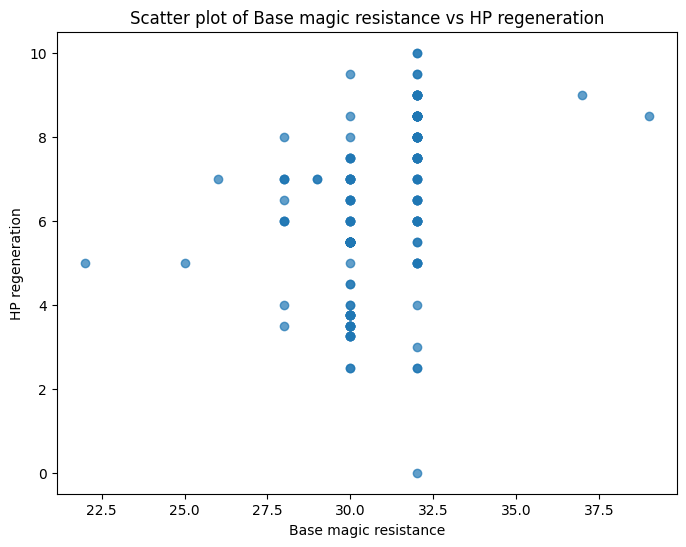

Correlation between Base magic resistance and HP regeneration per lvl: 0.34


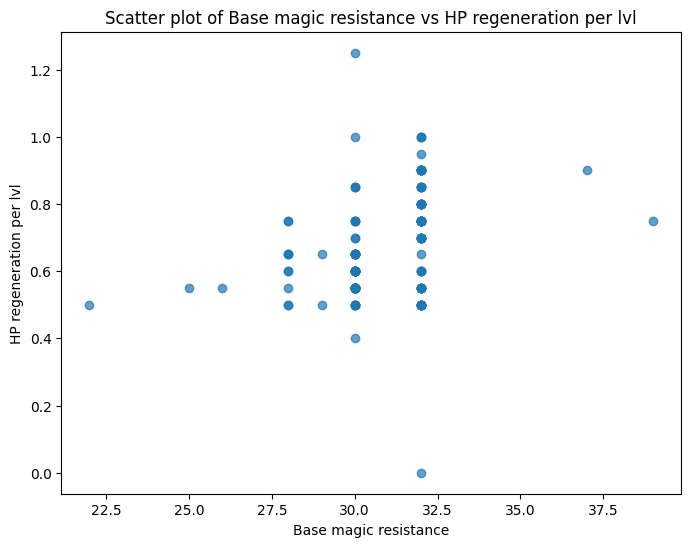

Correlation between Base magic resistance and Mana regeneration: 0.08


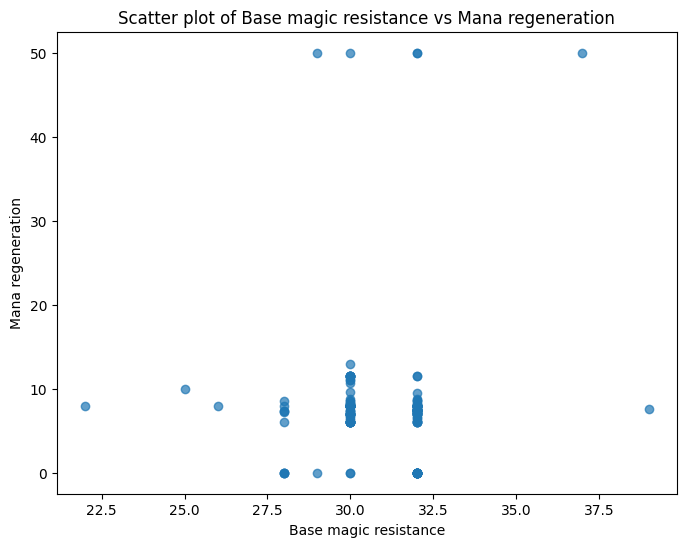

Correlation between Base magic resistance and Mana regeneration per lvl: -0.08


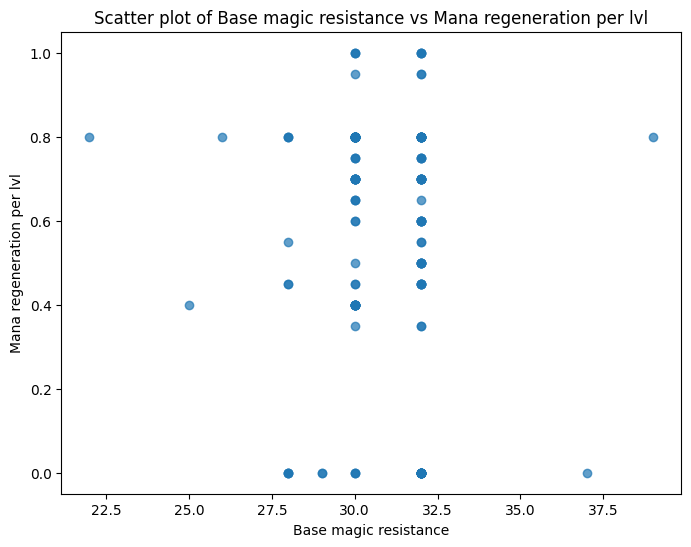

Correlation between Base magic resistance and Attack damage: 0.46


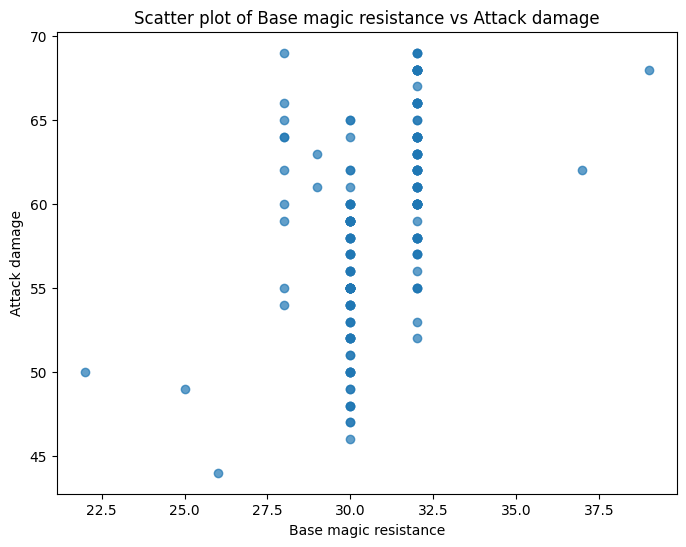

Correlation between Base magic resistance and Attack damage per lvl: 0.15


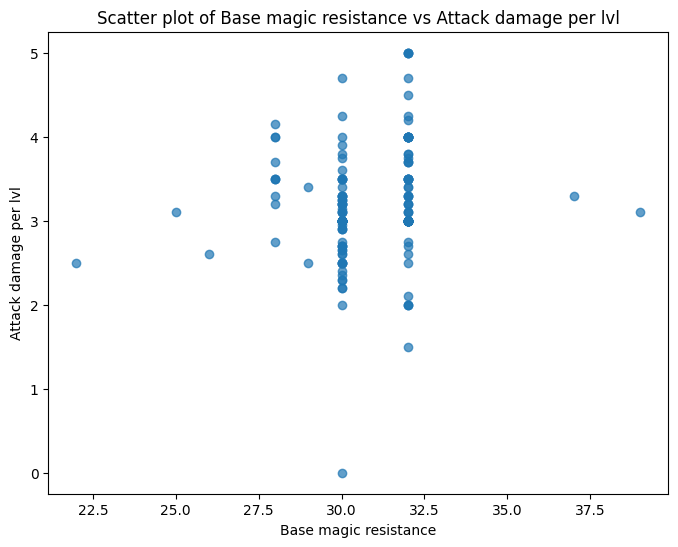

Correlation between Base magic resistance and Attack speed per lvl: 0.05


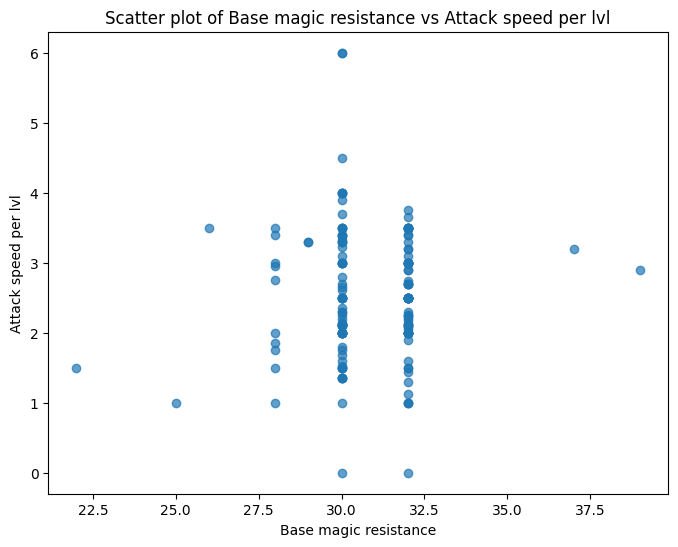

Correlation between Base magic resistance and Attack speed: 0.07


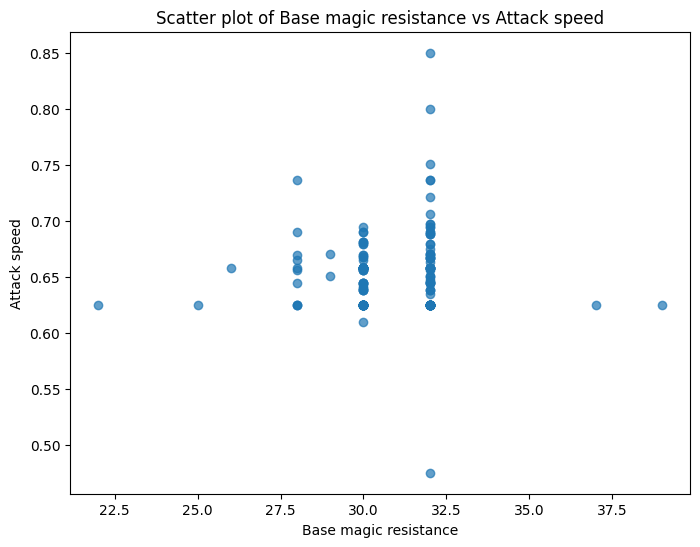

Correlation between Base magic resistance and AS ratio: 0.07


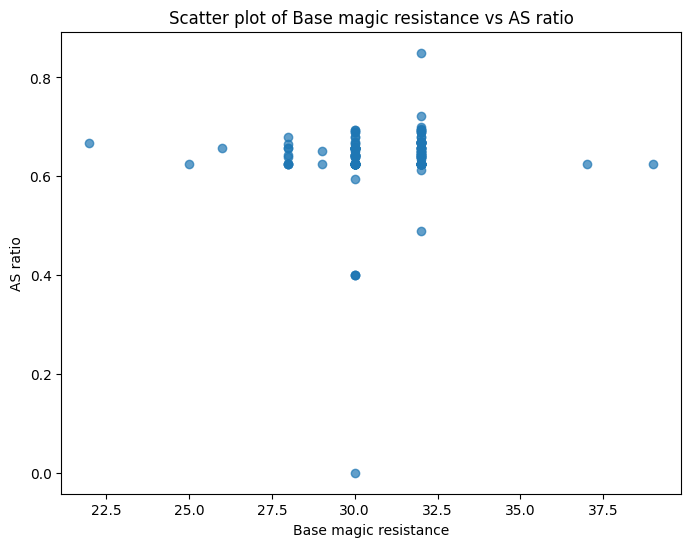

Correlation between Magic resistance per lvl and Attack range: -0.90


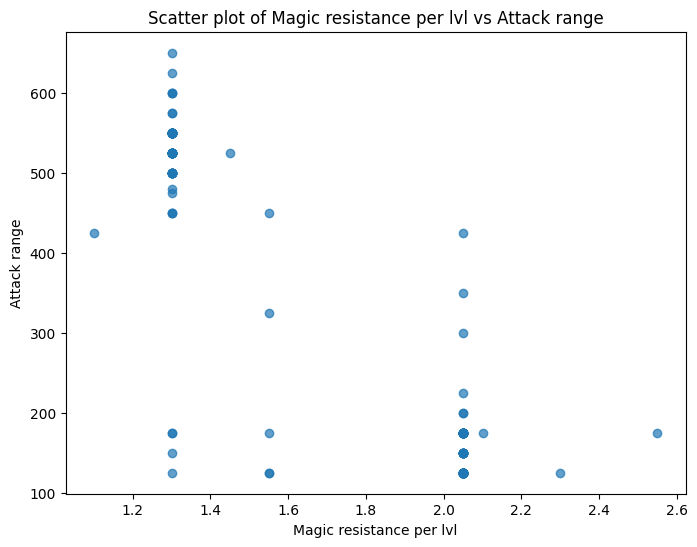

Correlation between Magic resistance per lvl and HP regeneration: 0.55


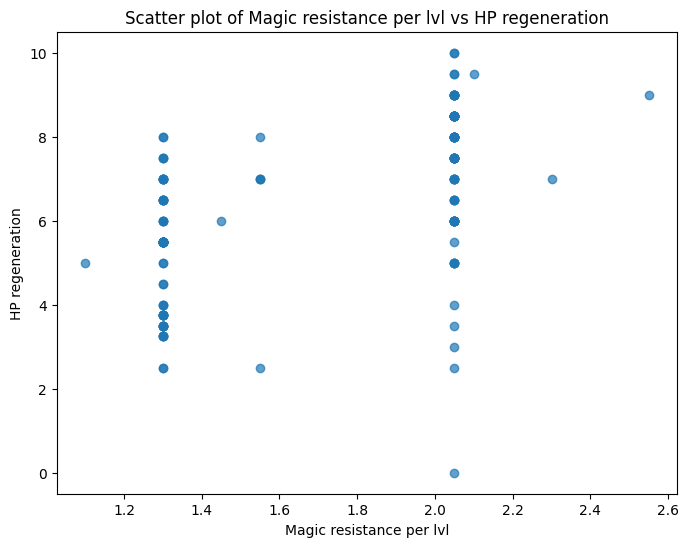

Correlation between Magic resistance per lvl and HP regeneration per lvl: 0.41


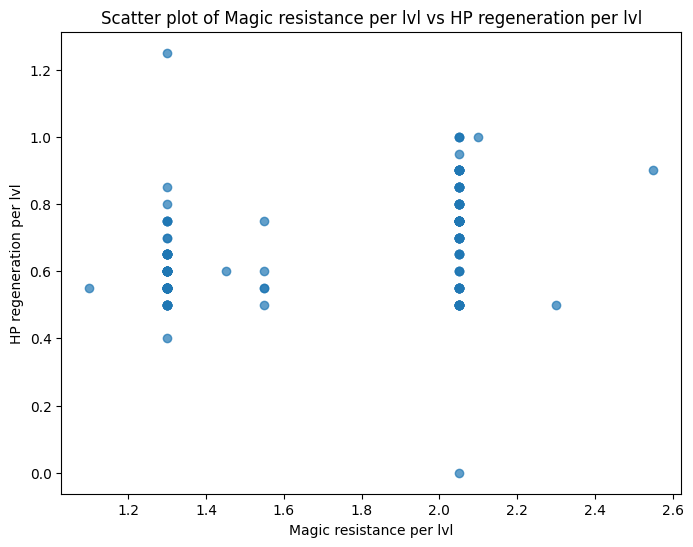

Correlation between Magic resistance per lvl and Mana regeneration: -0.04


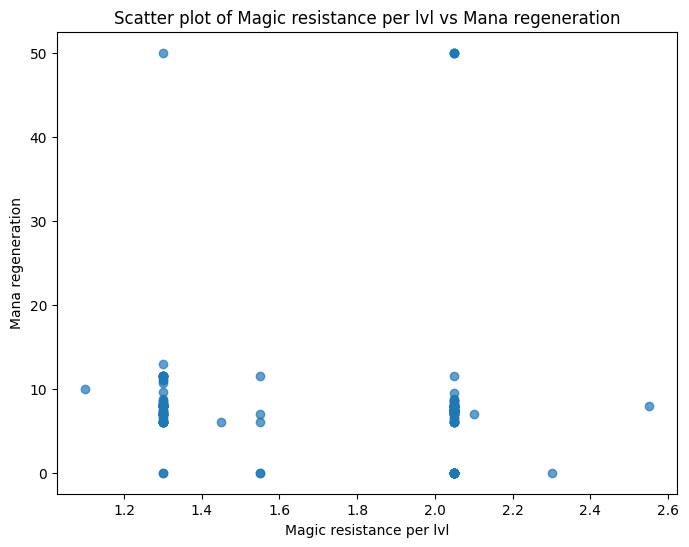

Correlation between Magic resistance per lvl and Mana regeneration per lvl: -0.29


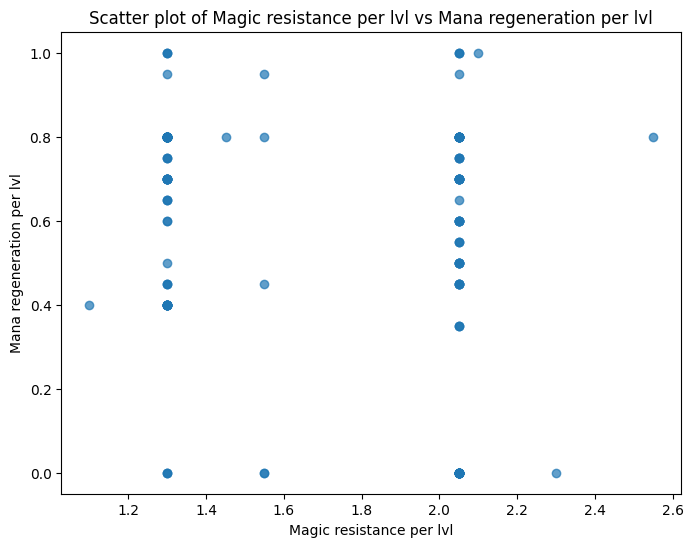

Correlation between Magic resistance per lvl and Attack damage: 0.68


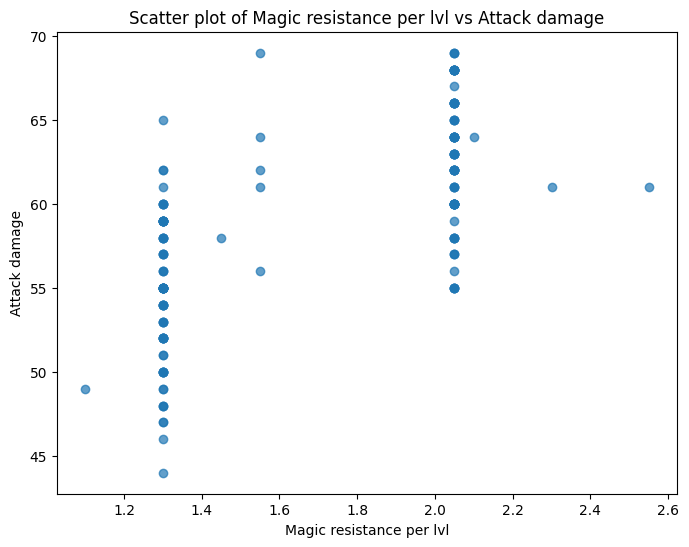

Correlation between Magic resistance per lvl and Attack damage per lvl: 0.31


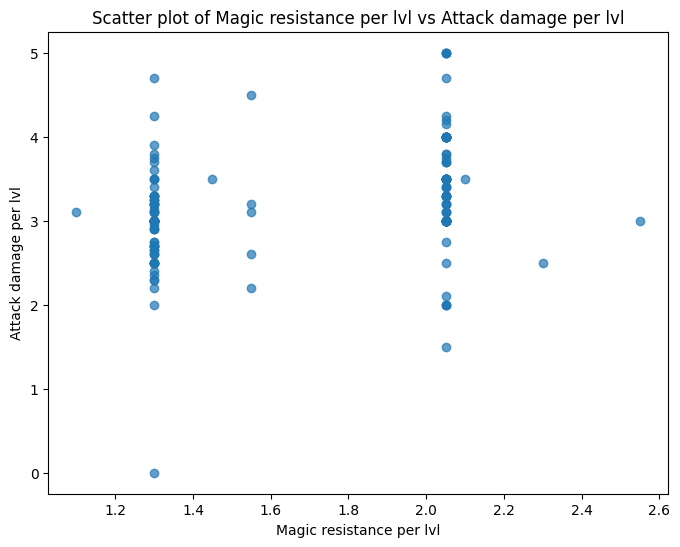

Correlation between Magic resistance per lvl and Attack speed per lvl: 0.02


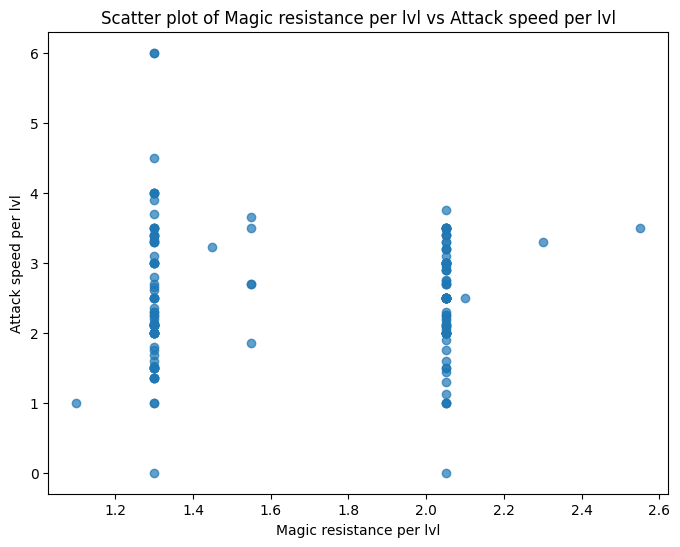

Correlation between Magic resistance per lvl and Attack speed: 0.15


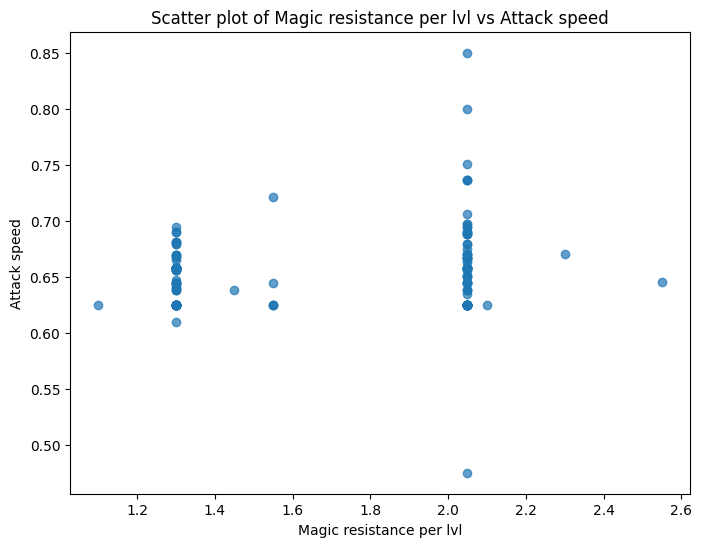

Correlation between Magic resistance per lvl and AS ratio: 0.17


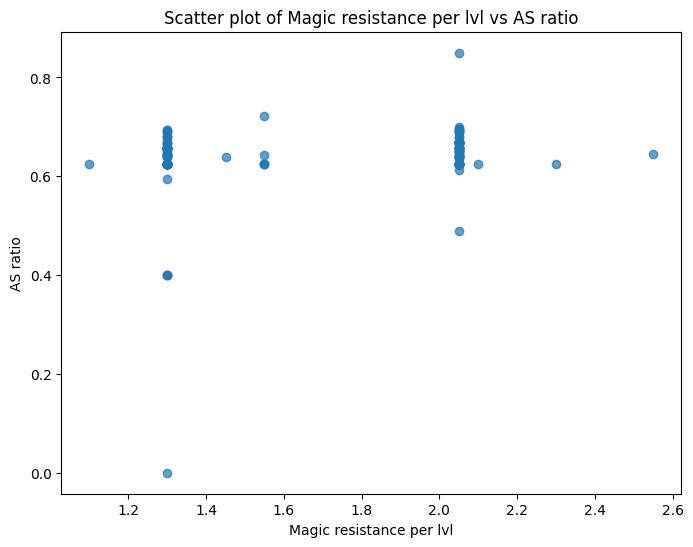

Correlation between Attack range and HP regeneration: -0.53


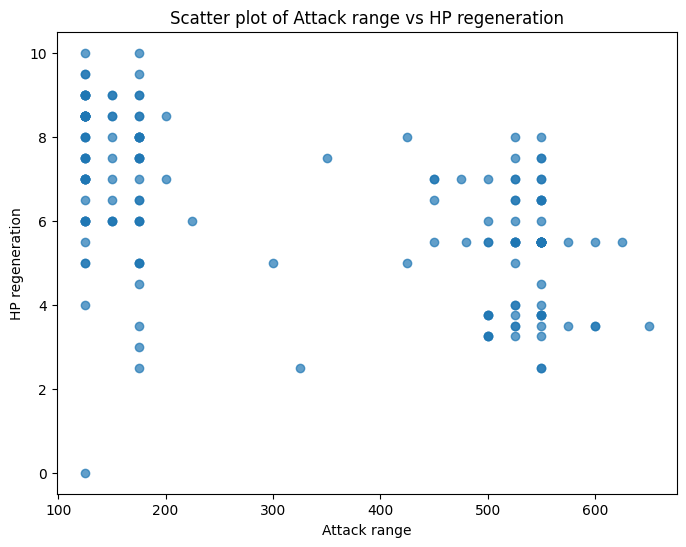

Correlation between Attack range and HP regeneration per lvl: -0.41


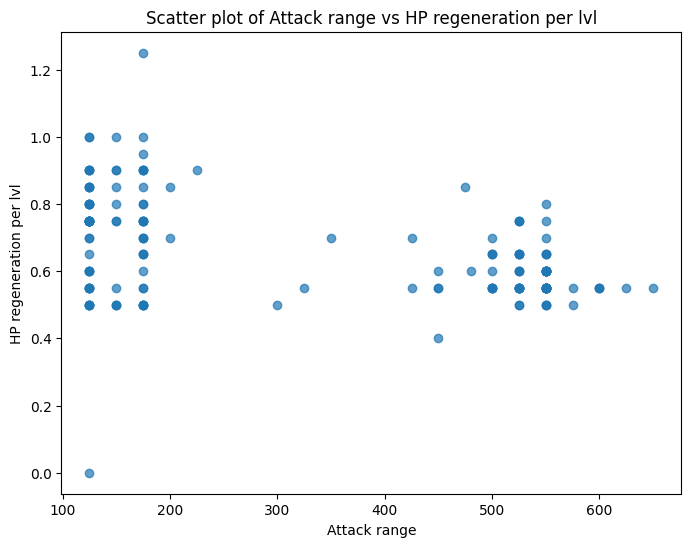

Correlation between Attack range and Mana regeneration: 0.05


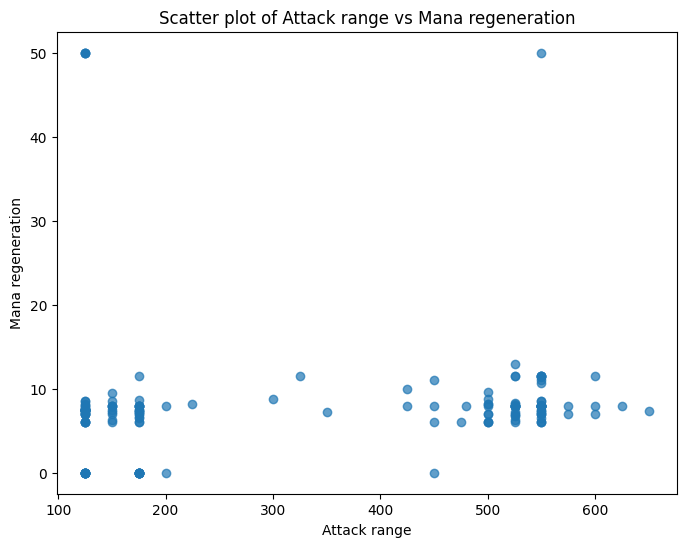

Correlation between Attack range and Mana regeneration per lvl: 0.34


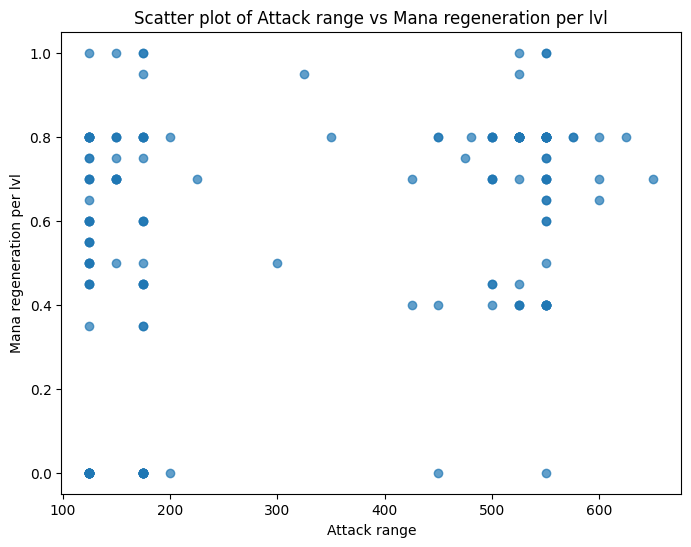

Correlation between Attack range and Attack damage: -0.66


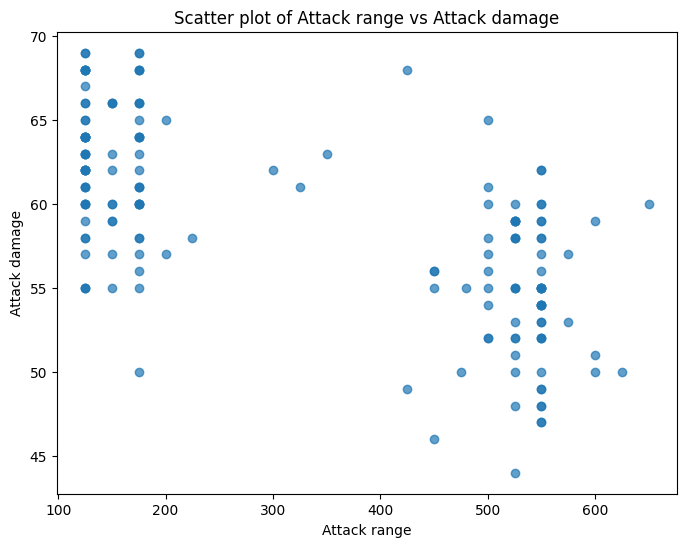

Correlation between Attack range and Attack damage per lvl: -0.34


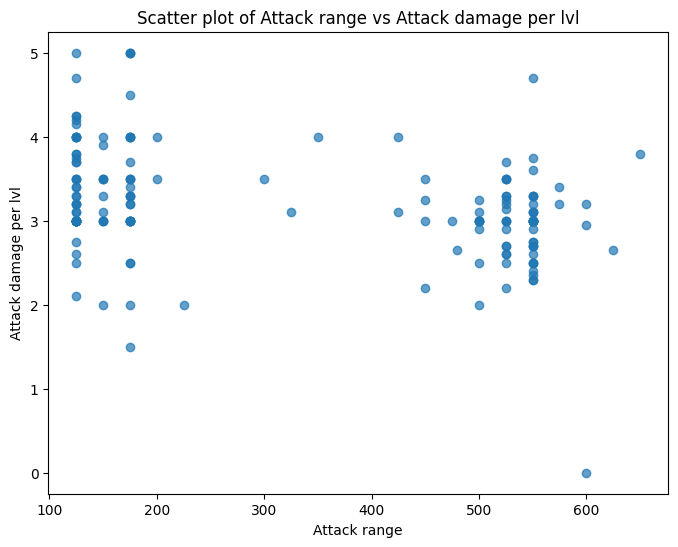

Correlation between Attack range and Attack speed per lvl: -0.03


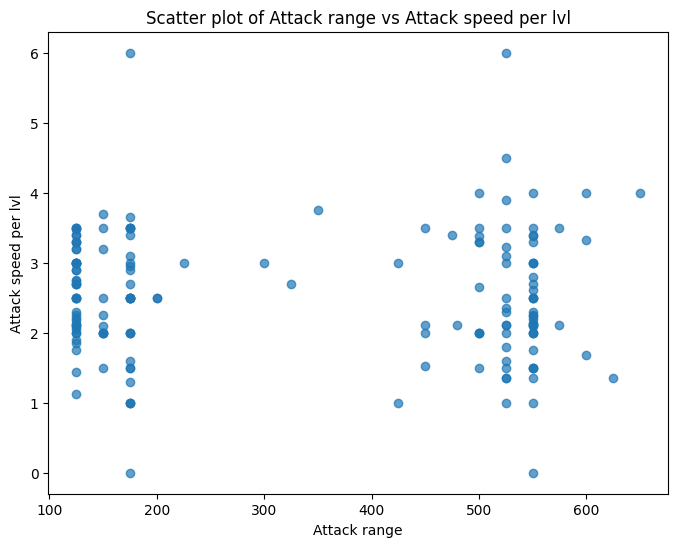

Correlation between Attack range and Attack speed: -0.18


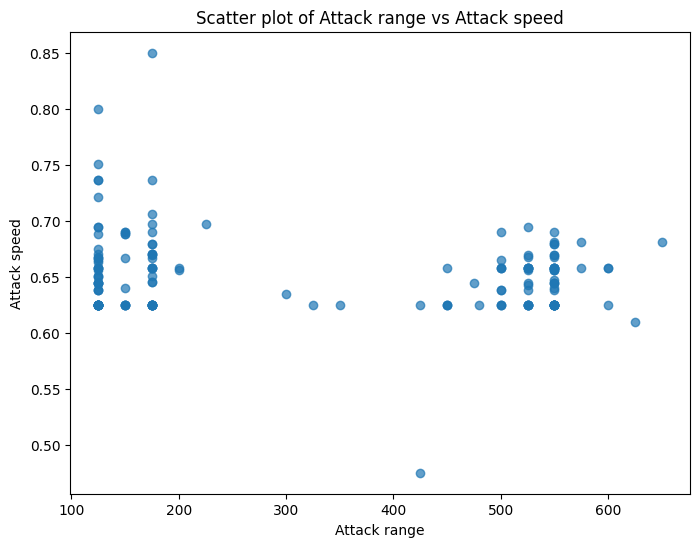

Correlation between Attack range and AS ratio: -0.22


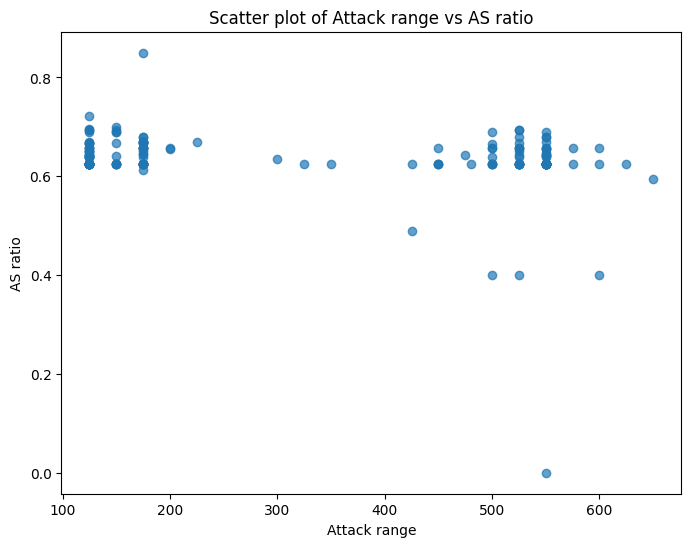

Correlation between HP regeneration and HP regeneration per lvl: 0.53


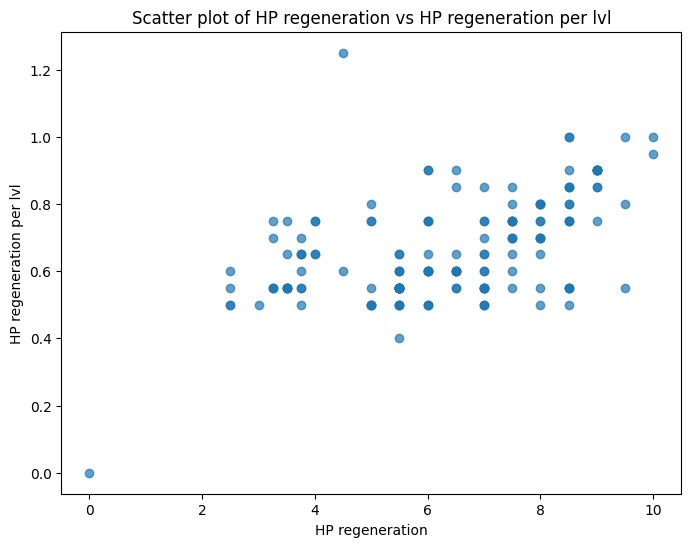

Correlation between HP regeneration and Mana regeneration: 0.08


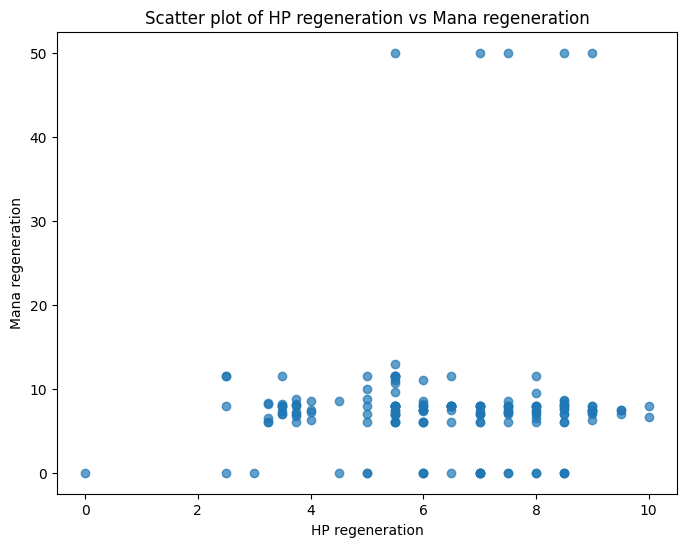

Correlation between HP regeneration and Mana regeneration per lvl: -0.04


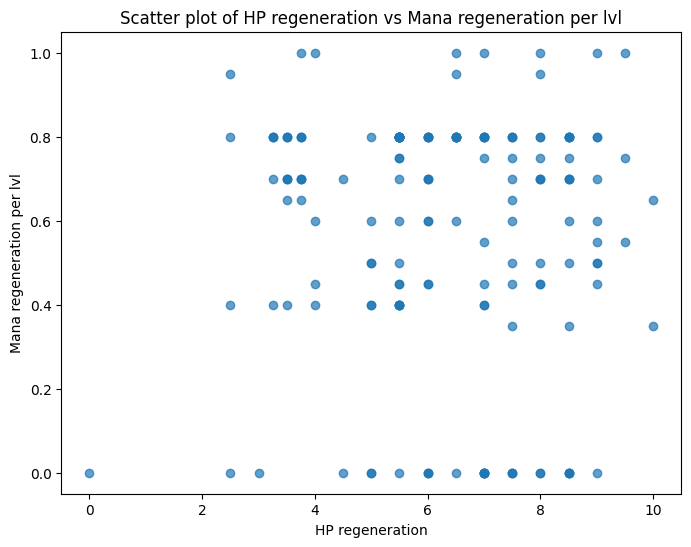

Correlation between HP regeneration and Attack damage: 0.36


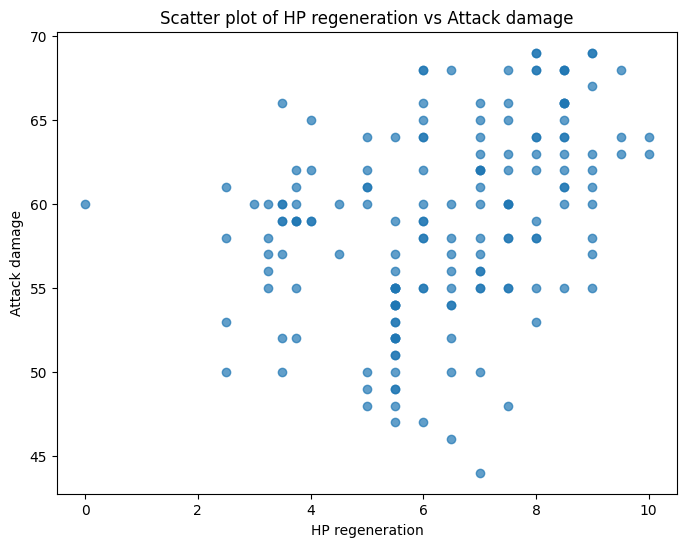

Correlation between HP regeneration and Attack damage per lvl: 0.23


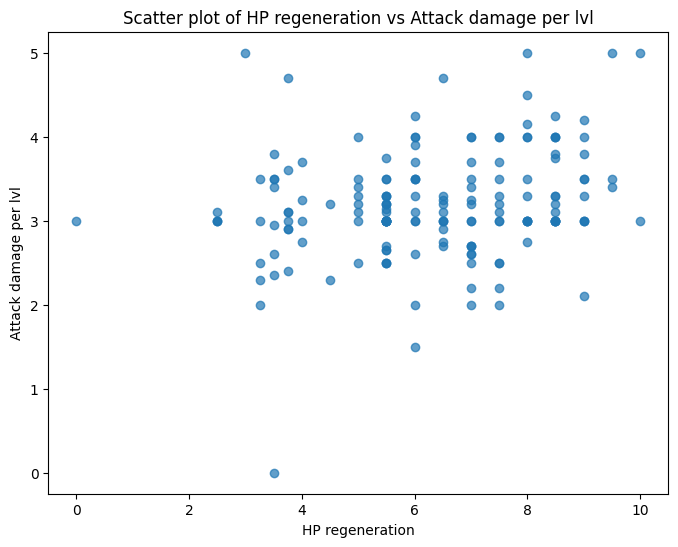

Correlation between HP regeneration and Attack speed per lvl: -0.05


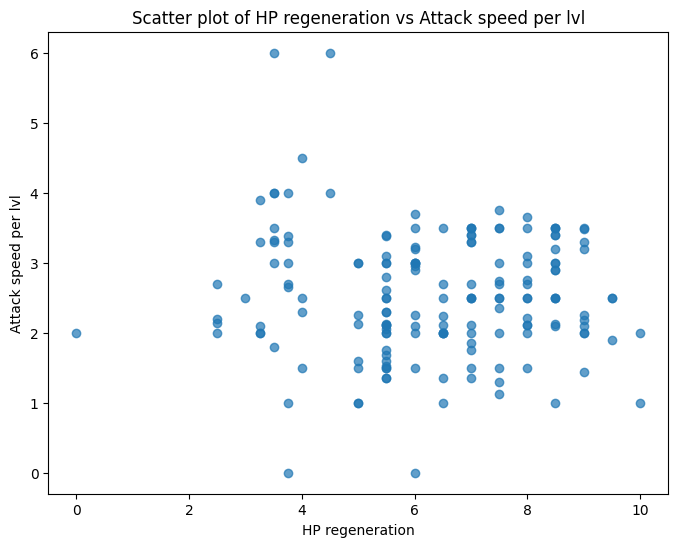

Correlation between HP regeneration and Attack speed: -0.01


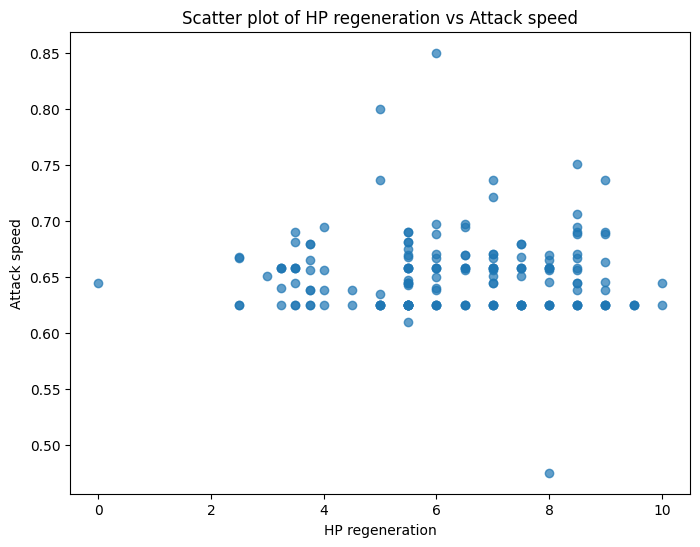

Correlation between HP regeneration and AS ratio: 0.09


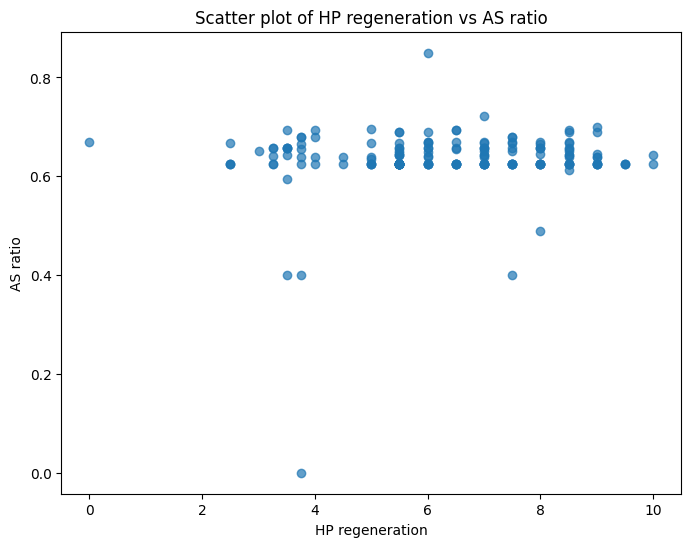

Correlation between HP regeneration per lvl and Mana regeneration: 0.06


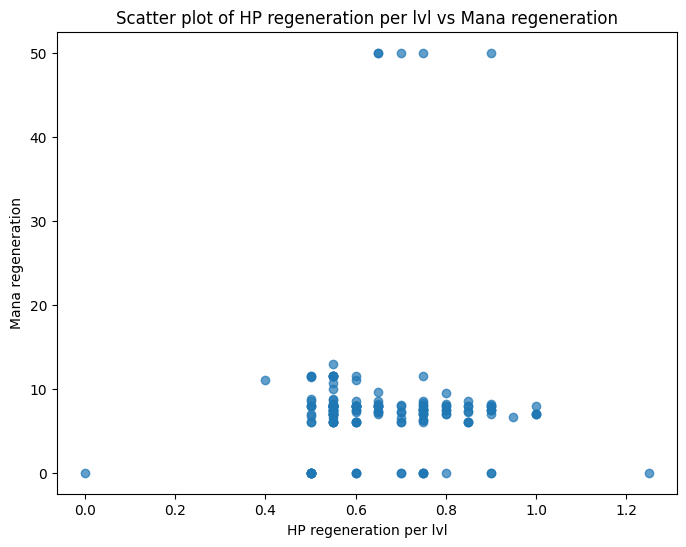

Correlation between HP regeneration per lvl and Mana regeneration per lvl: 0.02


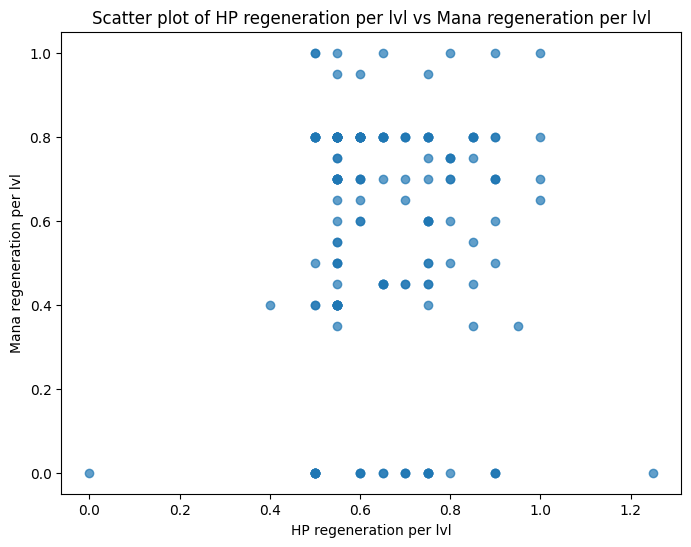

Correlation between HP regeneration per lvl and Attack damage: 0.33


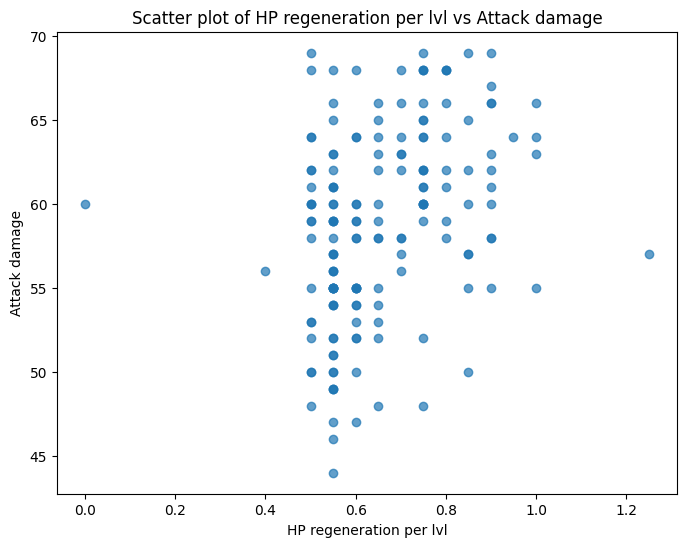

Correlation between HP regeneration per lvl and Attack damage per lvl: 0.19


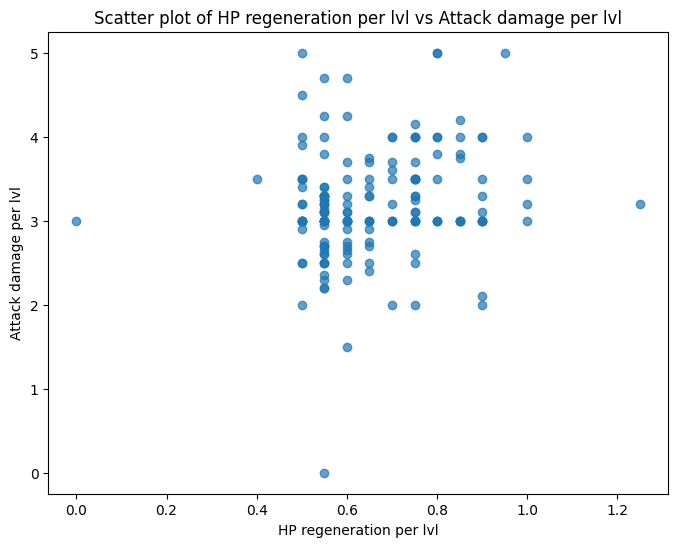

Correlation between HP regeneration per lvl and Attack speed per lvl: 0.21


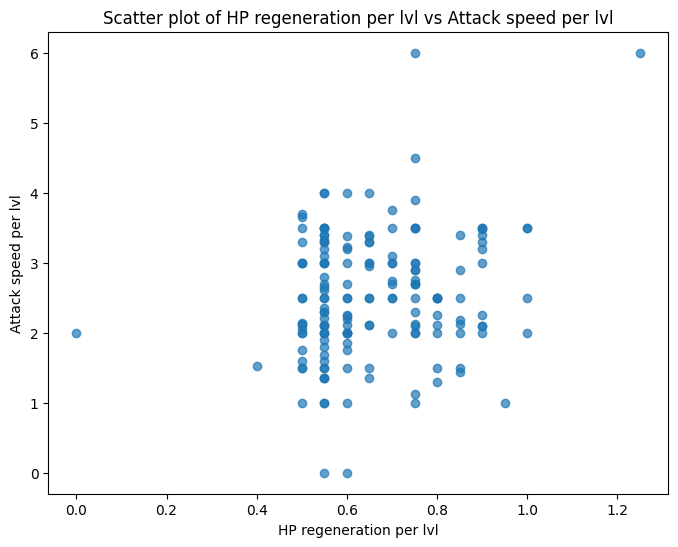

Correlation between HP regeneration per lvl and Attack speed: 0.01


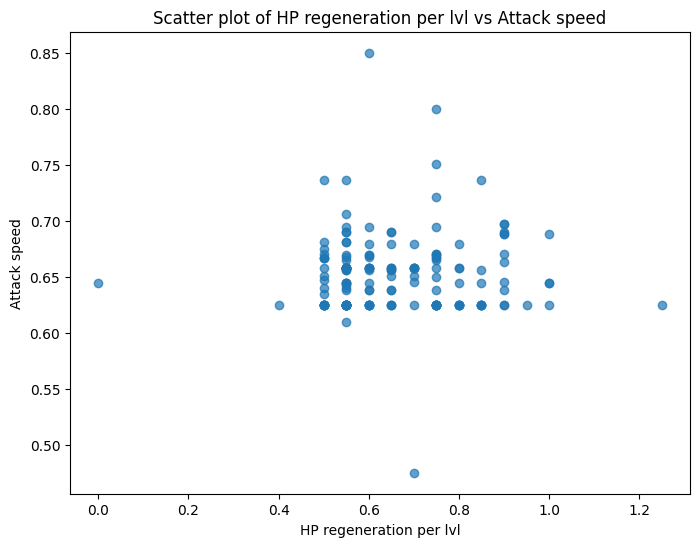

Correlation between HP regeneration per lvl and AS ratio: 0.08


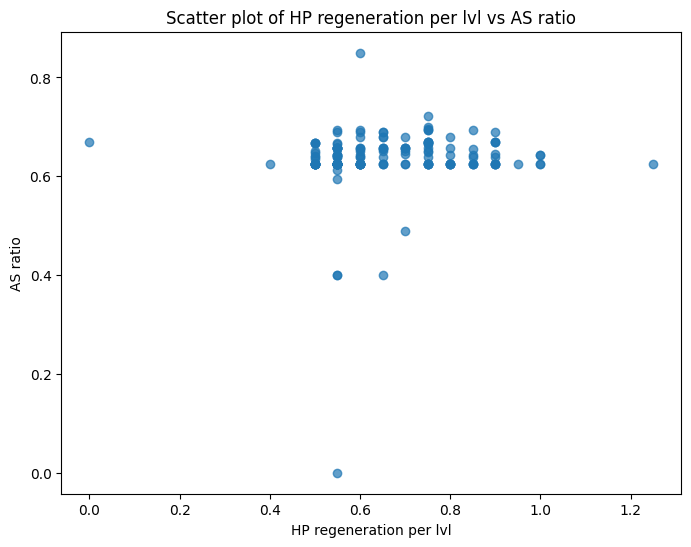

Correlation between Mana regeneration and Mana regeneration per lvl: -0.06


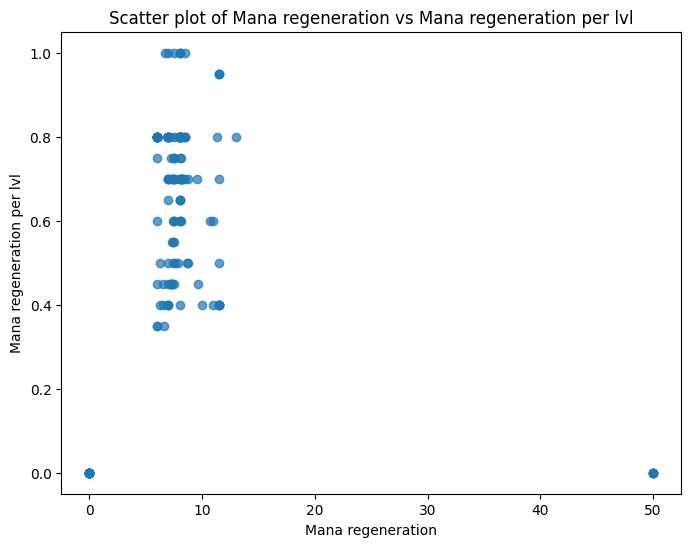

Correlation between Mana regeneration and Attack damage: -0.07


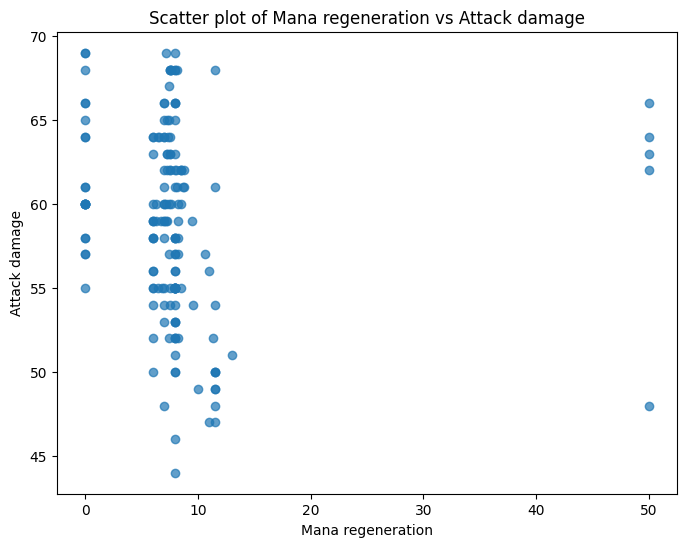

Correlation between Mana regeneration and Attack damage per lvl: 0.01


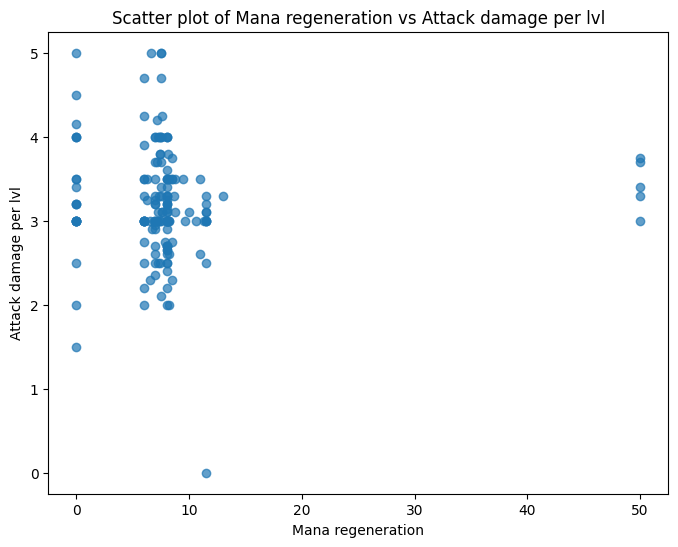

Correlation between Mana regeneration and Attack speed per lvl: 0.09


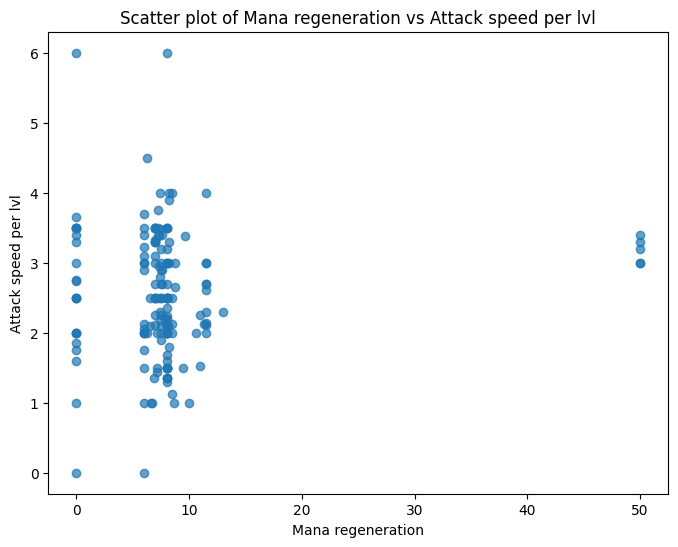

Correlation between Mana regeneration and Attack speed: -0.02


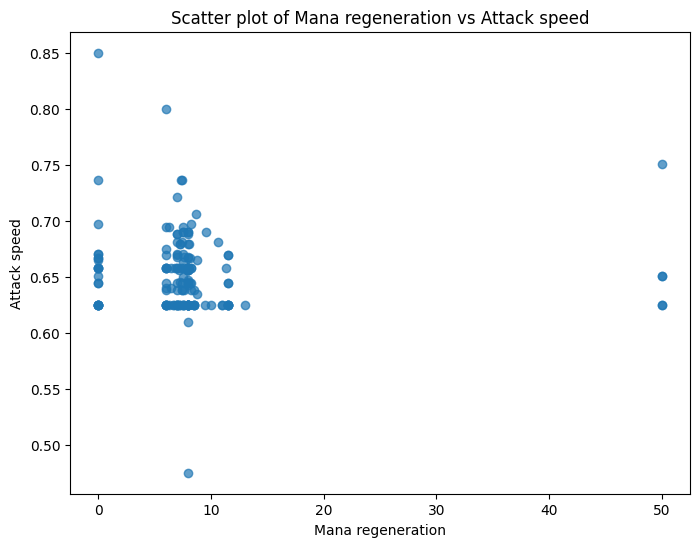

Correlation between Mana regeneration and AS ratio: -0.00


KeyboardInterrupt: 

In [64]:
numerical_columns = [
    'Base HP', 'HP per lvl', 'Base mana', 'Mana per lvl', 'Movement speed', 
    'Base armor', 'Armor per lvl', 'Base magic resistance', 'Magic resistance per lvl', 
    'Attack range', 'HP regeneration', 'HP regeneration per lvl', 
    'Mana regeneration', 'Mana regeneration per lvl', 'Attack damage', 
    'Attack damage per lvl', 'Attack speed per lvl', 'Attack speed', 'AS ratio'
]

combinations = itertools.combinations(numerical_columns, 2)
# Arrays to store correlation values and graph names
correlation_scores = []  # Stores correlation values
graph_details = []       # Stores graph names and correlation scores

# Create scatter plots for each combination
for col1, col2 in combinations:
    # Calculate the correlation coefficient between the two columns
    correlation = lol[col1].corr(lol[col2])
    
    # Append the correlation value to the array
    correlation_scores.append(correlation)
    
    # Append the graph name and correlation score to the details array
    graph_details.append((f"{col1} vs {col2}", correlation))
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(lol[col1], lol[col2], alpha=0.7)
    
    # Print the correlation score
    print(f"Correlation between {col1} and {col2}: {correlation:.2f}")
    
    # Adding labels and title
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"Scatter plot of {col1} vs {col2}")
    
    # Show the plot
    plt.show()


In [94]:
print(graph_details[1])

('Base HP vs Base mana', np.float64(-0.19162906809364716))


In [95]:
#sort them and determine the most valuable arrays for my analysis
correlation_scores_array = np.array(correlation_scores)

# Separate indices for positive and negative correlations
positive_indices = np.where(correlation_scores_array > 0)[0]
negative_indices = np.where(correlation_scores_array < 0)[0]

# Sort positive and negative correlations
positive_indices_sorted = positive_indices[np.argsort(correlation_scores_array[positive_indices])]
negative_indices_sorted = negative_indices[np.argsort(correlation_scores_array[negative_indices])]

# Get highest positive correlations (last 2 in sorted array of positives)
highest_positive_indices = positive_indices_sorted[-2:]

# Get lowest positive correlations (first 3 in sorted array of negatives)
lowest_positive_indices = positive_indices_sorted[:3]

# Get lowest negative correlations (first 3 in sorted array of negatives)
lowest_negative_indices = negative_indices_sorted[:3]

# Get highest negative correlations (first 3 in sorted array of negatives)
highest_negative_indices = negative_indices_sorted[-3:]

# Print the results
print("Three lowest negative correlation values:")
for idx in lowest_negative_indices:
    graph_name, score = graph_details[idx]
    print(f"Index {idx}: {graph_name} with score {score:.2f}")

print("\nThree Highest negative correlation values:")
for idx in highest_negative_indices:
    graph_name, score = graph_details[idx]
    print(f"Index {idx}: {graph_name} with score {score:.2f}")


print("\nThree lowest positive correlation values:")
for idx in lowest_positive_indices:
    graph_name, score = graph_details[idx]
    print(f"Index {idx}: {graph_name} with score {score:.2f}")

print("\nTwo highest positive correlation values:")
for idx in highest_positive_indices:
    graph_name, score = graph_details[idx]
    print(f"Index {idx}: {graph_name} with score {score:.2f}")

Three lowest negative correlation values:
Index 116: Magic resistance per lvl vs Attack range with score -0.90
Index 83: Base armor vs Attack range with score -0.69
Index 130: Attack range vs Attack damage with score -0.66

Three Highest negative correlation values:
Index 141: HP regeneration vs Attack speed with score -0.01
Index 18: HP per lvl vs Base mana with score -0.00
Index 155: Mana regeneration vs AS ratio with score -0.00

Three lowest positive correlation values:
Index 104: Armor per lvl vs AS ratio with score 0.00
Index 43: Base mana vs HP regeneration per lvl with score 0.00
Index 103: Armor per lvl vs Attack speed with score 0.01

Two highest positive correlation values:
Index 60: Mana per lvl vs Mana regeneration per lvl with score 0.70
Index 45: Base mana vs Mana regeneration per lvl with score 0.73


In [96]:
contingency = pd.crosstab(lol['Class'], lol['Range type'])
#role/resouce
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-squared statistic: 118.90496946946948
P-value: 5.3535677308602595e-24
Degrees of freedom: 5
Expected frequencies:
[[ 7.9245283   7.0754717 ]
 [19.01886792 16.98113208]
 [19.54716981 17.45283019]
 [14.26415094 12.73584906]
 [ 8.45283019  7.54716981]
 [14.79245283 13.20754717]]


In [97]:
contingency = pd.crosstab(lol['Primary Role'], lol['Resourse type'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-squared statistic: 45.54058642595795
P-value: 0.7242699062971335
Degrees of freedom: 52
Expected frequencies:
[[ 0.1497006   0.1497006   0.1497006   0.74850299  0.1497006   0.2994012
   0.5988024   0.1497006   0.2994012   0.1497006  20.95808383  0.74850299
   0.2994012   0.1497006 ]
 [ 0.22754491  0.22754491  0.22754491  1.13772455  0.22754491  0.45508982
   0.91017964  0.22754491  0.45508982  0.22754491 31.85628743  1.13772455
   0.45508982  0.22754491]
 [ 0.20359281  0.20359281  0.20359281  1.01796407  0.20359281  0.40718563
   0.81437126  0.20359281  0.40718563  0.20359281 28.50299401  1.01796407
   0.40718563  0.20359281]
 [ 0.15568862  0.15568862  0.15568862  0.77844311  0.15568862  0.31137725
   0.62275449  0.15568862  0.31137725  0.15568862 21.79640719  0.77844311
   0.31137725  0.15568862]
 [ 0.26347305  0.26347305  0.26347305  1.31736527  0.26347305  0.52694611
   1.05389222  0.26347305  0.52694611  0.26347305 36.88622754  1.31736527
   0.52694611  0.26347305]]


Cluster Assignments:
        Name               Tags           Role Range type Resourse type  \
0     Aatrox            Fighter            Top      Melee    Blood Well   
1       Ahri      Mage,Assassin         Middle     Ranged          Mana   
2      Akali           Assassin     Top,Middle      Melee        Energy   
3     Akshan  Marksman,Assassin         Middle     Ranged          Mana   
4    Alistar       Tank,Support        Support      Melee          Mana   
..       ...                ...            ...        ...           ...   
162     Zeri           Marksman         Bottom     Ranged          Mana   
163    Ziggs               Mage  Bottom,Middle     Ranged          Mana   
164   Zilean       Support,Mage        Support     Ranged          Mana   
165      Zoe               Mage         Middle     Ranged          Mana   
166     Zyra       Mage,Support        Support     Ranged          Mana   

     Base HP  HP per lvl  Base mana  Mana per lvl  Movement speed  ...  \
0   

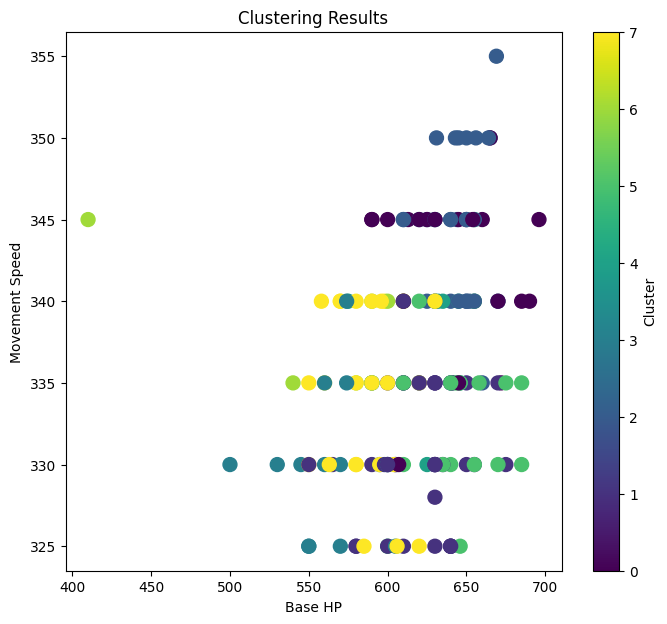

In [98]:
features = lol[['Base HP', 'Movement speed', 'Attack speed', 'Base armor', 'Base magic resistance', 'Base mana', 'HP regeneration', 'HP per lvl', 'Mana regeneration per lvl', 'Mana per lvl']]

# Scaling the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering with 6 clusters
kmeans = KMeans(n_clusters=8, random_state=40)
lol['Cluster'] = kmeans.fit_predict(scaled_features)

# Print cluster assignments
print("Cluster Assignments:")
print(lol)

# Visualize the clusters (2D plot using the first two features as an example)
plt.figure(figsize=(8, 7))
plt.scatter(lol['Base HP'], lol['Movement speed'], c=lol['Cluster'], cmap='viridis', s=100)
plt.title("Clustering Results")
plt.xlabel("Base HP")
plt.ylabel("Movement Speed")
plt.colorbar(label="Cluster")
plt.show()

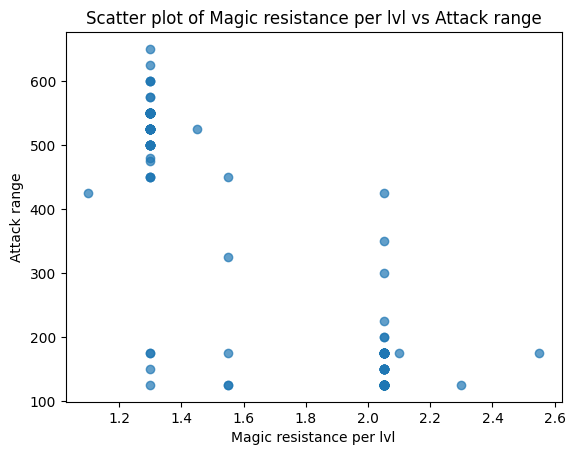

-0.9039950271212731


In [111]:
plt.scatter(lol['Magic resistance per lvl'], lol['Attack range'], alpha=0.7)

# Adding labels and title
plt.xlabel('Magic resistance per lvl')
plt.ylabel('Attack range')
plt.title("Scatter plot of Magic resistance per lvl vs Attack range")

# Show the plot
plt.show()

correlation = lol['Magic resistance per lvl'].corr(lol['Attack range'])
print(correlation)

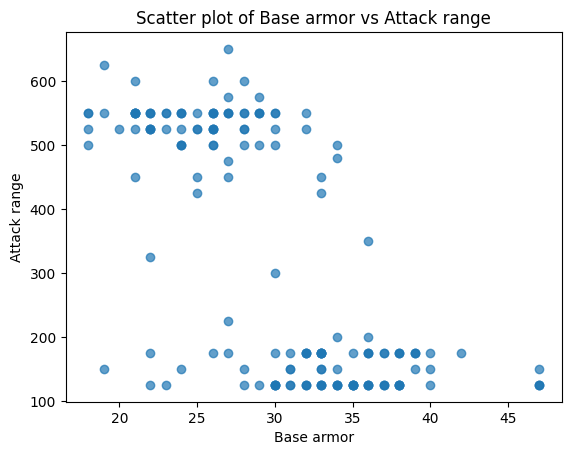

-0.6907009656852163


In [112]:
plt.scatter(lol['Base armor'], lol['Attack range'], alpha=0.7)

# Adding labels and title
plt.xlabel('Base armor')
plt.ylabel('Attack range')
plt.title("Scatter plot of Base armor vs Attack range")

# Show the plot
plt.show()

correlation = lol['Base armor'].corr(lol['Attack range'])
print(correlation)

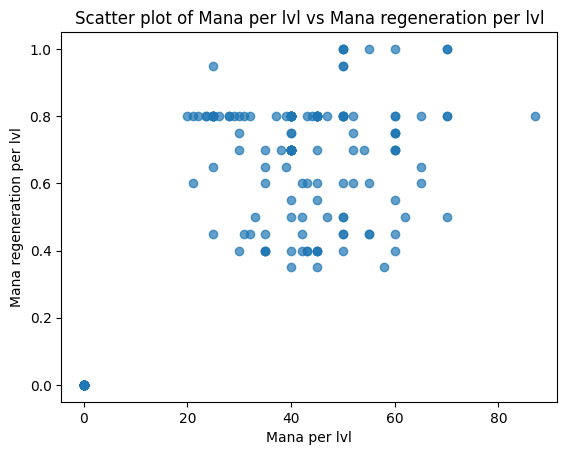

0.7011413489861178


In [113]:
plt.scatter(lol['Mana per lvl'], lol['Mana regeneration per lvl'], alpha=0.7)

# Adding labels and title
plt.xlabel('Mana per lvl')
plt.ylabel('Mana regeneration per lvl')
plt.title("Scatter plot of Mana per lvl vs Mana regeneration per lvl")

# Show the plot
plt.show()
correlation = lol['Mana per lvl'].corr(lol['Mana regeneration per lvl'])
print(correlation)

In [102]:
#add two things that havent doen in class
#forest corr machine learning
#something else
#
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       167 non-null    object 
 1   Tags                       167 non-null    object 
 2   Role                       167 non-null    object 
 3   Range type                 167 non-null    object 
 4   Resourse type              167 non-null    object 
 5   Base HP                    167 non-null    int64  
 6   HP per lvl                 167 non-null    int64  
 7   Base mana                  167 non-null    int64  
 8   Mana per lvl               167 non-null    float64
 9   Movement speed             167 non-null    int64  
 10  Base armor                 167 non-null    int64  
 11  Armor per lvl              167 non-null    float64
 12  Base magic resistance      167 non-null    int64  
 13  Magic resistance per lvl   167 non-null    float64

In [106]:
columns_to_drop = ['Name', 'Tags', 'Class', 'Role', 'Range type', 'Resourse type', 'Primary Role', 'Secondary Role', 'Tertiary Role']
X = lol.drop(columns=columns_to_drop, axis=1)
y = lol["Primary Role"]

# Encode the categorical target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)


# Make predictions
y_pred = rf_classifier.predict(X_test)

# Decode predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
y_test_labels = label_encoder.inverse_transform(y_test)
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

# Feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print("Feature Importances:\n", importance_df)


print(classification_report(y_test_labels, y_pred_labels, zero_division=0))


from collections import Counter
print("Test labels distribution:", Counter(y_test_labels))
print("Predicted labels distribution:", Counter(y_pred_labels))

Accuracy: 0.6764705882352942
Classification Report:
               precision    recall  f1-score   support

      Bottom       1.00      1.00      1.00         7
      Jungle       0.67      0.50      0.57         8
      Middle       0.56      0.83      0.67         6
     Support       0.75      0.50      0.60         6
         Top       0.50      0.57      0.53         7

    accuracy                           0.68        34
   macro avg       0.69      0.68      0.67        34
weighted avg       0.70      0.68      0.67        34

Feature Importances:
                       Feature  Importance
5                  Base armor    0.115272
10            HP regeneration    0.084961
15      Attack damage per lvl    0.073600
14              Attack damage    0.071536
2                   Base mana    0.063824
1                  HP per lvl    0.058963
19                    Cluster    0.057161
12          Mana regeneration    0.054781
9                Attack range    0.050319
4              M

In [107]:
print("Unique classes in target:", y_encoded)

Unique classes in target: [4 2 4 2 3 1 2 2 0 0 2 2 3 1 3 1 3 1 0 4 2 4 2 4 1 4 0 1 1 1 0 1 4 2 2 4 4
 4 1 1 4 1 3 2 4 4 1 3 1 4 4 0 0 4 0 0 2 1 2 2 4 1 4 1 1 4 0 2 1 3 1 2 0 3
 2 4 2 3 1 3 0 4 3 2 3 4 3 2 1 0 1 1 4 2 4 4 4 3 2 4 3 1 1 3 3 4 1 4 4 2 0
 1 0 0 4 1 4 1 4 4 0 1 0 3 3 3 2 2 4 1 2 3 4 3 0 4 4 2 0 4 4 0 0 2 3 2 1 1
 2 2 4 1 1 0 2 1 4 4 4 3 1 2 0 0 3 2 3]


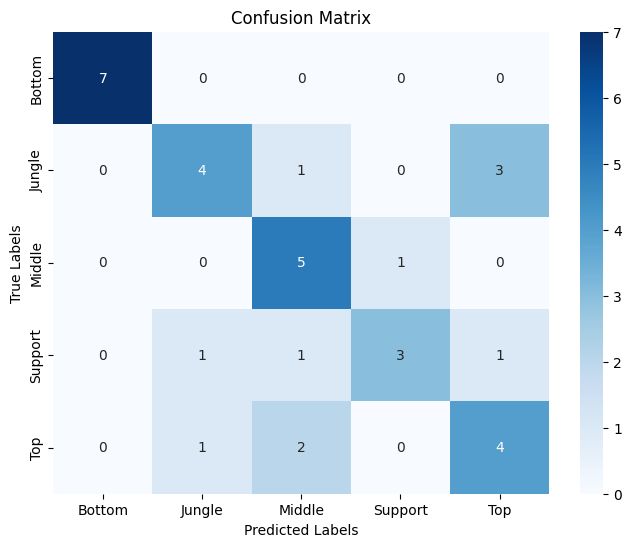

In [108]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

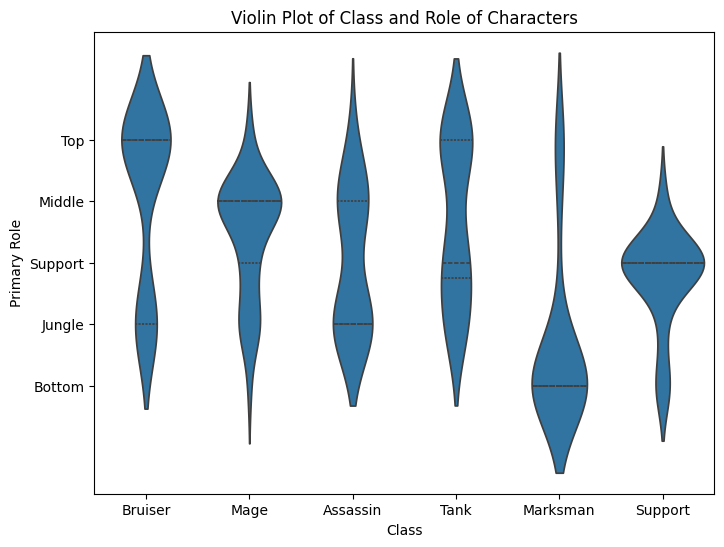

In [32]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Primary Role', data=lol, inner="quartile")
plt.title('Violin Plot of Class and Role of Characters')
plt.xlabel('Class')
plt.ylabel('Primary Role')
plt.show()